<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Посмотрим есть ли в столбцах nan с помощью any()

In [6]:
data.TotalSpent.isna().any()

False

Получилось, что nan нигде нет

Проверим еще на всякий случай уникальные значения в категориальных признаках. Тут тоже без nan

In [7]:
for i in cat_cols:
    print(i, data[i].unique())

Sex ['Male' 'Female']
IsSeniorCitizen [0 1]
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 'Yes']
PaymentMethod ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


Теперь нужно проверить числовые признаки. Из data.info() видно, что только в TotalSpent находится object. Хотя, по идее, там должны быть float

In [8]:
data.TotalSpent.str.replace('.', '', 1).str.isdigit().all()

False

Можно сделать вывод, что в этом столбце НЕ ТОЛЬКО числовые значения. Попробуем понять, что же там еще

|----------------------------------------------------------------------------------------------------------------------------------|

Теперь найдем номера строк, в которых лежат числовые значения (int, float)

In [9]:
index_is_dgt = data.TotalSpent.str.replace('.', '', 1).str.isdigit()
index_is_dgt

0       True
1       True
2       True
3       True
4       True
        ... 
5277    True
5278    True
5279    True
5280    True
5281    True
Name: TotalSpent, Length: 5282, dtype: bool

Найдем номера строк, где данные НЕ являеются числом

In [10]:
data.TotalSpent[index_is_dgt == False] 

1048     
1707     
2543     
3078     
3697     
4002     
4326     
4551     
4598     
Name: TotalSpent, dtype: object

Видим, что в этих строчках у нас пустуе строки

In [11]:
index_is_not_dgt = list(data.TotalSpent[index_is_dgt == False].index)
index_is_not_dgt

[1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598]

Возьмем маску от этих строк

In [12]:
data.iloc[index_is_not_dgt]

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
1048             0            25.75               Male                0   
1707             0            73.35             Female                0   
2543             0            19.70               Male                0   
3078             0            80.85             Female                0   
3697             0            20.00             Female                0   
4002             0            61.90               Male                0   
4326             0            25.35               Male                0   
4551             0            52.55             Female                0   
4598             0            56.05             Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
1048        Yes      Yes             Yes                     Yes   
1707        Yes      Yes             Yes                     Yes   
2543        Yes      Yes             Yes                      No   
3078        Yes      Yes             Yes                      No   
3697        Yes      Yes             Yes                      No   
4002         No      Yes             Yes                     Yes   
4326        Yes      Yes             Yes                     Yes   
4551        Yes      Yes              No        No phone service   
4598        Yes      Yes              No        No phone service   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
1048                 No      No internet service  No internet service   
1707                DSL                       No                  Yes   
2543                 No      No internet service  No internet service   
3078                DSL                      Yes                  Yes   
3697                 No      No internet service  No internet service   
4002                DSL                      Yes                  Yes   
4326                 No      No internet service  No internet service   
4551                DSL                      Yes                   No   
4598                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
1048  No internet service  No internet service  No internet service   
1707                  Yes                  Yes                  Yes   
2543  No internet service  No internet service  No internet service   
3078                  Yes                   No                  Yes   
3697  No internet service  No internet service  No internet service   
4002                   No                  Yes                   No   
4326  No internet service  No internet service  No internet service   
4551                  Yes                  Yes                  Yes   
4598                  Yes                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
1048  No internet service         Two year                 No   
1707                   No         Two year                 No   
2543  No internet service         One year                Yes   
3078                  Yes         Two year                 No   
3697  No internet service         Two year                 No   
4002                   No         Two year                Yes   
4326  No internet service         Two year                 No   
4551                   No         Two year                Yes   
4598                   No         Two year                 No   

                  PaymentMethod  Churn  
1048               Mailed check      0  
1707               Mailed check      0  
2543               Mailed check      0  
3078               Mailed check      0  
3697               Mailed check      0  
4002  Bank transfer (automatic)      0  
4326               Mailed check      0  
4551  Bank transfer (automatic)      0  
4598    Credit card (automatic)      0

Видимо, что колонка TotalSpent пустая для ClientPeriod = 0

In [13]:
data[data['ClientPeriod'] == 0]

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
1048             0            25.75               Male                0   
1707             0            73.35             Female                0   
2543             0            19.70               Male                0   
3078             0            80.85             Female                0   
3697             0            20.00             Female                0   
4002             0            61.90               Male                0   
4326             0            25.35               Male                0   
4551             0            52.55             Female                0   
4598             0            56.05             Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
1048        Yes      Yes             Yes                     Yes   
1707        Yes      Yes             Yes                     Yes   
2543        Yes      Yes             Yes                      No   
3078        Yes      Yes             Yes                      No   
3697        Yes      Yes             Yes                      No   
4002         No      Yes             Yes                     Yes   
4326        Yes      Yes             Yes                     Yes   
4551        Yes      Yes              No        No phone service   
4598        Yes      Yes              No        No phone service   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
1048                 No      No internet service  No internet service   
1707                DSL                       No                  Yes   
2543                 No      No internet service  No internet service   
3078                DSL                      Yes                  Yes   
3697                 No      No internet service  No internet service   
4002                DSL                      Yes                  Yes   
4326                 No      No internet service  No internet service   
4551                DSL                      Yes                   No   
4598                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
1048  No internet service  No internet service  No internet service   
1707                  Yes                  Yes                  Yes   
2543  No internet service  No internet service  No internet service   
3078                  Yes                   No                  Yes   
3697  No internet service  No internet service  No internet service   
4002                   No                  Yes                   No   
4326  No internet service  No internet service  No internet service   
4551                  Yes                  Yes                  Yes   
4598                  Yes                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
1048  No internet service         Two year                 No   
1707                   No         Two year                 No   
2543  No internet service         One year                Yes   
3078                  Yes         Two year                 No   
3697  No internet service         Two year                 No   
4002                   No         Two year                Yes   
4326  No internet service         Two year                 No   
4551                   No         Two year                Yes   
4598                   No         Two year                 No   

                  PaymentMethod  Churn  
1048               Mailed check      0  
1707               Mailed check      0  
2543               Mailed check      0  
3078               Mailed check      0  
3697               Mailed check      0  
4002  Bank transfer (automatic)      0  
4326               Mailed check      0  
4551  Bank transfer (automatic)      0  
4598    Credit card (automatic)      0

Видим, что наша гипотеза оказалось верна. 

Поэтому для таких людей заменим пробелы в TotalSpent на НУЛИ, потому что очевидно, что они потратили ноль деняк за ClientPeriod = 0

In [14]:
data.loc[:, 'TotalSpent'] = data['TotalSpent'].str.replace(' ', '0')

Переконвертируем эту pandas.series из str в float

In [15]:
data.loc[:, 'TotalSpent'] = pd.to_numeric(data["TotalSpent"], downcast="float")

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [16]:
# YOUR CODE
x = np.arange(0, 5282, 1)
data[num_cols]

ClientPeriod  MonthlySpending   TotalSpent
0               55            19.50  1026.349976
1               72            25.85  1872.199951
2                1            75.90    75.900002
3               32            79.30  2570.000000
4               60           115.25  6758.450195
...            ...              ...          ...
5277             3            30.40    82.150002
5278            50            44.45  2188.449951
5279             1            55.05    55.049999
5280            29            76.00  2215.250000
5281            19            75.90  1375.599976

[5282 rows x 3 columns]

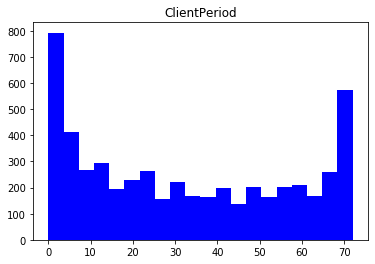

In [17]:
client_period = np.array(data['ClientPeriod'])
plt.hist(client_period, bins = 20, color='b');
plt.title('ClientPeriod');

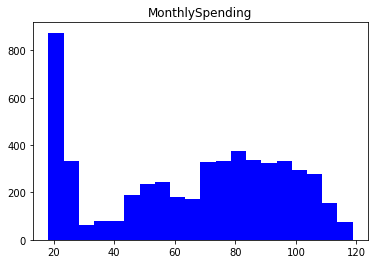

In [18]:
monthly_spending = np.array(data['MonthlySpending'])
plt.hist(monthly_spending, bins = 20, color='b');
plt.title('MonthlySpending');

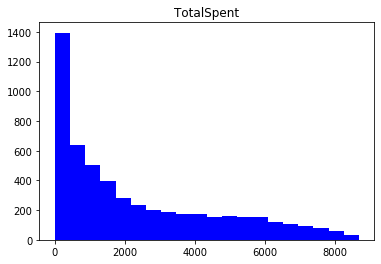

In [19]:
total_spent = np.array(data['TotalSpent'])
plt.hist(total_spent, bins = 20, color='b');
plt.title('TotalSpent');

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [20]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [21]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [22]:
# YOUR CODE
numeric_data = data.loc[:, num_cols]
categorial_data = data.loc[:, cat_cols]

one-hot encoding

In [23]:
dummy_features = pd.get_dummies(categorial_data)
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]

In [24]:
y = data[target_col]

In [25]:
X.shape, X_origin.shape

((5282, 45), (5282, 19))

Делим выборку на обучающую и тестовую

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

Нормируем данные

In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# заново создадим модель, указав солвер
clf = LogisticRegression()

# опишем сетку, по которой будем искать
param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001], # также можно указать обычный массив, [1, 2, 3, 4]
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, cv=5, refit=True, scoring='roc_auc')

# запустим поиск
search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(search.best_params_)
search.score(X_test_scaled, y_test)

{'C': 100}


0.8268255742004599

In [29]:
clf = LogisticRegressionCV(scoring='roc_auc', refit=True, max_iter=500).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8277306267950979

In [30]:
clf = LogisticRegressionCV(scoring='roc_auc', refit=True, max_iter=500).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8267378395101634

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [71]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [72]:
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)
cat_features=list(range(3,19))

In [73]:
boosting_model = CatBoostClassifier(n_estimators=500, cat_features=cat_features, eval_metric='AUC')

grid = {'learning_rate': [0.1, 0.01],
        'depth': [2, 4],
        'l2_leaf_reg': np.linspace(0, 10, 20)}

boosting_model.grid_search(grid, 
                           X_train_origin, 
                           y_train, 
                           plot=True, 
                           refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7088258	best: 0.7088258 (0)	total: 8.08ms	remaining: 4.03s
1:	test: 0.7257052	best: 0.7257052 (1)	total: 12.3ms	remaining: 3.06s
2:	test: 0.7287281	best: 0.7287281 (2)	total: 16ms	remaining: 2.65s
3:	test: 0.7337568	best: 0.7337568 (3)	total: 20.4ms	remaining: 2.53s
4:	test: 0.7411936	best: 0.7411936 (4)	total: 24.5ms	remaining: 2.43s
5:	test: 0.7552587	best: 0.7552587 (5)	total: 29ms	remaining: 2.39s
6:	test: 0.7871017	best: 0.7871017 (6)	total: 33.7ms	remaining: 2.37s
7:	test: 0.7995241	best: 0.7995241 (7)	total: 38.3ms	remaining: 2.35s
8:	test: 0.8028849	best: 0.8028849 (8)	total: 42.2ms	remaining: 2.3s
9:	test: 0.8052716	best: 0.8052716 (9)	total: 45.5ms	remaining: 2.23s
10:	test: 0.8128630	best: 0.8128630 (10)	total: 48.7ms	remaining: 2.17s
11:	test: 0.8191856	best: 0.8191856 (11)	total: 51.7ms	remaining: 2.1s
12:	test: 0.8203862	best: 0.8203862 (12)	total: 54.9ms	remaining: 2.06s
13:	test: 0.8207097	best: 0.8207097 (13)	total: 58.5ms	remaining: 2.03s
14:	test: 0.822359

121:	test: 0.8400046	best: 0.8401088 (116)	total: 403ms	remaining: 1.25s
122:	test: 0.8400046	best: 0.8401088 (116)	total: 406ms	remaining: 1.24s
123:	test: 0.8400046	best: 0.8401088 (116)	total: 409ms	remaining: 1.24s
124:	test: 0.8401196	best: 0.8401196 (124)	total: 412ms	remaining: 1.24s
125:	test: 0.8401556	best: 0.8401556 (125)	total: 415ms	remaining: 1.23s
126:	test: 0.8402131	best: 0.8402131 (126)	total: 419ms	remaining: 1.23s
127:	test: 0.8401699	best: 0.8402131 (126)	total: 422ms	remaining: 1.23s
128:	test: 0.8401987	best: 0.8402131 (126)	total: 425ms	remaining: 1.22s
129:	test: 0.8401196	best: 0.8402131 (126)	total: 429ms	remaining: 1.22s
130:	test: 0.8401196	best: 0.8402131 (126)	total: 431ms	remaining: 1.21s
131:	test: 0.8401628	best: 0.8402131 (126)	total: 434ms	remaining: 1.21s
132:	test: 0.8402778	best: 0.8402778 (132)	total: 437ms	remaining: 1.21s
133:	test: 0.8403137	best: 0.8403137 (133)	total: 441ms	remaining: 1.2s
134:	test: 0.8402203	best: 0.8403137 (133)	total: 44

254:	test: 0.8422439	best: 0.8435739 (228)	total: 798ms	remaining: 766ms
255:	test: 0.8421541	best: 0.8435739 (228)	total: 800ms	remaining: 763ms
256:	test: 0.8422331	best: 0.8435739 (228)	total: 804ms	remaining: 760ms
257:	test: 0.8422331	best: 0.8435739 (228)	total: 807ms	remaining: 757ms
258:	test: 0.8427076	best: 0.8435739 (228)	total: 810ms	remaining: 754ms
259:	test: 0.8425782	best: 0.8435739 (228)	total: 814ms	remaining: 751ms
260:	test: 0.8425998	best: 0.8435739 (228)	total: 817ms	remaining: 748ms
261:	test: 0.8425998	best: 0.8435739 (228)	total: 820ms	remaining: 745ms
262:	test: 0.8425998	best: 0.8435739 (228)	total: 822ms	remaining: 741ms
263:	test: 0.8425926	best: 0.8435739 (228)	total: 825ms	remaining: 737ms
264:	test: 0.8425926	best: 0.8435739 (228)	total: 827ms	remaining: 733ms
265:	test: 0.8425926	best: 0.8435739 (228)	total: 829ms	remaining: 729ms
266:	test: 0.8425926	best: 0.8435739 (228)	total: 831ms	remaining: 725ms
267:	test: 0.8427436	best: 0.8435739 (228)	total: 8

427:	test: 0.8399399	best: 0.8435739 (228)	total: 1.19s	remaining: 200ms
428:	test: 0.8399399	best: 0.8435739 (228)	total: 1.19s	remaining: 198ms
429:	test: 0.8398968	best: 0.8435739 (228)	total: 1.2s	remaining: 195ms
430:	test: 0.8399830	best: 0.8435739 (228)	total: 1.2s	remaining: 192ms
431:	test: 0.8400046	best: 0.8435739 (228)	total: 1.2s	remaining: 190ms
432:	test: 0.8400046	best: 0.8435739 (228)	total: 1.21s	remaining: 187ms
433:	test: 0.8399040	best: 0.8435739 (228)	total: 1.21s	remaining: 184ms
434:	test: 0.8399040	best: 0.8435739 (228)	total: 1.21s	remaining: 181ms
435:	test: 0.8399040	best: 0.8435739 (228)	total: 1.21s	remaining: 178ms
436:	test: 0.8399687	best: 0.8435739 (228)	total: 1.22s	remaining: 175ms
437:	test: 0.8398968	best: 0.8435739 (228)	total: 1.22s	remaining: 173ms
438:	test: 0.8398896	best: 0.8435739 (228)	total: 1.22s	remaining: 170ms
439:	test: 0.8399183	best: 0.8435739 (228)	total: 1.22s	remaining: 167ms
440:	test: 0.8399327	best: 0.8435739 (228)	total: 1.23

61:	test: 0.8117272	best: 0.8119932 (56)	total: 215ms	remaining: 1.52s
62:	test: 0.8117272	best: 0.8119932 (56)	total: 219ms	remaining: 1.52s
63:	test: 0.8116984	best: 0.8119932 (56)	total: 224ms	remaining: 1.52s
64:	test: 0.8116984	best: 0.8119932 (56)	total: 228ms	remaining: 1.52s
65:	test: 0.8117847	best: 0.8119932 (56)	total: 230ms	remaining: 1.51s
66:	test: 0.8117272	best: 0.8119932 (56)	total: 233ms	remaining: 1.5s
67:	test: 0.8116697	best: 0.8119932 (56)	total: 236ms	remaining: 1.5s
68:	test: 0.8128523	best: 0.8128523 (68)	total: 238ms	remaining: 1.49s
69:	test: 0.8133986	best: 0.8133986 (69)	total: 241ms	remaining: 1.48s
70:	test: 0.8145488	best: 0.8145488 (70)	total: 243ms	remaining: 1.47s
71:	test: 0.8152893	best: 0.8152893 (71)	total: 245ms	remaining: 1.46s
72:	test: 0.8151671	best: 0.8152893 (71)	total: 248ms	remaining: 1.45s
73:	test: 0.8157062	best: 0.8157062 (73)	total: 250ms	remaining: 1.44s
74:	test: 0.8163029	best: 0.8163029 (74)	total: 252ms	remaining: 1.43s
75:	test

230:	test: 0.8292465	best: 0.8292465 (230)	total: 604ms	remaining: 703ms
231:	test: 0.8291530	best: 0.8292465 (230)	total: 607ms	remaining: 702ms
232:	test: 0.8292105	best: 0.8292465 (230)	total: 611ms	remaining: 700ms
233:	test: 0.8293831	best: 0.8293831 (233)	total: 614ms	remaining: 698ms
234:	test: 0.8292896	best: 0.8293831 (233)	total: 618ms	remaining: 697ms
235:	test: 0.8291638	best: 0.8293831 (233)	total: 623ms	remaining: 697ms
236:	test: 0.8293004	best: 0.8293831 (233)	total: 628ms	remaining: 697ms
237:	test: 0.8292285	best: 0.8293831 (233)	total: 632ms	remaining: 696ms
238:	test: 0.8293795	best: 0.8293831 (233)	total: 637ms	remaining: 696ms
239:	test: 0.8294513	best: 0.8294513 (239)	total: 641ms	remaining: 694ms
240:	test: 0.8294873	best: 0.8294873 (240)	total: 646ms	remaining: 694ms
241:	test: 0.8293938	best: 0.8294873 (240)	total: 650ms	remaining: 693ms
242:	test: 0.8294801	best: 0.8294873 (240)	total: 655ms	remaining: 693ms
243:	test: 0.8295160	best: 0.8295160 (243)	total: 6

346:	test: 0.8322802	best: 0.8322802 (346)	total: 997ms	remaining: 440ms
347:	test: 0.8324311	best: 0.8324311 (347)	total: 1s	remaining: 437ms
348:	test: 0.8323808	best: 0.8324311 (347)	total: 1s	remaining: 435ms
349:	test: 0.8324743	best: 0.8324743 (349)	total: 1.01s	remaining: 432ms
350:	test: 0.8324671	best: 0.8324743 (349)	total: 1.01s	remaining: 429ms
351:	test: 0.8324886	best: 0.8324886 (351)	total: 1.01s	remaining: 426ms
352:	test: 0.8325605	best: 0.8325605 (352)	total: 1.02s	remaining: 424ms
353:	test: 0.8325174	best: 0.8325605 (352)	total: 1.02s	remaining: 421ms
354:	test: 0.8324958	best: 0.8325605 (352)	total: 1.02s	remaining: 418ms
355:	test: 0.8325749	best: 0.8325749 (355)	total: 1.02s	remaining: 415ms
356:	test: 0.8325605	best: 0.8325749 (355)	total: 1.03s	remaining: 412ms
357:	test: 0.8326180	best: 0.8326180 (357)	total: 1.03s	remaining: 409ms
358:	test: 0.8326540	best: 0.8326540 (358)	total: 1.03s	remaining: 406ms
359:	test: 0.8326468	best: 0.8326540 (358)	total: 1.03s	r

489:	test: 0.8353390	best: 0.8353390 (485)	total: 1.39s	remaining: 28.3ms
490:	test: 0.8353462	best: 0.8353462 (490)	total: 1.39s	remaining: 25.5ms
491:	test: 0.8353462	best: 0.8353462 (490)	total: 1.39s	remaining: 22.7ms
492:	test: 0.8353893	best: 0.8353893 (492)	total: 1.4s	remaining: 19.8ms
493:	test: 0.8354037	best: 0.8354037 (493)	total: 1.4s	remaining: 17ms
494:	test: 0.8353822	best: 0.8354037 (493)	total: 1.4s	remaining: 14.2ms
495:	test: 0.8353462	best: 0.8354037 (493)	total: 1.41s	remaining: 11.3ms
496:	test: 0.8353031	best: 0.8354037 (493)	total: 1.41s	remaining: 8.5ms
497:	test: 0.8353031	best: 0.8354037 (493)	total: 1.41s	remaining: 5.67ms
498:	test: 0.8352959	best: 0.8354037 (493)	total: 1.41s	remaining: 2.83ms
499:	test: 0.8352887	best: 0.8354037 (493)	total: 1.42s	remaining: 0us

bestTest = 0.8354037267
bestIteration = 493

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8354

136:	test: 0.8397386	best: 0.8397386 (136)	total: 359ms	remaining: 951ms
137:	test: 0.8397889	best: 0.8397889 (137)	total: 363ms	remaining: 951ms
138:	test: 0.8397674	best: 0.8397889 (137)	total: 366ms	remaining: 951ms
139:	test: 0.8397817	best: 0.8397889 (137)	total: 370ms	remaining: 951ms
140:	test: 0.8397458	best: 0.8397889 (137)	total: 373ms	remaining: 950ms
141:	test: 0.8397458	best: 0.8397889 (137)	total: 376ms	remaining: 947ms
142:	test: 0.8397602	best: 0.8397889 (137)	total: 379ms	remaining: 946ms
143:	test: 0.8397746	best: 0.8397889 (137)	total: 382ms	remaining: 945ms
144:	test: 0.8398105	best: 0.8398105 (144)	total: 386ms	remaining: 944ms
145:	test: 0.8398105	best: 0.8398105 (144)	total: 389ms	remaining: 943ms
146:	test: 0.8398680	best: 0.8398680 (146)	total: 392ms	remaining: 942ms
147:	test: 0.8399255	best: 0.8399255 (147)	total: 395ms	remaining: 939ms
148:	test: 0.8398608	best: 0.8399255 (147)	total: 398ms	remaining: 937ms
149:	test: 0.8398608	best: 0.8399255 (147)	total: 4

271:	test: 0.8407774	best: 0.8416760 (209)	total: 751ms	remaining: 629ms
272:	test: 0.8407774	best: 0.8416760 (209)	total: 754ms	remaining: 627ms
273:	test: 0.8408349	best: 0.8416760 (209)	total: 757ms	remaining: 624ms
274:	test: 0.8408349	best: 0.8416760 (209)	total: 759ms	remaining: 621ms
275:	test: 0.8408493	best: 0.8416760 (209)	total: 763ms	remaining: 619ms
276:	test: 0.8407558	best: 0.8416760 (209)	total: 766ms	remaining: 617ms
277:	test: 0.8406839	best: 0.8416760 (209)	total: 769ms	remaining: 614ms
278:	test: 0.8406839	best: 0.8416760 (209)	total: 772ms	remaining: 611ms
279:	test: 0.8408133	best: 0.8416760 (209)	total: 775ms	remaining: 609ms
280:	test: 0.8408133	best: 0.8416760 (209)	total: 777ms	remaining: 606ms
281:	test: 0.8408780	best: 0.8416760 (209)	total: 780ms	remaining: 603ms
282:	test: 0.8408709	best: 0.8416760 (209)	total: 783ms	remaining: 600ms
283:	test: 0.8410793	best: 0.8416760 (209)	total: 785ms	remaining: 597ms
284:	test: 0.8409859	best: 0.8416760 (209)	total: 7

395:	test: 0.8400226	best: 0.8416760 (209)	total: 1.14s	remaining: 301ms
396:	test: 0.8400945	best: 0.8416760 (209)	total: 1.15s	remaining: 298ms
397:	test: 0.8401088	best: 0.8416760 (209)	total: 1.15s	remaining: 295ms
398:	test: 0.8400154	best: 0.8416760 (209)	total: 1.16s	remaining: 293ms
399:	test: 0.8400226	best: 0.8416760 (209)	total: 1.16s	remaining: 290ms
400:	test: 0.8400154	best: 0.8416760 (209)	total: 1.16s	remaining: 287ms
401:	test: 0.8400154	best: 0.8416760 (209)	total: 1.17s	remaining: 284ms
402:	test: 0.8400441	best: 0.8416760 (209)	total: 1.17s	remaining: 281ms
403:	test: 0.8400873	best: 0.8416760 (209)	total: 1.17s	remaining: 279ms
404:	test: 0.8400729	best: 0.8416760 (209)	total: 1.17s	remaining: 276ms
405:	test: 0.8400585	best: 0.8416760 (209)	total: 1.18s	remaining: 273ms
406:	test: 0.8400585	best: 0.8416760 (209)	total: 1.18s	remaining: 270ms
407:	test: 0.8400657	best: 0.8416760 (209)	total: 1.18s	remaining: 267ms
408:	test: 0.8400657	best: 0.8416760 (209)	total: 1

32:	test: 0.7613081	best: 0.7616244 (31)	total: 94.3ms	remaining: 1.33s
33:	test: 0.7623469	best: 0.7623469 (33)	total: 97.6ms	remaining: 1.34s
34:	test: 0.7621851	best: 0.7623469 (33)	total: 101ms	remaining: 1.34s
35:	test: 0.7624583	best: 0.7624583 (35)	total: 104ms	remaining: 1.34s
36:	test: 0.7621492	best: 0.7624583 (35)	total: 108ms	remaining: 1.35s
37:	test: 0.7633641	best: 0.7633641 (37)	total: 111ms	remaining: 1.35s
38:	test: 0.7634108	best: 0.7634108 (38)	total: 114ms	remaining: 1.35s
39:	test: 0.7625050	best: 0.7634108 (38)	total: 117ms	remaining: 1.34s
40:	test: 0.7627423	best: 0.7634108 (38)	total: 119ms	remaining: 1.33s
41:	test: 0.7684934	best: 0.7684934 (41)	total: 121ms	remaining: 1.32s
42:	test: 0.7728678	best: 0.7728678 (42)	total: 124ms	remaining: 1.31s
43:	test: 0.7755708	best: 0.7755708 (43)	total: 127ms	remaining: 1.31s
44:	test: 0.7769367	best: 0.7769367 (44)	total: 129ms	remaining: 1.3s
45:	test: 0.7773033	best: 0.7773033 (45)	total: 131ms	remaining: 1.29s
46:	t

195:	test: 0.8261229	best: 0.8261229 (195)	total: 484ms	remaining: 750ms
196:	test: 0.8262523	best: 0.8262523 (196)	total: 487ms	remaining: 749ms
197:	test: 0.8262595	best: 0.8262595 (197)	total: 490ms	remaining: 747ms
198:	test: 0.8263026	best: 0.8263026 (198)	total: 494ms	remaining: 747ms
199:	test: 0.8263889	best: 0.8263889 (199)	total: 497ms	remaining: 745ms
200:	test: 0.8262882	best: 0.8263889 (199)	total: 500ms	remaining: 744ms
201:	test: 0.8262882	best: 0.8263889 (199)	total: 504ms	remaining: 744ms
202:	test: 0.8264033	best: 0.8264033 (202)	total: 507ms	remaining: 742ms
203:	test: 0.8264464	best: 0.8264464 (203)	total: 510ms	remaining: 740ms
204:	test: 0.8264320	best: 0.8264464 (203)	total: 513ms	remaining: 738ms
205:	test: 0.8265614	best: 0.8265614 (205)	total: 515ms	remaining: 736ms
206:	test: 0.8266980	best: 0.8266980 (206)	total: 518ms	remaining: 733ms
207:	test: 0.8267411	best: 0.8267411 (207)	total: 520ms	remaining: 730ms
208:	test: 0.8269496	best: 0.8269496 (208)	total: 5

357:	test: 0.8331428	best: 0.8332147 (355)	total: 876ms	remaining: 348ms
358:	test: 0.8331213	best: 0.8332147 (355)	total: 879ms	remaining: 345ms
359:	test: 0.8331644	best: 0.8332147 (355)	total: 882ms	remaining: 343ms
360:	test: 0.8331932	best: 0.8332147 (355)	total: 885ms	remaining: 341ms
361:	test: 0.8331932	best: 0.8332147 (355)	total: 887ms	remaining: 338ms
362:	test: 0.8332219	best: 0.8332219 (362)	total: 890ms	remaining: 336ms
363:	test: 0.8332363	best: 0.8332363 (363)	total: 894ms	remaining: 334ms
364:	test: 0.8333226	best: 0.8333226 (364)	total: 897ms	remaining: 332ms
365:	test: 0.8333010	best: 0.8333226 (364)	total: 899ms	remaining: 329ms
366:	test: 0.8332938	best: 0.8333226 (364)	total: 901ms	remaining: 327ms
367:	test: 0.8332794	best: 0.8333226 (364)	total: 904ms	remaining: 324ms
368:	test: 0.8332866	best: 0.8333226 (364)	total: 906ms	remaining: 322ms
369:	test: 0.8333585	best: 0.8333585 (369)	total: 908ms	remaining: 319ms
370:	test: 0.8333657	best: 0.8333657 (370)	total: 9

11:	test: 0.8144985	best: 0.8144985 (11)	total: 36.8ms	remaining: 1.5s
12:	test: 0.8145021	best: 0.8145021 (12)	total: 40.4ms	remaining: 1.51s
13:	test: 0.8145668	best: 0.8145668 (13)	total: 43.7ms	remaining: 1.52s
14:	test: 0.8154043	best: 0.8154043 (14)	total: 47.3ms	remaining: 1.53s
15:	test: 0.8166659	best: 0.8166659 (15)	total: 51.3ms	remaining: 1.55s
16:	test: 0.8179348	best: 0.8179348 (16)	total: 55.1ms	remaining: 1.57s
17:	test: 0.8188837	best: 0.8188837 (17)	total: 58.1ms	remaining: 1.55s
18:	test: 0.8202352	best: 0.8202352 (18)	total: 60.8ms	remaining: 1.54s
19:	test: 0.8204725	best: 0.8204725 (19)	total: 63.2ms	remaining: 1.51s
20:	test: 0.8233947	best: 0.8233947 (20)	total: 65.6ms	remaining: 1.5s
21:	test: 0.8254112	best: 0.8254112 (21)	total: 68ms	remaining: 1.48s
22:	test: 0.8266836	best: 0.8266836 (22)	total: 70.5ms	remaining: 1.46s
23:	test: 0.8277620	best: 0.8277620 (23)	total: 72.7ms	remaining: 1.44s
24:	test: 0.8278410	best: 0.8278410 (24)	total: 74.8ms	remaining: 1.

168:	test: 0.8398357	best: 0.8398357 (168)	total: 430ms	remaining: 843ms
169:	test: 0.8404180	best: 0.8404180 (169)	total: 434ms	remaining: 842ms
170:	test: 0.8404755	best: 0.8404755 (170)	total: 437ms	remaining: 841ms
171:	test: 0.8404395	best: 0.8404755 (170)	total: 440ms	remaining: 839ms
172:	test: 0.8404395	best: 0.8404755 (170)	total: 444ms	remaining: 839ms
173:	test: 0.8404395	best: 0.8404755 (170)	total: 448ms	remaining: 840ms
174:	test: 0.8404395	best: 0.8404755 (170)	total: 452ms	remaining: 840ms
175:	test: 0.8404395	best: 0.8404755 (170)	total: 456ms	remaining: 839ms
176:	test: 0.8404323	best: 0.8404755 (170)	total: 459ms	remaining: 837ms
177:	test: 0.8404755	best: 0.8404755 (170)	total: 463ms	remaining: 837ms
178:	test: 0.8403676	best: 0.8404755 (170)	total: 466ms	remaining: 836ms
179:	test: 0.8404180	best: 0.8404755 (170)	total: 469ms	remaining: 835ms
180:	test: 0.8404898	best: 0.8404898 (180)	total: 473ms	remaining: 833ms
181:	test: 0.8406911	best: 0.8406911 (181)	total: 4

309:	test: 0.8420750	best: 0.8434193 (296)	total: 822ms	remaining: 504ms
310:	test: 0.8421684	best: 0.8434193 (296)	total: 825ms	remaining: 501ms
311:	test: 0.8421972	best: 0.8434193 (296)	total: 828ms	remaining: 499ms
312:	test: 0.8421972	best: 0.8434193 (296)	total: 832ms	remaining: 497ms
313:	test: 0.8421972	best: 0.8434193 (296)	total: 835ms	remaining: 495ms
314:	test: 0.8421972	best: 0.8434193 (296)	total: 839ms	remaining: 493ms
315:	test: 0.8421900	best: 0.8434193 (296)	total: 843ms	remaining: 491ms
316:	test: 0.8421900	best: 0.8434193 (296)	total: 846ms	remaining: 488ms
317:	test: 0.8423482	best: 0.8434193 (296)	total: 848ms	remaining: 485ms
318:	test: 0.8423697	best: 0.8434193 (296)	total: 851ms	remaining: 483ms
319:	test: 0.8423194	best: 0.8434193 (296)	total: 853ms	remaining: 480ms
320:	test: 0.8424560	best: 0.8434193 (296)	total: 855ms	remaining: 477ms
321:	test: 0.8424704	best: 0.8434193 (296)	total: 858ms	remaining: 474ms
322:	test: 0.8424704	best: 0.8434193 (296)	total: 8

468:	test: 0.8414999	best: 0.8434193 (296)	total: 1.21s	remaining: 80.2ms
469:	test: 0.8414927	best: 0.8434193 (296)	total: 1.22s	remaining: 77.7ms
470:	test: 0.8414568	best: 0.8434193 (296)	total: 1.22s	remaining: 75.2ms
471:	test: 0.8414568	best: 0.8434193 (296)	total: 1.22s	remaining: 72.6ms
472:	test: 0.8414639	best: 0.8434193 (296)	total: 1.23s	remaining: 70ms
473:	test: 0.8414711	best: 0.8434193 (296)	total: 1.23s	remaining: 67.5ms
474:	test: 0.8414711	best: 0.8434193 (296)	total: 1.23s	remaining: 65ms
475:	test: 0.8414711	best: 0.8434193 (296)	total: 1.24s	remaining: 62.4ms
476:	test: 0.8414352	best: 0.8434193 (296)	total: 1.24s	remaining: 59.9ms
477:	test: 0.8414783	best: 0.8434193 (296)	total: 1.24s	remaining: 57.3ms
478:	test: 0.8414064	best: 0.8434193 (296)	total: 1.25s	remaining: 54.7ms
479:	test: 0.8414208	best: 0.8434193 (296)	total: 1.25s	remaining: 52.1ms
480:	test: 0.8414424	best: 0.8434193 (296)	total: 1.25s	remaining: 49.6ms
481:	test: 0.8414280	best: 0.8434193 (296)

129:	test: 0.8239555	best: 0.8239555 (128)	total: 295ms	remaining: 840ms
130:	test: 0.8242790	best: 0.8242790 (130)	total: 298ms	remaining: 840ms
131:	test: 0.8244371	best: 0.8244371 (131)	total: 302ms	remaining: 841ms
132:	test: 0.8244802	best: 0.8244802 (132)	total: 304ms	remaining: 840ms
133:	test: 0.8244731	best: 0.8244802 (132)	total: 307ms	remaining: 840ms
134:	test: 0.8245090	best: 0.8245090 (134)	total: 310ms	remaining: 839ms
135:	test: 0.8248541	best: 0.8248541 (135)	total: 313ms	remaining: 838ms
136:	test: 0.8248397	best: 0.8248541 (135)	total: 316ms	remaining: 836ms
137:	test: 0.8250841	best: 0.8250841 (137)	total: 318ms	remaining: 833ms
138:	test: 0.8250985	best: 0.8250985 (138)	total: 320ms	remaining: 830ms
139:	test: 0.8249835	best: 0.8250985 (138)	total: 322ms	remaining: 827ms
140:	test: 0.8247750	best: 0.8250985 (138)	total: 324ms	remaining: 824ms
141:	test: 0.8250985	best: 0.8250985 (138)	total: 326ms	remaining: 822ms
142:	test: 0.8252710	best: 0.8252710 (142)	total: 3

280:	test: 0.8315793	best: 0.8316799 (278)	total: 685ms	remaining: 534ms
281:	test: 0.8317158	best: 0.8317158 (281)	total: 688ms	remaining: 532ms
282:	test: 0.8316080	best: 0.8317158 (281)	total: 691ms	remaining: 530ms
283:	test: 0.8316224	best: 0.8317158 (281)	total: 695ms	remaining: 528ms
284:	test: 0.8316511	best: 0.8317158 (281)	total: 698ms	remaining: 527ms
285:	test: 0.8316583	best: 0.8317158 (281)	total: 701ms	remaining: 524ms
286:	test: 0.8316511	best: 0.8317158 (281)	total: 704ms	remaining: 522ms
287:	test: 0.8317302	best: 0.8317302 (287)	total: 706ms	remaining: 520ms
288:	test: 0.8317374	best: 0.8317374 (288)	total: 708ms	remaining: 517ms
289:	test: 0.8317338	best: 0.8317374 (288)	total: 711ms	remaining: 515ms
290:	test: 0.8317626	best: 0.8317626 (290)	total: 713ms	remaining: 512ms
291:	test: 0.8317554	best: 0.8317626 (290)	total: 716ms	remaining: 510ms
292:	test: 0.8318201	best: 0.8318201 (292)	total: 718ms	remaining: 507ms
293:	test: 0.8318632	best: 0.8318632 (293)	total: 7

448:	test: 0.8348574	best: 0.8348574 (448)	total: 1.07s	remaining: 122ms
449:	test: 0.8349580	best: 0.8349580 (449)	total: 1.08s	remaining: 120ms
450:	test: 0.8349365	best: 0.8349580 (449)	total: 1.08s	remaining: 117ms
451:	test: 0.8349508	best: 0.8349580 (449)	total: 1.08s	remaining: 115ms
452:	test: 0.8349508	best: 0.8349580 (449)	total: 1.09s	remaining: 113ms
453:	test: 0.8349436	best: 0.8349580 (449)	total: 1.09s	remaining: 111ms
454:	test: 0.8349652	best: 0.8349652 (454)	total: 1.09s	remaining: 108ms
455:	test: 0.8350083	best: 0.8350083 (455)	total: 1.1s	remaining: 106ms
456:	test: 0.8350012	best: 0.8350083 (455)	total: 1.1s	remaining: 103ms
457:	test: 0.8349796	best: 0.8350083 (455)	total: 1.1s	remaining: 101ms
458:	test: 0.8350155	best: 0.8350155 (458)	total: 1.1s	remaining: 98.6ms
459:	test: 0.8350227	best: 0.8350227 (459)	total: 1.11s	remaining: 96.2ms
460:	test: 0.8350155	best: 0.8350227 (459)	total: 1.11s	remaining: 93.8ms
461:	test: 0.8350155	best: 0.8350227 (459)	total: 1.

104:	test: 0.8383548	best: 0.8383548 (103)	total: 266ms	remaining: 1s
105:	test: 0.8383404	best: 0.8383548 (103)	total: 269ms	remaining: 1000ms
106:	test: 0.8384410	best: 0.8384410 (106)	total: 272ms	remaining: 1000ms
107:	test: 0.8384985	best: 0.8384985 (107)	total: 275ms	remaining: 1000ms
108:	test: 0.8386136	best: 0.8386136 (108)	total: 279ms	remaining: 1s
109:	test: 0.8385201	best: 0.8386136 (108)	total: 282ms	remaining: 1s
110:	test: 0.8389227	best: 0.8389227 (110)	total: 286ms	remaining: 1s
111:	test: 0.8388292	best: 0.8389227 (110)	total: 288ms	remaining: 999ms
112:	test: 0.8390521	best: 0.8390521 (112)	total: 290ms	remaining: 995ms
113:	test: 0.8390377	best: 0.8390521 (112)	total: 293ms	remaining: 992ms
114:	test: 0.8389083	best: 0.8390521 (112)	total: 295ms	remaining: 988ms
115:	test: 0.8389083	best: 0.8390521 (112)	total: 297ms	remaining: 984ms
116:	test: 0.8389083	best: 0.8390521 (112)	total: 300ms	remaining: 981ms
117:	test: 0.8389083	best: 0.8390521 (112)	total: 302ms	rema

257:	test: 0.8419636	best: 0.8423482 (216)	total: 658ms	remaining: 617ms
258:	test: 0.8421505	best: 0.8423482 (216)	total: 661ms	remaining: 615ms
259:	test: 0.8420786	best: 0.8423482 (216)	total: 665ms	remaining: 614ms
260:	test: 0.8420786	best: 0.8423482 (216)	total: 668ms	remaining: 612ms
261:	test: 0.8420786	best: 0.8423482 (216)	total: 671ms	remaining: 609ms
262:	test: 0.8420642	best: 0.8423482 (216)	total: 674ms	remaining: 608ms
263:	test: 0.8420067	best: 0.8423482 (216)	total: 678ms	remaining: 606ms
264:	test: 0.8416688	best: 0.8423482 (216)	total: 681ms	remaining: 604ms
265:	test: 0.8418557	best: 0.8423482 (216)	total: 683ms	remaining: 601ms
266:	test: 0.8418557	best: 0.8423482 (216)	total: 686ms	remaining: 598ms
267:	test: 0.8418917	best: 0.8423482 (216)	total: 688ms	remaining: 596ms
268:	test: 0.8419204	best: 0.8423482 (216)	total: 691ms	remaining: 594ms
269:	test: 0.8420858	best: 0.8423482 (216)	total: 694ms	remaining: 591ms
270:	test: 0.8420211	best: 0.8423482 (216)	total: 6

389:	test: 0.8433474	best: 0.8433474 (389)	total: 1.05s	remaining: 297ms
390:	test: 0.8433474	best: 0.8433474 (389)	total: 1.05s	remaining: 294ms
391:	test: 0.8432612	best: 0.8433474 (389)	total: 1.06s	remaining: 292ms
392:	test: 0.8432612	best: 0.8433474 (389)	total: 1.06s	remaining: 289ms
393:	test: 0.8433474	best: 0.8433474 (389)	total: 1.06s	remaining: 286ms
394:	test: 0.8433906	best: 0.8433906 (394)	total: 1.07s	remaining: 284ms
395:	test: 0.8433762	best: 0.8433906 (394)	total: 1.07s	remaining: 281ms
396:	test: 0.8433474	best: 0.8433906 (394)	total: 1.07s	remaining: 279ms
397:	test: 0.8433474	best: 0.8433906 (394)	total: 1.08s	remaining: 276ms
398:	test: 0.8433474	best: 0.8433906 (394)	total: 1.08s	remaining: 274ms
399:	test: 0.8433474	best: 0.8433906 (394)	total: 1.08s	remaining: 271ms
400:	test: 0.8433402	best: 0.8433906 (394)	total: 1.09s	remaining: 268ms
401:	test: 0.8433043	best: 0.8433906 (394)	total: 1.09s	remaining: 266ms
402:	test: 0.8432899	best: 0.8433906 (394)	total: 1

20:	test: 0.7614087	best: 0.7614087 (20)	total: 69.8ms	remaining: 1.59s
21:	test: 0.7607869	best: 0.7614087 (20)	total: 73.9ms	remaining: 1.6s
22:	test: 0.7599961	best: 0.7614087 (20)	total: 77.8ms	remaining: 1.61s
23:	test: 0.7600033	best: 0.7614087 (20)	total: 82.2ms	remaining: 1.63s
24:	test: 0.7595828	best: 0.7614087 (20)	total: 86.7ms	remaining: 1.65s
25:	test: 0.7618149	best: 0.7618149 (25)	total: 90.7ms	remaining: 1.65s
26:	test: 0.7639716	best: 0.7639716 (26)	total: 94.3ms	remaining: 1.65s
27:	test: 0.7636085	best: 0.7639716 (26)	total: 97.6ms	remaining: 1.64s
28:	test: 0.7629831	best: 0.7639716 (26)	total: 100ms	remaining: 1.63s
29:	test: 0.7645467	best: 0.7645467 (29)	total: 103ms	remaining: 1.61s
30:	test: 0.7641764	best: 0.7645467 (29)	total: 105ms	remaining: 1.59s
31:	test: 0.7639787	best: 0.7645467 (29)	total: 108ms	remaining: 1.57s
32:	test: 0.7645682	best: 0.7645682 (32)	total: 110ms	remaining: 1.56s
33:	test: 0.7641836	best: 0.7645682 (32)	total: 112ms	remaining: 1.54s

195:	test: 0.8294945	best: 0.8295017 (194)	total: 460ms	remaining: 713ms
196:	test: 0.8295232	best: 0.8295232 (196)	total: 463ms	remaining: 712ms
197:	test: 0.8296598	best: 0.8296598 (197)	total: 466ms	remaining: 711ms
198:	test: 0.8296239	best: 0.8296598 (197)	total: 469ms	remaining: 710ms
199:	test: 0.8296095	best: 0.8296598 (197)	total: 472ms	remaining: 709ms
200:	test: 0.8296095	best: 0.8296598 (197)	total: 475ms	remaining: 707ms
201:	test: 0.8296454	best: 0.8296598 (197)	total: 478ms	remaining: 705ms
202:	test: 0.8295592	best: 0.8296598 (197)	total: 481ms	remaining: 703ms
203:	test: 0.8296095	best: 0.8296598 (197)	total: 483ms	remaining: 700ms
204:	test: 0.8295520	best: 0.8296598 (197)	total: 485ms	remaining: 697ms
205:	test: 0.8296383	best: 0.8296598 (197)	total: 487ms	remaining: 695ms
206:	test: 0.8295520	best: 0.8296598 (197)	total: 489ms	remaining: 692ms
207:	test: 0.8297030	best: 0.8297030 (207)	total: 491ms	remaining: 690ms
208:	test: 0.8296742	best: 0.8297030 (207)	total: 4

358:	test: 0.8337215	best: 0.8337215 (358)	total: 849ms	remaining: 333ms
359:	test: 0.8336568	best: 0.8337215 (358)	total: 852ms	remaining: 331ms
360:	test: 0.8337215	best: 0.8337215 (358)	total: 855ms	remaining: 329ms
361:	test: 0.8337862	best: 0.8337862 (361)	total: 858ms	remaining: 327ms
362:	test: 0.8338437	best: 0.8338437 (362)	total: 861ms	remaining: 325ms
363:	test: 0.8338725	best: 0.8338725 (363)	total: 864ms	remaining: 323ms
364:	test: 0.8338366	best: 0.8338725 (363)	total: 868ms	remaining: 321ms
365:	test: 0.8338078	best: 0.8338725 (363)	total: 871ms	remaining: 319ms
366:	test: 0.8338222	best: 0.8338725 (363)	total: 873ms	remaining: 316ms
367:	test: 0.8337647	best: 0.8338725 (363)	total: 876ms	remaining: 314ms
368:	test: 0.8339084	best: 0.8339084 (368)	total: 878ms	remaining: 312ms
369:	test: 0.8338689	best: 0.8339084 (368)	total: 881ms	remaining: 309ms
370:	test: 0.8338977	best: 0.8339084 (368)	total: 883ms	remaining: 307ms
371:	test: 0.8338833	best: 0.8339084 (368)	total: 8

22:	test: 0.8258749	best: 0.8258749 (22)	total: 52.1ms	remaining: 1.08s
23:	test: 0.8252782	best: 0.8258749 (22)	total: 55ms	remaining: 1.09s
24:	test: 0.8261624	best: 0.8261624 (24)	total: 58.4ms	remaining: 1.11s
25:	test: 0.8260474	best: 0.8261624 (24)	total: 61.5ms	remaining: 1.12s
26:	test: 0.8267807	best: 0.8267807 (26)	total: 64.7ms	remaining: 1.13s
27:	test: 0.8270970	best: 0.8270970 (27)	total: 67.3ms	remaining: 1.14s
28:	test: 0.8271329	best: 0.8271329 (28)	total: 69.9ms	remaining: 1.14s
29:	test: 0.8270682	best: 0.8271329 (28)	total: 72.6ms	remaining: 1.14s
30:	test: 0.8272983	best: 0.8272983 (30)	total: 75.1ms	remaining: 1.14s
31:	test: 0.8271617	best: 0.8272983 (30)	total: 77.3ms	remaining: 1.13s
32:	test: 0.8274852	best: 0.8274852 (32)	total: 80ms	remaining: 1.13s
33:	test: 0.8296203	best: 0.8296203 (33)	total: 82.3ms	remaining: 1.13s
34:	test: 0.8303931	best: 0.8303931 (34)	total: 84.7ms	remaining: 1.12s
35:	test: 0.8304003	best: 0.8304003 (35)	total: 87ms	remaining: 1.12

194:	test: 0.8396631	best: 0.8398716 (192)	total: 444ms	remaining: 695ms
195:	test: 0.8396631	best: 0.8398716 (192)	total: 448ms	remaining: 694ms
196:	test: 0.8396631	best: 0.8398716 (192)	total: 451ms	remaining: 693ms
197:	test: 0.8396631	best: 0.8398716 (192)	total: 454ms	remaining: 693ms
198:	test: 0.8395912	best: 0.8398716 (192)	total: 457ms	remaining: 692ms
199:	test: 0.8395912	best: 0.8398716 (192)	total: 460ms	remaining: 690ms
200:	test: 0.8395769	best: 0.8398716 (192)	total: 464ms	remaining: 690ms
201:	test: 0.8395769	best: 0.8398716 (192)	total: 466ms	remaining: 688ms
202:	test: 0.8398069	best: 0.8398716 (192)	total: 468ms	remaining: 685ms
203:	test: 0.8399938	best: 0.8399938 (203)	total: 471ms	remaining: 684ms
204:	test: 0.8399938	best: 0.8399938 (203)	total: 473ms	remaining: 681ms
205:	test: 0.8400441	best: 0.8400441 (205)	total: 476ms	remaining: 679ms
206:	test: 0.8400441	best: 0.8400441 (205)	total: 478ms	remaining: 677ms
207:	test: 0.8400441	best: 0.8400441 (205)	total: 4

335:	test: 0.8419348	best: 0.8420283 (260)	total: 838ms	remaining: 409ms
336:	test: 0.8419779	best: 0.8420283 (260)	total: 841ms	remaining: 407ms
337:	test: 0.8420283	best: 0.8420283 (260)	total: 844ms	remaining: 404ms
338:	test: 0.8420570	best: 0.8420570 (338)	total: 847ms	remaining: 402ms
339:	test: 0.8419779	best: 0.8420570 (338)	total: 851ms	remaining: 400ms
340:	test: 0.8419708	best: 0.8420570 (338)	total: 854ms	remaining: 398ms
341:	test: 0.8419708	best: 0.8420570 (338)	total: 857ms	remaining: 396ms
342:	test: 0.8419708	best: 0.8420570 (338)	total: 861ms	remaining: 394ms
343:	test: 0.8419348	best: 0.8420570 (338)	total: 863ms	remaining: 391ms
344:	test: 0.8419348	best: 0.8420570 (338)	total: 866ms	remaining: 389ms
345:	test: 0.8420355	best: 0.8420570 (338)	total: 870ms	remaining: 387ms
346:	test: 0.8420355	best: 0.8420570 (338)	total: 875ms	remaining: 386ms
347:	test: 0.8420355	best: 0.8420570 (338)	total: 879ms	remaining: 384ms
348:	test: 0.8420355	best: 0.8420570 (338)	total: 8

475:	test: 0.8409032	best: 0.8422655 (395)	total: 1.23s	remaining: 62ms
476:	test: 0.8408169	best: 0.8422655 (395)	total: 1.23s	remaining: 59.5ms
477:	test: 0.8408385	best: 0.8422655 (395)	total: 1.24s	remaining: 56.9ms
478:	test: 0.8406804	best: 0.8422655 (395)	total: 1.24s	remaining: 54.3ms
479:	test: 0.8407307	best: 0.8422655 (395)	total: 1.24s	remaining: 51.8ms
480:	test: 0.8407307	best: 0.8422655 (395)	total: 1.25s	remaining: 49.2ms
481:	test: 0.8406875	best: 0.8422655 (395)	total: 1.25s	remaining: 46.7ms
482:	test: 0.8407522	best: 0.8422655 (395)	total: 1.25s	remaining: 44.1ms
483:	test: 0.8406732	best: 0.8422655 (395)	total: 1.25s	remaining: 41.5ms
484:	test: 0.8406732	best: 0.8422655 (395)	total: 1.26s	remaining: 38.9ms
485:	test: 0.8407307	best: 0.8422655 (395)	total: 1.26s	remaining: 36.3ms
486:	test: 0.8405797	best: 0.8422655 (395)	total: 1.26s	remaining: 33.7ms
487:	test: 0.8405222	best: 0.8422655 (395)	total: 1.26s	remaining: 31.1ms
488:	test: 0.8404934	best: 0.8422655 (39

136:	test: 0.8215688	best: 0.8216335 (135)	total: 328ms	remaining: 869ms
137:	test: 0.8217053	best: 0.8217053 (137)	total: 331ms	remaining: 868ms
138:	test: 0.8219570	best: 0.8219570 (138)	total: 334ms	remaining: 867ms
139:	test: 0.8220576	best: 0.8220576 (139)	total: 337ms	remaining: 866ms
140:	test: 0.8221654	best: 0.8221654 (140)	total: 339ms	remaining: 863ms
141:	test: 0.8220145	best: 0.8221654 (140)	total: 342ms	remaining: 862ms
142:	test: 0.8221511	best: 0.8221654 (140)	total: 345ms	remaining: 862ms
143:	test: 0.8221726	best: 0.8221726 (143)	total: 348ms	remaining: 860ms
144:	test: 0.8224242	best: 0.8224242 (144)	total: 350ms	remaining: 857ms
145:	test: 0.8224242	best: 0.8224242 (144)	total: 352ms	remaining: 854ms
146:	test: 0.8226830	best: 0.8226830 (146)	total: 354ms	remaining: 851ms
147:	test: 0.8226327	best: 0.8226830 (146)	total: 357ms	remaining: 848ms
148:	test: 0.8228160	best: 0.8228160 (148)	total: 359ms	remaining: 845ms
149:	test: 0.8230245	best: 0.8230245 (149)	total: 3

297:	test: 0.8319890	best: 0.8322586 (293)	total: 716ms	remaining: 486ms
298:	test: 0.8320393	best: 0.8322586 (293)	total: 720ms	remaining: 484ms
299:	test: 0.8320968	best: 0.8322586 (293)	total: 723ms	remaining: 482ms
300:	test: 0.8321975	best: 0.8322586 (293)	total: 725ms	remaining: 480ms
301:	test: 0.8321544	best: 0.8322586 (293)	total: 729ms	remaining: 478ms
302:	test: 0.8322406	best: 0.8322586 (293)	total: 732ms	remaining: 476ms
303:	test: 0.8321759	best: 0.8322586 (293)	total: 735ms	remaining: 474ms
304:	test: 0.8322981	best: 0.8322981 (304)	total: 737ms	remaining: 471ms
305:	test: 0.8323197	best: 0.8323197 (305)	total: 740ms	remaining: 469ms
306:	test: 0.8322766	best: 0.8323197 (305)	total: 742ms	remaining: 466ms
307:	test: 0.8321975	best: 0.8323197 (305)	total: 744ms	remaining: 464ms
308:	test: 0.8322047	best: 0.8323197 (305)	total: 746ms	remaining: 461ms
309:	test: 0.8321759	best: 0.8323197 (305)	total: 749ms	remaining: 459ms
310:	test: 0.8321975	best: 0.8323197 (305)	total: 7

462:	test: 0.8352132	best: 0.8352132 (462)	total: 1.1s	remaining: 88.4ms
463:	test: 0.8352779	best: 0.8352779 (463)	total: 1.11s	remaining: 86.1ms
464:	test: 0.8352995	best: 0.8352995 (464)	total: 1.11s	remaining: 83.7ms
465:	test: 0.8352851	best: 0.8352995 (464)	total: 1.11s	remaining: 81.4ms
466:	test: 0.8353211	best: 0.8353211 (466)	total: 1.12s	remaining: 79.1ms
467:	test: 0.8353786	best: 0.8353786 (467)	total: 1.12s	remaining: 76.7ms
468:	test: 0.8354001	best: 0.8354001 (468)	total: 1.12s	remaining: 74.4ms
469:	test: 0.8354145	best: 0.8354145 (469)	total: 1.13s	remaining: 71.9ms
470:	test: 0.8354505	best: 0.8354505 (470)	total: 1.13s	remaining: 69.5ms
471:	test: 0.8354576	best: 0.8354576 (471)	total: 1.13s	remaining: 67.1ms
472:	test: 0.8354792	best: 0.8354792 (472)	total: 1.13s	remaining: 64.7ms
473:	test: 0.8354936	best: 0.8354936 (473)	total: 1.14s	remaining: 62.3ms
474:	test: 0.8355008	best: 0.8355008 (474)	total: 1.14s	remaining: 59.9ms
475:	test: 0.8355152	best: 0.8355152 (4

123:	test: 0.8402957	best: 0.8407702 (119)	total: 290ms	remaining: 881ms
124:	test: 0.8404755	best: 0.8407702 (119)	total: 293ms	remaining: 880ms
125:	test: 0.8404683	best: 0.8407702 (119)	total: 297ms	remaining: 881ms
126:	test: 0.8403245	best: 0.8407702 (119)	total: 300ms	remaining: 880ms
127:	test: 0.8403245	best: 0.8407702 (119)	total: 303ms	remaining: 881ms
128:	test: 0.8403245	best: 0.8407702 (119)	total: 306ms	remaining: 880ms
129:	test: 0.8403245	best: 0.8407702 (119)	total: 310ms	remaining: 881ms
130:	test: 0.8402814	best: 0.8407702 (119)	total: 312ms	remaining: 878ms
131:	test: 0.8404036	best: 0.8407702 (119)	total: 314ms	remaining: 875ms
132:	test: 0.8404036	best: 0.8407702 (119)	total: 316ms	remaining: 873ms
133:	test: 0.8403604	best: 0.8407702 (119)	total: 319ms	remaining: 870ms
134:	test: 0.8403964	best: 0.8407702 (119)	total: 321ms	remaining: 869ms
135:	test: 0.8406121	best: 0.8407702 (119)	total: 324ms	remaining: 866ms
136:	test: 0.8406768	best: 0.8407702 (119)	total: 3

294:	test: 0.8437716	best: 0.8437859 (292)	total: 681ms	remaining: 473ms
295:	test: 0.8436781	best: 0.8437859 (292)	total: 684ms	remaining: 472ms
296:	test: 0.8437284	best: 0.8437859 (292)	total: 688ms	remaining: 470ms
297:	test: 0.8437428	best: 0.8437859 (292)	total: 691ms	remaining: 468ms
298:	test: 0.8437428	best: 0.8437859 (292)	total: 694ms	remaining: 467ms
299:	test: 0.8437931	best: 0.8437931 (299)	total: 698ms	remaining: 465ms
300:	test: 0.8437931	best: 0.8437931 (299)	total: 701ms	remaining: 463ms
301:	test: 0.8435343	best: 0.8437931 (299)	total: 704ms	remaining: 461ms
302:	test: 0.8434624	best: 0.8437931 (299)	total: 706ms	remaining: 459ms
303:	test: 0.8435631	best: 0.8437931 (299)	total: 709ms	remaining: 457ms
304:	test: 0.8435631	best: 0.8437931 (299)	total: 711ms	remaining: 455ms
305:	test: 0.8436494	best: 0.8437931 (299)	total: 714ms	remaining: 453ms
306:	test: 0.8435631	best: 0.8437931 (299)	total: 716ms	remaining: 450ms
307:	test: 0.8436134	best: 0.8437931 (299)	total: 7

452:	test: 0.8428730	best: 0.8440519 (313)	total: 1.07s	remaining: 111ms
453:	test: 0.8428730	best: 0.8440519 (313)	total: 1.07s	remaining: 109ms
454:	test: 0.8428730	best: 0.8440519 (313)	total: 1.08s	remaining: 107ms
455:	test: 0.8428801	best: 0.8440519 (313)	total: 1.08s	remaining: 104ms
456:	test: 0.8427579	best: 0.8440519 (313)	total: 1.08s	remaining: 102ms
457:	test: 0.8427579	best: 0.8440519 (313)	total: 1.09s	remaining: 99.7ms
458:	test: 0.8427795	best: 0.8440519 (313)	total: 1.09s	remaining: 97.3ms
459:	test: 0.8428154	best: 0.8440519 (313)	total: 1.09s	remaining: 95ms
460:	test: 0.8429305	best: 0.8440519 (313)	total: 1.09s	remaining: 92.6ms
461:	test: 0.8428442	best: 0.8440519 (313)	total: 1.1s	remaining: 90.2ms
462:	test: 0.8428298	best: 0.8440519 (313)	total: 1.1s	remaining: 87.8ms
463:	test: 0.8428298	best: 0.8440519 (313)	total: 1.1s	remaining: 85.5ms
464:	test: 0.8426789	best: 0.8440519 (313)	total: 1.1s	remaining: 83.1ms
465:	test: 0.8426573	best: 0.8440519 (313)	total:

111:	test: 0.8244659	best: 0.8245521 (109)	total: 269ms	remaining: 931ms
112:	test: 0.8247031	best: 0.8247031 (112)	total: 272ms	remaining: 932ms
113:	test: 0.8248541	best: 0.8248541 (113)	total: 275ms	remaining: 930ms
114:	test: 0.8247750	best: 0.8248541 (113)	total: 277ms	remaining: 929ms
115:	test: 0.8248972	best: 0.8248972 (115)	total: 280ms	remaining: 927ms
116:	test: 0.8249907	best: 0.8249907 (116)	total: 283ms	remaining: 927ms
117:	test: 0.8251129	best: 0.8251129 (117)	total: 286ms	remaining: 925ms
118:	test: 0.8251848	best: 0.8251848 (118)	total: 289ms	remaining: 924ms
119:	test: 0.8248613	best: 0.8251848 (118)	total: 292ms	remaining: 923ms
120:	test: 0.8248181	best: 0.8251848 (118)	total: 294ms	remaining: 921ms
121:	test: 0.8249331	best: 0.8251848 (118)	total: 296ms	remaining: 917ms
122:	test: 0.8249439	best: 0.8251848 (118)	total: 298ms	remaining: 913ms
123:	test: 0.8247354	best: 0.8251848 (118)	total: 300ms	remaining: 910ms
124:	test: 0.8246204	best: 0.8251848 (118)	total: 3

287:	test: 0.8311946	best: 0.8311946 (287)	total: 659ms	remaining: 485ms
288:	test: 0.8312234	best: 0.8312234 (288)	total: 662ms	remaining: 484ms
289:	test: 0.8313240	best: 0.8313240 (289)	total: 665ms	remaining: 482ms
290:	test: 0.8313816	best: 0.8313816 (290)	total: 669ms	remaining: 480ms
291:	test: 0.8315110	best: 0.8315110 (291)	total: 672ms	remaining: 478ms
292:	test: 0.8314750	best: 0.8315110 (291)	total: 675ms	remaining: 477ms
293:	test: 0.8314822	best: 0.8315110 (291)	total: 679ms	remaining: 475ms
294:	test: 0.8316332	best: 0.8316332 (294)	total: 681ms	remaining: 474ms
295:	test: 0.8317122	best: 0.8317122 (295)	total: 685ms	remaining: 472ms
296:	test: 0.8317338	best: 0.8317338 (296)	total: 687ms	remaining: 470ms
297:	test: 0.8317482	best: 0.8317482 (297)	total: 689ms	remaining: 467ms
298:	test: 0.8317122	best: 0.8317482 (297)	total: 692ms	remaining: 465ms
299:	test: 0.8317913	best: 0.8317913 (299)	total: 695ms	remaining: 463ms
300:	test: 0.8318345	best: 0.8318345 (300)	total: 6

429:	test: 0.8343649	best: 0.8343649 (429)	total: 1.05s	remaining: 171ms
430:	test: 0.8343793	best: 0.8343793 (430)	total: 1.05s	remaining: 169ms
431:	test: 0.8343865	best: 0.8343865 (431)	total: 1.06s	remaining: 166ms
432:	test: 0.8344728	best: 0.8344728 (432)	total: 1.06s	remaining: 164ms
433:	test: 0.8344728	best: 0.8344728 (432)	total: 1.06s	remaining: 162ms
434:	test: 0.8344800	best: 0.8344800 (434)	total: 1.07s	remaining: 159ms
435:	test: 0.8345015	best: 0.8345015 (435)	total: 1.07s	remaining: 157ms
436:	test: 0.8344728	best: 0.8345015 (435)	total: 1.07s	remaining: 155ms
437:	test: 0.8345447	best: 0.8345447 (437)	total: 1.08s	remaining: 152ms
438:	test: 0.8345878	best: 0.8345878 (438)	total: 1.08s	remaining: 150ms
439:	test: 0.8346165	best: 0.8346165 (439)	total: 1.08s	remaining: 148ms
440:	test: 0.8346453	best: 0.8346453 (440)	total: 1.08s	remaining: 145ms
441:	test: 0.8346237	best: 0.8346453 (440)	total: 1.09s	remaining: 143ms
442:	test: 0.8346237	best: 0.8346453 (440)	total: 1

74:	test: 0.8357632	best: 0.8357632 (74)	total: 171ms	remaining: 971ms
75:	test: 0.8357704	best: 0.8357704 (75)	total: 174ms	remaining: 973ms
76:	test: 0.8358494	best: 0.8358494 (76)	total: 177ms	remaining: 975ms
77:	test: 0.8358351	best: 0.8358494 (76)	total: 180ms	remaining: 975ms
78:	test: 0.8358710	best: 0.8358710 (78)	total: 183ms	remaining: 976ms
79:	test: 0.8357775	best: 0.8358710 (78)	total: 186ms	remaining: 978ms
80:	test: 0.8357775	best: 0.8358710 (78)	total: 189ms	remaining: 979ms
81:	test: 0.8357775	best: 0.8358710 (78)	total: 192ms	remaining: 977ms
82:	test: 0.8358782	best: 0.8358782 (82)	total: 194ms	remaining: 976ms
83:	test: 0.8361010	best: 0.8361010 (83)	total: 197ms	remaining: 975ms
84:	test: 0.8360939	best: 0.8361010 (83)	total: 200ms	remaining: 975ms
85:	test: 0.8361082	best: 0.8361082 (85)	total: 203ms	remaining: 976ms
86:	test: 0.8363598	best: 0.8363598 (86)	total: 205ms	remaining: 975ms
87:	test: 0.8363598	best: 0.8363598 (86)	total: 208ms	remaining: 972ms
88:	te

228:	test: 0.8410973	best: 0.8410973 (228)	total: 554ms	remaining: 656ms
229:	test: 0.8410901	best: 0.8410973 (228)	total: 557ms	remaining: 654ms
230:	test: 0.8410973	best: 0.8410973 (228)	total: 561ms	remaining: 653ms
231:	test: 0.8411764	best: 0.8411764 (231)	total: 564ms	remaining: 652ms
232:	test: 0.8412770	best: 0.8412770 (232)	total: 568ms	remaining: 651ms
233:	test: 0.8412770	best: 0.8412770 (232)	total: 571ms	remaining: 649ms
234:	test: 0.8412123	best: 0.8412770 (232)	total: 573ms	remaining: 647ms
235:	test: 0.8412123	best: 0.8412770 (232)	total: 576ms	remaining: 644ms
236:	test: 0.8412123	best: 0.8412770 (232)	total: 578ms	remaining: 642ms
237:	test: 0.8413130	best: 0.8413130 (237)	total: 581ms	remaining: 639ms
238:	test: 0.8413705	best: 0.8413705 (238)	total: 583ms	remaining: 637ms
239:	test: 0.8413705	best: 0.8413705 (238)	total: 585ms	remaining: 634ms
240:	test: 0.8414568	best: 0.8414568 (240)	total: 588ms	remaining: 632ms
241:	test: 0.8414568	best: 0.8414568 (240)	total: 5

386:	test: 0.8423841	best: 0.8433690 (348)	total: 944ms	remaining: 276ms
387:	test: 0.8423194	best: 0.8433690 (348)	total: 947ms	remaining: 273ms
388:	test: 0.8422547	best: 0.8433690 (348)	total: 951ms	remaining: 271ms
389:	test: 0.8422547	best: 0.8433690 (348)	total: 954ms	remaining: 269ms
390:	test: 0.8422547	best: 0.8433690 (348)	total: 957ms	remaining: 267ms
391:	test: 0.8422547	best: 0.8433690 (348)	total: 960ms	remaining: 265ms
392:	test: 0.8422116	best: 0.8433690 (348)	total: 963ms	remaining: 262ms
393:	test: 0.8422116	best: 0.8433690 (348)	total: 966ms	remaining: 260ms
394:	test: 0.8422116	best: 0.8433690 (348)	total: 968ms	remaining: 257ms
395:	test: 0.8422331	best: 0.8433690 (348)	total: 970ms	remaining: 255ms
396:	test: 0.8423769	best: 0.8433690 (348)	total: 973ms	remaining: 252ms
397:	test: 0.8423769	best: 0.8433690 (348)	total: 976ms	remaining: 250ms
398:	test: 0.8423697	best: 0.8433690 (348)	total: 978ms	remaining: 248ms
399:	test: 0.8418521	best: 0.8433690 (348)	total: 9

54:	test: 0.8188621	best: 0.8188621 (54)	total: 114ms	remaining: 921ms
55:	test: 0.8189556	best: 0.8189556 (55)	total: 117ms	remaining: 927ms
56:	test: 0.8191856	best: 0.8191856 (56)	total: 120ms	remaining: 936ms
57:	test: 0.8197104	best: 0.8197104 (57)	total: 123ms	remaining: 940ms
58:	test: 0.8200771	best: 0.8200771 (58)	total: 127ms	remaining: 946ms
59:	test: 0.8201346	best: 0.8201346 (59)	total: 130ms	remaining: 953ms
60:	test: 0.8204293	best: 0.8204293 (60)	total: 133ms	remaining: 957ms
61:	test: 0.8209254	best: 0.8209254 (61)	total: 135ms	remaining: 956ms
62:	test: 0.8208391	best: 0.8209254 (61)	total: 137ms	remaining: 951ms
63:	test: 0.8209110	best: 0.8209254 (61)	total: 139ms	remaining: 948ms
64:	test: 0.8212776	best: 0.8212776 (64)	total: 141ms	remaining: 944ms
65:	test: 0.8212632	best: 0.8212776 (64)	total: 144ms	remaining: 944ms
66:	test: 0.8213890	best: 0.8213890 (66)	total: 145ms	remaining: 940ms
67:	test: 0.8217233	best: 0.8217233 (67)	total: 148ms	remaining: 937ms
68:	te

239:	test: 0.8300480	best: 0.8300480 (239)	total: 503ms	remaining: 545ms
240:	test: 0.8300696	best: 0.8300696 (240)	total: 506ms	remaining: 544ms
241:	test: 0.8301271	best: 0.8301271 (241)	total: 509ms	remaining: 543ms
242:	test: 0.8301846	best: 0.8301846 (242)	total: 512ms	remaining: 542ms
243:	test: 0.8301127	best: 0.8301846 (242)	total: 515ms	remaining: 541ms
244:	test: 0.8302134	best: 0.8302134 (244)	total: 519ms	remaining: 540ms
245:	test: 0.8303212	best: 0.8303212 (245)	total: 522ms	remaining: 539ms
246:	test: 0.8303068	best: 0.8303212 (245)	total: 525ms	remaining: 537ms
247:	test: 0.8303068	best: 0.8303212 (245)	total: 528ms	remaining: 536ms
248:	test: 0.8304650	best: 0.8304650 (248)	total: 530ms	remaining: 534ms
249:	test: 0.8305081	best: 0.8305081 (249)	total: 532ms	remaining: 532ms
250:	test: 0.8305297	best: 0.8305297 (250)	total: 534ms	remaining: 529ms
251:	test: 0.8305369	best: 0.8305369 (251)	total: 536ms	remaining: 527ms
252:	test: 0.8305872	best: 0.8305872 (252)	total: 5

394:	test: 0.8342355	best: 0.8342499 (387)	total: 894ms	remaining: 238ms
395:	test: 0.8342715	best: 0.8342715 (395)	total: 897ms	remaining: 236ms
396:	test: 0.8343146	best: 0.8343146 (396)	total: 900ms	remaining: 233ms
397:	test: 0.8343577	best: 0.8343577 (397)	total: 903ms	remaining: 232ms
398:	test: 0.8343577	best: 0.8343577 (397)	total: 907ms	remaining: 230ms
399:	test: 0.8343577	best: 0.8343577 (397)	total: 910ms	remaining: 228ms
400:	test: 0.8343146	best: 0.8343577 (397)	total: 912ms	remaining: 225ms
401:	test: 0.8343721	best: 0.8343721 (401)	total: 915ms	remaining: 223ms
402:	test: 0.8344153	best: 0.8344153 (402)	total: 918ms	remaining: 221ms
403:	test: 0.8343865	best: 0.8344153 (402)	total: 921ms	remaining: 219ms
404:	test: 0.8344368	best: 0.8344368 (404)	total: 923ms	remaining: 217ms
405:	test: 0.8344224	best: 0.8344368 (404)	total: 925ms	remaining: 214ms
406:	test: 0.8344153	best: 0.8344368 (404)	total: 928ms	remaining: 212ms
407:	test: 0.8344584	best: 0.8344584 (407)	total: 9

22:	test: 0.8285923	best: 0.8285923 (22)	total: 86.5ms	remaining: 1.79s
23:	test: 0.8285779	best: 0.8285923 (22)	total: 90.3ms	remaining: 1.79s
24:	test: 0.8290380	best: 0.8290380 (24)	total: 93.3ms	remaining: 1.77s
25:	test: 0.8293687	best: 0.8293687 (25)	total: 96.2ms	remaining: 1.75s
26:	test: 0.8291422	best: 0.8293687 (25)	total: 99.1ms	remaining: 1.74s
27:	test: 0.8304218	best: 0.8304218 (27)	total: 102ms	remaining: 1.72s
28:	test: 0.8308316	best: 0.8308316 (28)	total: 104ms	remaining: 1.7s
29:	test: 0.8307957	best: 0.8308316 (28)	total: 107ms	remaining: 1.67s
30:	test: 0.8313240	best: 0.8313240 (30)	total: 109ms	remaining: 1.65s
31:	test: 0.8315721	best: 0.8315721 (31)	total: 112ms	remaining: 1.64s
32:	test: 0.8321184	best: 0.8321184 (32)	total: 115ms	remaining: 1.63s
33:	test: 0.8321364	best: 0.8321364 (33)	total: 117ms	remaining: 1.6s
34:	test: 0.8328840	best: 0.8328840 (34)	total: 119ms	remaining: 1.59s
35:	test: 0.8335202	best: 0.8335202 (35)	total: 122ms	remaining: 1.57s
36:

188:	test: 0.8415897	best: 0.8416688 (185)	total: 474ms	remaining: 780ms
189:	test: 0.8416616	best: 0.8416688 (185)	total: 477ms	remaining: 778ms
190:	test: 0.8416616	best: 0.8416688 (185)	total: 480ms	remaining: 777ms
191:	test: 0.8416544	best: 0.8416688 (185)	total: 483ms	remaining: 775ms
192:	test: 0.8416113	best: 0.8416688 (185)	total: 486ms	remaining: 773ms
193:	test: 0.8416113	best: 0.8416688 (185)	total: 490ms	remaining: 772ms
194:	test: 0.8410937	best: 0.8416688 (185)	total: 493ms	remaining: 771ms
195:	test: 0.8413453	best: 0.8416688 (185)	total: 495ms	remaining: 768ms
196:	test: 0.8413453	best: 0.8416688 (185)	total: 497ms	remaining: 765ms
197:	test: 0.8415250	best: 0.8416688 (185)	total: 499ms	remaining: 761ms
198:	test: 0.8415250	best: 0.8416688 (185)	total: 501ms	remaining: 758ms
199:	test: 0.8414675	best: 0.8416688 (185)	total: 503ms	remaining: 755ms
200:	test: 0.8413453	best: 0.8416688 (185)	total: 506ms	remaining: 753ms
201:	test: 0.8413741	best: 0.8416688 (185)	total: 5

353:	test: 0.8406157	best: 0.8424488 (233)	total: 862ms	remaining: 356ms
354:	test: 0.8406157	best: 0.8424488 (233)	total: 865ms	remaining: 353ms
355:	test: 0.8406157	best: 0.8424488 (233)	total: 868ms	remaining: 351ms
356:	test: 0.8406085	best: 0.8424488 (233)	total: 872ms	remaining: 349ms
357:	test: 0.8405653	best: 0.8424488 (233)	total: 876ms	remaining: 347ms
358:	test: 0.8406085	best: 0.8424488 (233)	total: 880ms	remaining: 345ms
359:	test: 0.8406228	best: 0.8424488 (233)	total: 883ms	remaining: 343ms
360:	test: 0.8406660	best: 0.8424488 (233)	total: 885ms	remaining: 341ms
361:	test: 0.8406516	best: 0.8424488 (233)	total: 887ms	remaining: 338ms
362:	test: 0.8407307	best: 0.8424488 (233)	total: 889ms	remaining: 336ms
363:	test: 0.8407307	best: 0.8424488 (233)	total: 892ms	remaining: 333ms
364:	test: 0.8407307	best: 0.8424488 (233)	total: 894ms	remaining: 331ms
365:	test: 0.8406947	best: 0.8424488 (233)	total: 897ms	remaining: 329ms
366:	test: 0.8407379	best: 0.8424488 (233)	total: 9

499:	test: 0.8399399	best: 0.8424488 (233)	total: 1.25s	remaining: 0us

bestTest = 0.8424488153
bestIteration = 233

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
14:	loss: 0.8424488	best: 0.8440519 (10)	total: 19.8s	remaining: 1m 25s
0:	test: 0.7088258	best: 0.7088258 (0)	total: 3.18ms	remaining: 1.58s
1:	test: 0.7373188	best: 0.7373188 (1)	total: 6.92ms	remaining: 1.72s
2:	test: 0.7440404	best: 0.7440404 (2)	total: 10.1ms	remaining: 1.67s
3:	test: 0.7436810	best: 0.7440404 (2)	total: 13.5ms	remaining: 1.67s
4:	test: 0.7487096	best: 0.7487096 (4)	total: 16ms	remaining: 1.59s
5:	test: 0.7554060	best: 0.7554060 (5)	total: 18.3ms	remaining: 1.51s
6:	test: 0.7561285	best: 0.7561285 (6)	total: 20.7ms	remaining: 1.46s
7:	test: 0.7568546	best: 0.7568546 (7)	total: 23.1ms	remaining: 1.42s
8:	test: 0.7576166	best: 0.7576166 (8)	total: 25.5ms	remaining: 1.39s
9:	test: 0.7557870	best: 0.7576166 (8)	total: 27.

170:	test: 0.8268993	best: 0.8268993 (170)	total: 387ms	remaining: 745ms
171:	test: 0.8271006	best: 0.8271006 (171)	total: 390ms	remaining: 744ms
172:	test: 0.8271581	best: 0.8271581 (172)	total: 393ms	remaining: 743ms
173:	test: 0.8272587	best: 0.8272587 (173)	total: 396ms	remaining: 741ms
174:	test: 0.8273019	best: 0.8273019 (174)	total: 399ms	remaining: 740ms
175:	test: 0.8272300	best: 0.8273019 (174)	total: 401ms	remaining: 738ms
176:	test: 0.8274888	best: 0.8274888 (176)	total: 404ms	remaining: 737ms
177:	test: 0.8274025	best: 0.8274888 (176)	total: 407ms	remaining: 736ms
178:	test: 0.8274672	best: 0.8274888 (176)	total: 409ms	remaining: 733ms
179:	test: 0.8276973	best: 0.8276973 (179)	total: 411ms	remaining: 730ms
180:	test: 0.8278410	best: 0.8278410 (180)	total: 413ms	remaining: 728ms
181:	test: 0.8279992	best: 0.8279992 (181)	total: 415ms	remaining: 725ms
182:	test: 0.8281861	best: 0.8281861 (182)	total: 417ms	remaining: 722ms
183:	test: 0.8280280	best: 0.8281861 (182)	total: 4

332:	test: 0.8322011	best: 0.8322011 (332)	total: 776ms	remaining: 389ms
333:	test: 0.8321580	best: 0.8322011 (332)	total: 779ms	remaining: 387ms
334:	test: 0.8321939	best: 0.8322011 (332)	total: 782ms	remaining: 385ms
335:	test: 0.8322802	best: 0.8322802 (335)	total: 785ms	remaining: 383ms
336:	test: 0.8322298	best: 0.8322802 (335)	total: 788ms	remaining: 381ms
337:	test: 0.8323161	best: 0.8323161 (337)	total: 792ms	remaining: 379ms
338:	test: 0.8323161	best: 0.8323161 (337)	total: 795ms	remaining: 377ms
339:	test: 0.8324096	best: 0.8324096 (339)	total: 797ms	remaining: 375ms
340:	test: 0.8324958	best: 0.8324958 (340)	total: 799ms	remaining: 373ms
341:	test: 0.8326037	best: 0.8326037 (341)	total: 802ms	remaining: 370ms
342:	test: 0.8326109	best: 0.8326109 (342)	total: 804ms	remaining: 368ms
343:	test: 0.8326827	best: 0.8326827 (343)	total: 807ms	remaining: 366ms
344:	test: 0.8327187	best: 0.8327187 (344)	total: 810ms	remaining: 364ms
345:	test: 0.8327762	best: 0.8327762 (345)	total: 8

489:	test: 0.8354936	best: 0.8355223 (488)	total: 1.17s	remaining: 23.9ms
490:	test: 0.8354936	best: 0.8355223 (488)	total: 1.18s	remaining: 21.6ms
491:	test: 0.8355295	best: 0.8355295 (491)	total: 1.18s	remaining: 19.3ms
492:	test: 0.8355655	best: 0.8355655 (492)	total: 1.19s	remaining: 16.9ms
493:	test: 0.8355295	best: 0.8355655 (492)	total: 1.2s	remaining: 14.5ms
494:	test: 0.8355870	best: 0.8355870 (494)	total: 1.2s	remaining: 12.2ms
495:	test: 0.8355727	best: 0.8355870 (494)	total: 1.21s	remaining: 9.75ms
496:	test: 0.8356517	best: 0.8356517 (496)	total: 1.22s	remaining: 7.34ms
497:	test: 0.8356517	best: 0.8356517 (496)	total: 1.22s	remaining: 4.91ms
498:	test: 0.8357236	best: 0.8357236 (498)	total: 1.23s	remaining: 2.46ms
499:	test: 0.8357236	best: 0.8357236 (498)	total: 1.23s	remaining: 0us

bestTest = 0.8357236312
bestIteration = 498

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
15:	loss: 0

170:	test: 0.8412878	best: 0.8416760 (162)	total: 522ms	remaining: 1s
171:	test: 0.8412375	best: 0.8416760 (162)	total: 525ms	remaining: 1s
172:	test: 0.8412662	best: 0.8416760 (162)	total: 528ms	remaining: 998ms
173:	test: 0.8413669	best: 0.8416760 (162)	total: 531ms	remaining: 996ms
174:	test: 0.8413669	best: 0.8416760 (162)	total: 535ms	remaining: 993ms
175:	test: 0.8414028	best: 0.8416760 (162)	total: 539ms	remaining: 992ms
176:	test: 0.8415754	best: 0.8416760 (162)	total: 541ms	remaining: 988ms
177:	test: 0.8418414	best: 0.8418414 (177)	total: 544ms	remaining: 984ms
178:	test: 0.8418629	best: 0.8418629 (178)	total: 546ms	remaining: 980ms
179:	test: 0.8418629	best: 0.8418629 (178)	total: 550ms	remaining: 978ms
180:	test: 0.8418198	best: 0.8418629 (178)	total: 553ms	remaining: 975ms
181:	test: 0.8418198	best: 0.8418629 (178)	total: 556ms	remaining: 971ms
182:	test: 0.8419132	best: 0.8419132 (182)	total: 558ms	remaining: 967ms
183:	test: 0.8419132	best: 0.8419132 (182)	total: 561ms	r

318:	test: 0.8430311	best: 0.8432396 (263)	total: 913ms	remaining: 518ms
319:	test: 0.8430095	best: 0.8432396 (263)	total: 918ms	remaining: 517ms
320:	test: 0.8428226	best: 0.8432396 (263)	total: 922ms	remaining: 514ms
321:	test: 0.8428730	best: 0.8432396 (263)	total: 926ms	remaining: 512ms
322:	test: 0.8428154	best: 0.8432396 (263)	total: 929ms	remaining: 509ms
323:	test: 0.8428226	best: 0.8432396 (263)	total: 933ms	remaining: 507ms
324:	test: 0.8428226	best: 0.8432396 (263)	total: 936ms	remaining: 504ms
325:	test: 0.8427939	best: 0.8432396 (263)	total: 939ms	remaining: 501ms
326:	test: 0.8427939	best: 0.8432396 (263)	total: 942ms	remaining: 498ms
327:	test: 0.8427939	best: 0.8432396 (263)	total: 945ms	remaining: 496ms
328:	test: 0.8428442	best: 0.8432396 (263)	total: 948ms	remaining: 493ms
329:	test: 0.8428514	best: 0.8432396 (263)	total: 951ms	remaining: 490ms
330:	test: 0.8428658	best: 0.8432396 (263)	total: 954ms	remaining: 487ms
331:	test: 0.8428298	best: 0.8432396 (263)	total: 9

468:	test: 0.8428190	best: 0.8436062 (372)	total: 1.3s	remaining: 86.3ms
469:	test: 0.8429125	best: 0.8436062 (372)	total: 1.31s	remaining: 83.5ms
470:	test: 0.8429125	best: 0.8436062 (372)	total: 1.31s	remaining: 80.8ms
471:	test: 0.8425171	best: 0.8436062 (372)	total: 1.31s	remaining: 78.1ms
472:	test: 0.8425171	best: 0.8436062 (372)	total: 1.32s	remaining: 75.3ms
473:	test: 0.8424848	best: 0.8436062 (372)	total: 1.32s	remaining: 72.6ms
474:	test: 0.8423697	best: 0.8436062 (372)	total: 1.33s	remaining: 69.8ms
475:	test: 0.8423769	best: 0.8436062 (372)	total: 1.33s	remaining: 67ms
476:	test: 0.8424632	best: 0.8436062 (372)	total: 1.33s	remaining: 64.3ms
477:	test: 0.8424848	best: 0.8436062 (372)	total: 1.34s	remaining: 61.5ms
478:	test: 0.8424848	best: 0.8436062 (372)	total: 1.34s	remaining: 58.7ms
479:	test: 0.8424560	best: 0.8436062 (372)	total: 1.34s	remaining: 56ms
480:	test: 0.8424991	best: 0.8436062 (372)	total: 1.35s	remaining: 53.2ms
481:	test: 0.8424776	best: 0.8436062 (372)	

126:	test: 0.8257419	best: 0.8257419 (126)	total: 288ms	remaining: 845ms
127:	test: 0.8256556	best: 0.8257419 (126)	total: 291ms	remaining: 845ms
128:	test: 0.8256844	best: 0.8257419 (126)	total: 293ms	remaining: 844ms
129:	test: 0.8257778	best: 0.8257778 (129)	total: 296ms	remaining: 843ms
130:	test: 0.8257850	best: 0.8257850 (130)	total: 300ms	remaining: 845ms
131:	test: 0.8257563	best: 0.8257850 (130)	total: 303ms	remaining: 844ms
132:	test: 0.8258425	best: 0.8258425 (132)	total: 305ms	remaining: 843ms
133:	test: 0.8259072	best: 0.8259072 (133)	total: 308ms	remaining: 840ms
134:	test: 0.8258785	best: 0.8259072 (133)	total: 310ms	remaining: 838ms
135:	test: 0.8257347	best: 0.8259072 (133)	total: 312ms	remaining: 835ms
136:	test: 0.8256412	best: 0.8259072 (133)	total: 314ms	remaining: 832ms
137:	test: 0.8257922	best: 0.8259072 (133)	total: 316ms	remaining: 830ms
138:	test: 0.8257059	best: 0.8259072 (133)	total: 318ms	remaining: 827ms
139:	test: 0.8258066	best: 0.8259072 (133)	total: 3

287:	test: 0.8323916	best: 0.8323916 (287)	total: 679ms	remaining: 500ms
288:	test: 0.8324132	best: 0.8324132 (288)	total: 683ms	remaining: 499ms
289:	test: 0.8324922	best: 0.8324922 (289)	total: 686ms	remaining: 497ms
290:	test: 0.8324347	best: 0.8324922 (289)	total: 690ms	remaining: 495ms
291:	test: 0.8324779	best: 0.8324922 (289)	total: 693ms	remaining: 493ms
292:	test: 0.8325282	best: 0.8325282 (292)	total: 696ms	remaining: 492ms
293:	test: 0.8324922	best: 0.8325282 (292)	total: 699ms	remaining: 489ms
294:	test: 0.8324635	best: 0.8325282 (292)	total: 701ms	remaining: 487ms
295:	test: 0.8325354	best: 0.8325354 (295)	total: 704ms	remaining: 485ms
296:	test: 0.8325354	best: 0.8325354 (295)	total: 706ms	remaining: 483ms
297:	test: 0.8325497	best: 0.8325497 (297)	total: 709ms	remaining: 480ms
298:	test: 0.8325282	best: 0.8325497 (297)	total: 711ms	remaining: 478ms
299:	test: 0.8326144	best: 0.8326144 (299)	total: 713ms	remaining: 476ms
300:	test: 0.8325282	best: 0.8326144 (299)	total: 7

447:	test: 0.8353965	best: 0.8355044 (435)	total: 1.07s	remaining: 124ms
448:	test: 0.8354037	best: 0.8355044 (435)	total: 1.07s	remaining: 122ms
449:	test: 0.8354109	best: 0.8355044 (435)	total: 1.07s	remaining: 119ms
450:	test: 0.8354253	best: 0.8355044 (435)	total: 1.08s	remaining: 117ms
451:	test: 0.8355331	best: 0.8355331 (451)	total: 1.08s	remaining: 115ms
452:	test: 0.8355619	best: 0.8355619 (452)	total: 1.08s	remaining: 112ms
453:	test: 0.8355403	best: 0.8355619 (452)	total: 1.09s	remaining: 110ms
454:	test: 0.8355403	best: 0.8355619 (452)	total: 1.09s	remaining: 108ms
455:	test: 0.8355834	best: 0.8355834 (455)	total: 1.09s	remaining: 105ms
456:	test: 0.8356194	best: 0.8356194 (456)	total: 1.09s	remaining: 103ms
457:	test: 0.8356985	best: 0.8356985 (457)	total: 1.09s	remaining: 100ms
458:	test: 0.8356697	best: 0.8356985 (457)	total: 1.1s	remaining: 98ms
459:	test: 0.8356410	best: 0.8356985 (457)	total: 1.1s	remaining: 95.6ms
460:	test: 0.8356410	best: 0.8356985 (457)	total: 1.1

118:	test: 0.8396847	best: 0.8398464 (90)	total: 269ms	remaining: 862ms
119:	test: 0.8396847	best: 0.8398464 (90)	total: 273ms	remaining: 863ms
120:	test: 0.8396847	best: 0.8398464 (90)	total: 276ms	remaining: 864ms
121:	test: 0.8400513	best: 0.8400513 (121)	total: 279ms	remaining: 865ms
122:	test: 0.8400513	best: 0.8400513 (121)	total: 282ms	remaining: 865ms
123:	test: 0.8402957	best: 0.8402957 (123)	total: 285ms	remaining: 864ms
124:	test: 0.8405617	best: 0.8405617 (124)	total: 288ms	remaining: 863ms
125:	test: 0.8405617	best: 0.8405617 (124)	total: 290ms	remaining: 861ms
126:	test: 0.8405617	best: 0.8405617 (124)	total: 292ms	remaining: 858ms
127:	test: 0.8405545	best: 0.8405617 (124)	total: 295ms	remaining: 856ms
128:	test: 0.8405545	best: 0.8405617 (124)	total: 297ms	remaining: 854ms
129:	test: 0.8404323	best: 0.8405617 (124)	total: 299ms	remaining: 851ms
130:	test: 0.8404323	best: 0.8405617 (124)	total: 301ms	remaining: 848ms
131:	test: 0.8405114	best: 0.8405617 (124)	total: 303m

272:	test: 0.8444186	best: 0.8444186 (272)	total: 661ms	remaining: 550ms
273:	test: 0.8443970	best: 0.8444186 (272)	total: 664ms	remaining: 548ms
274:	test: 0.8443898	best: 0.8444186 (272)	total: 667ms	remaining: 546ms
275:	test: 0.8443826	best: 0.8444186 (272)	total: 672ms	remaining: 545ms
276:	test: 0.8443898	best: 0.8444186 (272)	total: 677ms	remaining: 545ms
277:	test: 0.8443898	best: 0.8444186 (272)	total: 680ms	remaining: 543ms
278:	test: 0.8443970	best: 0.8444186 (272)	total: 683ms	remaining: 541ms
279:	test: 0.8443970	best: 0.8444186 (272)	total: 687ms	remaining: 540ms
280:	test: 0.8443323	best: 0.8444186 (272)	total: 689ms	remaining: 537ms
281:	test: 0.8443179	best: 0.8444186 (272)	total: 693ms	remaining: 535ms
282:	test: 0.8442748	best: 0.8444186 (272)	total: 696ms	remaining: 534ms
283:	test: 0.8442460	best: 0.8444186 (272)	total: 699ms	remaining: 532ms
284:	test: 0.8442101	best: 0.8444186 (272)	total: 702ms	remaining: 530ms
285:	test: 0.8442101	best: 0.8444186 (272)	total: 7

426:	test: 0.8433330	best: 0.8444186 (272)	total: 1.05s	remaining: 180ms
427:	test: 0.8433330	best: 0.8444186 (272)	total: 1.05s	remaining: 178ms
428:	test: 0.8433330	best: 0.8444186 (272)	total: 1.06s	remaining: 175ms
429:	test: 0.8433330	best: 0.8444186 (272)	total: 1.06s	remaining: 173ms
430:	test: 0.8434193	best: 0.8444186 (272)	total: 1.06s	remaining: 170ms
431:	test: 0.8434049	best: 0.8444186 (272)	total: 1.07s	remaining: 168ms
432:	test: 0.8434049	best: 0.8444186 (272)	total: 1.07s	remaining: 166ms
433:	test: 0.8434049	best: 0.8444186 (272)	total: 1.07s	remaining: 163ms
434:	test: 0.8434049	best: 0.8444186 (272)	total: 1.07s	remaining: 161ms
435:	test: 0.8433762	best: 0.8444186 (272)	total: 1.08s	remaining: 158ms
436:	test: 0.8431821	best: 0.8444186 (272)	total: 1.08s	remaining: 156ms
437:	test: 0.8430814	best: 0.8444186 (272)	total: 1.08s	remaining: 153ms
438:	test: 0.8431389	best: 0.8444186 (272)	total: 1.08s	remaining: 151ms
439:	test: 0.8431965	best: 0.8444186 (272)	total: 1

79:	test: 0.8096568	best: 0.8104009 (69)	total: 208ms	remaining: 1.09s
80:	test: 0.8097718	best: 0.8104009 (69)	total: 211ms	remaining: 1.09s
81:	test: 0.8103469	best: 0.8104009 (69)	total: 214ms	remaining: 1.09s
82:	test: 0.8105410	best: 0.8105410 (82)	total: 216ms	remaining: 1.09s
83:	test: 0.8103829	best: 0.8105410 (82)	total: 219ms	remaining: 1.09s
84:	test: 0.8106992	best: 0.8106992 (84)	total: 222ms	remaining: 1.08s
85:	test: 0.8112887	best: 0.8112887 (85)	total: 225ms	remaining: 1.08s
86:	test: 0.8109364	best: 0.8112887 (85)	total: 228ms	remaining: 1.08s
87:	test: 0.8113965	best: 0.8113965 (87)	total: 230ms	remaining: 1.07s
88:	test: 0.8110910	best: 0.8113965 (87)	total: 232ms	remaining: 1.07s
89:	test: 0.8111269	best: 0.8113965 (87)	total: 234ms	remaining: 1.06s
90:	test: 0.8108537	best: 0.8113965 (87)	total: 236ms	remaining: 1.06s
91:	test: 0.8109328	best: 0.8113965 (87)	total: 238ms	remaining: 1.05s
92:	test: 0.8112204	best: 0.8113965 (87)	total: 240ms	remaining: 1.05s
93:	te

264:	test: 0.8291890	best: 0.8291890 (264)	total: 597ms	remaining: 529ms
265:	test: 0.8292249	best: 0.8292249 (265)	total: 600ms	remaining: 528ms
266:	test: 0.8292465	best: 0.8292465 (266)	total: 603ms	remaining: 526ms
267:	test: 0.8293112	best: 0.8293112 (267)	total: 605ms	remaining: 524ms
268:	test: 0.8292608	best: 0.8293112 (267)	total: 609ms	remaining: 523ms
269:	test: 0.8294046	best: 0.8294046 (269)	total: 612ms	remaining: 521ms
270:	test: 0.8293902	best: 0.8294046 (269)	total: 614ms	remaining: 519ms
271:	test: 0.8294118	best: 0.8294118 (271)	total: 618ms	remaining: 518ms
272:	test: 0.8294262	best: 0.8294262 (272)	total: 620ms	remaining: 515ms
273:	test: 0.8292896	best: 0.8294262 (272)	total: 622ms	remaining: 513ms
274:	test: 0.8292680	best: 0.8294262 (272)	total: 624ms	remaining: 511ms
275:	test: 0.8293040	best: 0.8294262 (272)	total: 626ms	remaining: 508ms
276:	test: 0.8293255	best: 0.8294262 (272)	total: 629ms	remaining: 506ms
277:	test: 0.8293471	best: 0.8294262 (272)	total: 6

430:	test: 0.8339444	best: 0.8339444 (430)	total: 989ms	remaining: 158ms
431:	test: 0.8340163	best: 0.8340163 (431)	total: 993ms	remaining: 156ms
432:	test: 0.8340594	best: 0.8340594 (432)	total: 996ms	remaining: 154ms
433:	test: 0.8340594	best: 0.8340594 (432)	total: 999ms	remaining: 152ms
434:	test: 0.8340522	best: 0.8340594 (432)	total: 1s	remaining: 150ms
435:	test: 0.8341313	best: 0.8341313 (435)	total: 1.01s	remaining: 148ms
436:	test: 0.8341241	best: 0.8341313 (435)	total: 1.01s	remaining: 145ms
437:	test: 0.8341529	best: 0.8341529 (437)	total: 1.01s	remaining: 143ms
438:	test: 0.8340738	best: 0.8341529 (437)	total: 1.01s	remaining: 141ms
439:	test: 0.8340738	best: 0.8341529 (437)	total: 1.02s	remaining: 139ms
440:	test: 0.8340810	best: 0.8341529 (437)	total: 1.02s	remaining: 136ms
441:	test: 0.8341529	best: 0.8341529 (437)	total: 1.02s	remaining: 134ms
442:	test: 0.8341888	best: 0.8341888 (442)	total: 1.02s	remaining: 132ms
443:	test: 0.8341601	best: 0.8341888 (442)	total: 1.03

85:	test: 0.8361442	best: 0.8361442 (85)	total: 218ms	remaining: 1.05s
86:	test: 0.8362664	best: 0.8362664 (86)	total: 222ms	remaining: 1.06s
87:	test: 0.8361729	best: 0.8362664 (86)	total: 226ms	remaining: 1.06s
88:	test: 0.8361801	best: 0.8362664 (86)	total: 230ms	remaining: 1.06s
89:	test: 0.8365755	best: 0.8365755 (89)	total: 233ms	remaining: 1.06s
90:	test: 0.8365755	best: 0.8365755 (89)	total: 237ms	remaining: 1.06s
91:	test: 0.8365755	best: 0.8365755 (89)	total: 240ms	remaining: 1.06s
92:	test: 0.8365755	best: 0.8365755 (89)	total: 243ms	remaining: 1.06s
93:	test: 0.8366402	best: 0.8366402 (93)	total: 247ms	remaining: 1.07s
94:	test: 0.8374526	best: 0.8374526 (94)	total: 250ms	remaining: 1.07s
95:	test: 0.8373375	best: 0.8374526 (94)	total: 254ms	remaining: 1.07s
96:	test: 0.8373591	best: 0.8374526 (94)	total: 258ms	remaining: 1.07s
97:	test: 0.8373591	best: 0.8374526 (94)	total: 262ms	remaining: 1.07s
98:	test: 0.8373519	best: 0.8374526 (94)	total: 265ms	remaining: 1.07s
99:	te

222:	test: 0.8408601	best: 0.8409032 (218)	total: 610ms	remaining: 757ms
223:	test: 0.8409248	best: 0.8409248 (223)	total: 612ms	remaining: 755ms
224:	test: 0.8409248	best: 0.8409248 (223)	total: 615ms	remaining: 751ms
225:	test: 0.8408960	best: 0.8409248 (223)	total: 617ms	remaining: 748ms
226:	test: 0.8408960	best: 0.8409248 (223)	total: 620ms	remaining: 745ms
227:	test: 0.8408960	best: 0.8409248 (223)	total: 622ms	remaining: 742ms
228:	test: 0.8409679	best: 0.8409679 (228)	total: 624ms	remaining: 738ms
229:	test: 0.8409895	best: 0.8409895 (229)	total: 626ms	remaining: 735ms
230:	test: 0.8410110	best: 0.8410110 (230)	total: 628ms	remaining: 732ms
231:	test: 0.8411692	best: 0.8411692 (231)	total: 630ms	remaining: 728ms
232:	test: 0.8411404	best: 0.8411692 (231)	total: 632ms	remaining: 725ms
233:	test: 0.8409823	best: 0.8411692 (231)	total: 635ms	remaining: 722ms
234:	test: 0.8411117	best: 0.8411692 (231)	total: 637ms	remaining: 719ms
235:	test: 0.8411404	best: 0.8411692 (231)	total: 6

383:	test: 0.8416149	best: 0.8424452 (286)	total: 1s	remaining: 303ms
384:	test: 0.8416005	best: 0.8424452 (286)	total: 1s	remaining: 300ms
385:	test: 0.8416077	best: 0.8424452 (286)	total: 1.01s	remaining: 297ms
386:	test: 0.8417299	best: 0.8424452 (286)	total: 1.01s	remaining: 295ms
387:	test: 0.8416796	best: 0.8424452 (286)	total: 1.01s	remaining: 292ms
388:	test: 0.8416796	best: 0.8424452 (286)	total: 1.01s	remaining: 289ms
389:	test: 0.8416580	best: 0.8424452 (286)	total: 1.02s	remaining: 287ms
390:	test: 0.8415933	best: 0.8424452 (286)	total: 1.02s	remaining: 284ms
391:	test: 0.8415933	best: 0.8424452 (286)	total: 1.02s	remaining: 281ms
392:	test: 0.8416293	best: 0.8424452 (286)	total: 1.02s	remaining: 278ms
393:	test: 0.8414064	best: 0.8424452 (286)	total: 1.02s	remaining: 276ms
394:	test: 0.8412123	best: 0.8424452 (286)	total: 1.03s	remaining: 273ms
395:	test: 0.8412123	best: 0.8424452 (286)	total: 1.03s	remaining: 271ms
396:	test: 0.8411333	best: 0.8424452 (286)	total: 1.03s	r

38:	test: 0.7859407	best: 0.7859407 (38)	total: 88.3ms	remaining: 1.04s
39:	test: 0.7887228	best: 0.7887228 (39)	total: 91.3ms	remaining: 1.05s
40:	test: 0.7912605	best: 0.7912605 (40)	total: 93.2ms	remaining: 1.04s
41:	test: 0.7930218	best: 0.7930218 (41)	total: 95.4ms	remaining: 1.04s
42:	test: 0.7948837	best: 0.7948837 (42)	total: 97.4ms	remaining: 1.03s
43:	test: 0.7966018	best: 0.7966018 (43)	total: 99.5ms	remaining: 1.03s
44:	test: 0.7975436	best: 0.7975436 (44)	total: 101ms	remaining: 1.02s
45:	test: 0.7989382	best: 0.7989382 (45)	total: 103ms	remaining: 1.02s
46:	test: 0.8004443	best: 0.8004443 (46)	total: 105ms	remaining: 1.02s
47:	test: 0.8021372	best: 0.8021372 (47)	total: 108ms	remaining: 1.01s
48:	test: 0.8025973	best: 0.8025973 (48)	total: 110ms	remaining: 1.02s
49:	test: 0.8038590	best: 0.8038590 (49)	total: 113ms	remaining: 1.02s
50:	test: 0.8051674	best: 0.8051674 (50)	total: 116ms	remaining: 1.02s
51:	test: 0.8059725	best: 0.8059725 (51)	total: 119ms	remaining: 1.03s


218:	test: 0.8300300	best: 0.8300804 (217)	total: 479ms	remaining: 615ms
219:	test: 0.8298647	best: 0.8300804 (217)	total: 482ms	remaining: 614ms
220:	test: 0.8300444	best: 0.8300804 (217)	total: 484ms	remaining: 611ms
221:	test: 0.8302385	best: 0.8302385 (221)	total: 486ms	remaining: 609ms
222:	test: 0.8303464	best: 0.8303464 (222)	total: 488ms	remaining: 606ms
223:	test: 0.8303104	best: 0.8303464 (222)	total: 490ms	remaining: 604ms
224:	test: 0.8303607	best: 0.8303607 (224)	total: 492ms	remaining: 601ms
225:	test: 0.8303464	best: 0.8303607 (224)	total: 494ms	remaining: 599ms
226:	test: 0.8303751	best: 0.8303751 (226)	total: 496ms	remaining: 597ms
227:	test: 0.8303464	best: 0.8303751 (226)	total: 499ms	remaining: 595ms
228:	test: 0.8305117	best: 0.8305117 (228)	total: 502ms	remaining: 594ms
229:	test: 0.8305225	best: 0.8305225 (229)	total: 505ms	remaining: 593ms
230:	test: 0.8304794	best: 0.8305225 (229)	total: 507ms	remaining: 591ms
231:	test: 0.8303571	best: 0.8305225 (229)	total: 5

395:	test: 0.8339516	best: 0.8339588 (392)	total: 870ms	remaining: 228ms
396:	test: 0.8339516	best: 0.8339588 (392)	total: 873ms	remaining: 226ms
397:	test: 0.8339803	best: 0.8339803 (397)	total: 876ms	remaining: 224ms
398:	test: 0.8339228	best: 0.8339803 (397)	total: 879ms	remaining: 223ms
399:	test: 0.8339013	best: 0.8339803 (397)	total: 882ms	remaining: 221ms
400:	test: 0.8339444	best: 0.8339803 (397)	total: 885ms	remaining: 218ms
401:	test: 0.8339588	best: 0.8339803 (397)	total: 889ms	remaining: 217ms
402:	test: 0.8338797	best: 0.8339803 (397)	total: 892ms	remaining: 215ms
403:	test: 0.8338725	best: 0.8339803 (397)	total: 895ms	remaining: 213ms
404:	test: 0.8339156	best: 0.8339803 (397)	total: 898ms	remaining: 211ms
405:	test: 0.8340235	best: 0.8340235 (405)	total: 901ms	remaining: 209ms
406:	test: 0.8339660	best: 0.8340235 (405)	total: 904ms	remaining: 207ms
407:	test: 0.8339013	best: 0.8340235 (405)	total: 907ms	remaining: 205ms
408:	test: 0.8339228	best: 0.8340235 (405)	total: 9

30:	test: 0.8277548	best: 0.8283083 (29)	total: 79.9ms	remaining: 1.21s
31:	test: 0.8277224	best: 0.8283083 (29)	total: 82.8ms	remaining: 1.21s
32:	test: 0.8276362	best: 0.8283083 (29)	total: 85ms	remaining: 1.2s
33:	test: 0.8277692	best: 0.8283083 (29)	total: 87.3ms	remaining: 1.2s
34:	test: 0.8276218	best: 0.8283083 (29)	total: 91.1ms	remaining: 1.21s
35:	test: 0.8278878	best: 0.8283083 (29)	total: 94.6ms	remaining: 1.22s
36:	test: 0.8287253	best: 0.8287253 (36)	total: 98.6ms	remaining: 1.23s
37:	test: 0.8289553	best: 0.8289553 (37)	total: 102ms	remaining: 1.24s
38:	test: 0.8299618	best: 0.8299618 (38)	total: 105ms	remaining: 1.24s
39:	test: 0.8305153	best: 0.8305153 (39)	total: 107ms	remaining: 1.24s
40:	test: 0.8305548	best: 0.8305548 (40)	total: 110ms	remaining: 1.23s
41:	test: 0.8309934	best: 0.8309934 (41)	total: 113ms	remaining: 1.24s
42:	test: 0.8308352	best: 0.8309934 (41)	total: 116ms	remaining: 1.23s
43:	test: 0.8312018	best: 0.8312018 (43)	total: 119ms	remaining: 1.23s
44:

184:	test: 0.8384806	best: 0.8384806 (184)	total: 474ms	remaining: 806ms
185:	test: 0.8384806	best: 0.8384806 (184)	total: 478ms	remaining: 807ms
186:	test: 0.8383476	best: 0.8384806 (184)	total: 483ms	remaining: 808ms
187:	test: 0.8382972	best: 0.8384806 (184)	total: 487ms	remaining: 808ms
188:	test: 0.8384913	best: 0.8384913 (188)	total: 491ms	remaining: 807ms
189:	test: 0.8384842	best: 0.8384913 (188)	total: 494ms	remaining: 806ms
190:	test: 0.8384842	best: 0.8384913 (188)	total: 497ms	remaining: 804ms
191:	test: 0.8383476	best: 0.8384913 (188)	total: 500ms	remaining: 803ms
192:	test: 0.8383260	best: 0.8384913 (188)	total: 504ms	remaining: 802ms
193:	test: 0.8384338	best: 0.8384913 (188)	total: 508ms	remaining: 801ms
194:	test: 0.8384842	best: 0.8384913 (188)	total: 511ms	remaining: 799ms
195:	test: 0.8384842	best: 0.8384913 (188)	total: 515ms	remaining: 798ms
196:	test: 0.8384913	best: 0.8384913 (188)	total: 519ms	remaining: 798ms
197:	test: 0.8384913	best: 0.8384913 (188)	total: 5

328:	test: 0.8408385	best: 0.8409176 (327)	total: 863ms	remaining: 448ms
329:	test: 0.8408529	best: 0.8409176 (327)	total: 865ms	remaining: 446ms
330:	test: 0.8408529	best: 0.8409176 (327)	total: 868ms	remaining: 443ms
331:	test: 0.8408529	best: 0.8409176 (327)	total: 872ms	remaining: 441ms
332:	test: 0.8408529	best: 0.8409176 (327)	total: 875ms	remaining: 439ms
333:	test: 0.8406013	best: 0.8409176 (327)	total: 877ms	remaining: 436ms
334:	test: 0.8405150	best: 0.8409176 (327)	total: 880ms	remaining: 433ms
335:	test: 0.8405797	best: 0.8409176 (327)	total: 882ms	remaining: 430ms
336:	test: 0.8405797	best: 0.8409176 (327)	total: 884ms	remaining: 428ms
337:	test: 0.8405797	best: 0.8409176 (327)	total: 886ms	remaining: 425ms
338:	test: 0.8405797	best: 0.8409176 (327)	total: 888ms	remaining: 422ms
339:	test: 0.8405797	best: 0.8409176 (327)	total: 890ms	remaining: 419ms
340:	test: 0.8405797	best: 0.8409176 (327)	total: 892ms	remaining: 416ms
341:	test: 0.8405869	best: 0.8409176 (327)	total: 8

488:	test: 0.8410254	best: 0.8411764 (477)	total: 1.25s	remaining: 28.2ms
489:	test: 0.8410254	best: 0.8411764 (477)	total: 1.26s	remaining: 25.7ms
490:	test: 0.8409751	best: 0.8411764 (477)	total: 1.26s	remaining: 23.1ms
491:	test: 0.8409751	best: 0.8411764 (477)	total: 1.26s	remaining: 20.5ms
492:	test: 0.8409535	best: 0.8411764 (477)	total: 1.26s	remaining: 18ms
493:	test: 0.8409248	best: 0.8411764 (477)	total: 1.27s	remaining: 15.4ms
494:	test: 0.8409607	best: 0.8411764 (477)	total: 1.27s	remaining: 12.8ms
495:	test: 0.8410470	best: 0.8411764 (477)	total: 1.27s	remaining: 10.3ms
496:	test: 0.8410470	best: 0.8411764 (477)	total: 1.27s	remaining: 7.69ms
497:	test: 0.8410542	best: 0.8411764 (477)	total: 1.28s	remaining: 5.12ms
498:	test: 0.8410110	best: 0.8411764 (477)	total: 1.28s	remaining: 2.56ms
499:	test: 0.8412411	best: 0.8412411 (499)	total: 1.28s	remaining: 0us

bestTest = 0.8412410858
bestIteration = 499

Metric AUC is not calculated on train by default. To calculate this met

139:	test: 0.8242969	best: 0.8244910 (136)	total: 360ms	remaining: 927ms
140:	test: 0.8243185	best: 0.8244910 (136)	total: 363ms	remaining: 925ms
141:	test: 0.8242538	best: 0.8244910 (136)	total: 366ms	remaining: 923ms
142:	test: 0.8244191	best: 0.8244910 (136)	total: 368ms	remaining: 919ms
143:	test: 0.8244910	best: 0.8244910 (136)	total: 370ms	remaining: 915ms
144:	test: 0.8244982	best: 0.8244982 (144)	total: 372ms	remaining: 912ms
145:	test: 0.8245701	best: 0.8245701 (145)	total: 375ms	remaining: 908ms
146:	test: 0.8244982	best: 0.8245701 (145)	total: 377ms	remaining: 904ms
147:	test: 0.8246779	best: 0.8246779 (147)	total: 379ms	remaining: 902ms
148:	test: 0.8246204	best: 0.8246779 (147)	total: 382ms	remaining: 901ms
149:	test: 0.8247498	best: 0.8247498 (149)	total: 386ms	remaining: 900ms
150:	test: 0.8247642	best: 0.8247642 (150)	total: 389ms	remaining: 899ms
151:	test: 0.8248577	best: 0.8248577 (151)	total: 392ms	remaining: 897ms
152:	test: 0.8249367	best: 0.8249367 (152)	total: 3

309:	test: 0.8328984	best: 0.8329775 (307)	total: 751ms	remaining: 460ms
310:	test: 0.8328840	best: 0.8329775 (307)	total: 753ms	remaining: 458ms
311:	test: 0.8328912	best: 0.8329775 (307)	total: 755ms	remaining: 455ms
312:	test: 0.8328121	best: 0.8329775 (307)	total: 757ms	remaining: 452ms
313:	test: 0.8327906	best: 0.8329775 (307)	total: 759ms	remaining: 449ms
314:	test: 0.8328337	best: 0.8329775 (307)	total: 761ms	remaining: 447ms
315:	test: 0.8328840	best: 0.8329775 (307)	total: 763ms	remaining: 444ms
316:	test: 0.8329487	best: 0.8329775 (307)	total: 765ms	remaining: 442ms
317:	test: 0.8330709	best: 0.8330709 (317)	total: 768ms	remaining: 439ms
318:	test: 0.8330350	best: 0.8330709 (317)	total: 771ms	remaining: 438ms
319:	test: 0.8329847	best: 0.8330709 (317)	total: 774ms	remaining: 435ms
320:	test: 0.8329631	best: 0.8330709 (317)	total: 776ms	remaining: 433ms
321:	test: 0.8329847	best: 0.8330709 (317)	total: 778ms	remaining: 430ms
322:	test: 0.8329128	best: 0.8330709 (317)	total: 7

469:	test: 0.8363239	best: 0.8363239 (469)	total: 1.14s	remaining: 72.9ms
470:	test: 0.8362664	best: 0.8363239 (469)	total: 1.14s	remaining: 70.5ms
471:	test: 0.8363023	best: 0.8363239 (469)	total: 1.15s	remaining: 68.1ms
472:	test: 0.8363023	best: 0.8363239 (469)	total: 1.15s	remaining: 65.6ms
473:	test: 0.8363023	best: 0.8363239 (469)	total: 1.15s	remaining: 63.2ms
474:	test: 0.8362808	best: 0.8363239 (469)	total: 1.15s	remaining: 60.8ms
475:	test: 0.8363167	best: 0.8363239 (469)	total: 1.16s	remaining: 58.3ms
476:	test: 0.8363886	best: 0.8363886 (476)	total: 1.16s	remaining: 55.9ms
477:	test: 0.8363958	best: 0.8363958 (477)	total: 1.16s	remaining: 53.5ms
478:	test: 0.8364533	best: 0.8364533 (478)	total: 1.16s	remaining: 51ms
479:	test: 0.8364605	best: 0.8364605 (479)	total: 1.17s	remaining: 48.6ms
480:	test: 0.8364892	best: 0.8364892 (480)	total: 1.17s	remaining: 46.2ms
481:	test: 0.8365971	best: 0.8365971 (481)	total: 1.17s	remaining: 43.7ms
482:	test: 0.8366043	best: 0.8366043 (48

129:	test: 0.8370356	best: 0.8375424 (104)	total: 314ms	remaining: 893ms
130:	test: 0.8370715	best: 0.8375424 (104)	total: 316ms	remaining: 891ms
131:	test: 0.8370931	best: 0.8375424 (104)	total: 319ms	remaining: 891ms
132:	test: 0.8370644	best: 0.8375424 (104)	total: 322ms	remaining: 888ms
133:	test: 0.8370644	best: 0.8375424 (104)	total: 324ms	remaining: 885ms
134:	test: 0.8371830	best: 0.8375424 (104)	total: 326ms	remaining: 882ms
135:	test: 0.8371830	best: 0.8375424 (104)	total: 329ms	remaining: 879ms
136:	test: 0.8371830	best: 0.8375424 (104)	total: 331ms	remaining: 876ms
137:	test: 0.8371830	best: 0.8375424 (104)	total: 333ms	remaining: 873ms
138:	test: 0.8375424	best: 0.8375424 (104)	total: 335ms	remaining: 870ms
139:	test: 0.8375424	best: 0.8375424 (104)	total: 337ms	remaining: 867ms
140:	test: 0.8374849	best: 0.8375424 (104)	total: 339ms	remaining: 864ms
141:	test: 0.8375280	best: 0.8375424 (104)	total: 341ms	remaining: 861ms
142:	test: 0.8375280	best: 0.8375424 (104)	total: 3

298:	test: 0.8408780	best: 0.8408924 (296)	total: 703ms	remaining: 472ms
299:	test: 0.8408421	best: 0.8408924 (296)	total: 706ms	remaining: 470ms
300:	test: 0.8407055	best: 0.8408924 (296)	total: 708ms	remaining: 468ms
301:	test: 0.8407558	best: 0.8408924 (296)	total: 710ms	remaining: 466ms
302:	test: 0.8411225	best: 0.8411225 (302)	total: 713ms	remaining: 463ms
303:	test: 0.8411225	best: 0.8411225 (302)	total: 715ms	remaining: 461ms
304:	test: 0.8411512	best: 0.8411512 (304)	total: 717ms	remaining: 459ms
305:	test: 0.8411656	best: 0.8411656 (305)	total: 719ms	remaining: 456ms
306:	test: 0.8411656	best: 0.8411656 (305)	total: 722ms	remaining: 454ms
307:	test: 0.8411800	best: 0.8411800 (307)	total: 724ms	remaining: 451ms
308:	test: 0.8412303	best: 0.8412303 (308)	total: 726ms	remaining: 449ms
309:	test: 0.8412303	best: 0.8412303 (308)	total: 728ms	remaining: 446ms
310:	test: 0.8412231	best: 0.8412303 (308)	total: 732ms	remaining: 445ms
311:	test: 0.8413094	best: 0.8413094 (311)	total: 7

466:	test: 0.8408816	best: 0.8420678 (399)	total: 1.09s	remaining: 77.3ms
467:	test: 0.8408816	best: 0.8420678 (399)	total: 1.1s	remaining: 75ms
468:	test: 0.8408241	best: 0.8420678 (399)	total: 1.1s	remaining: 72.8ms
469:	test: 0.8408385	best: 0.8420678 (399)	total: 1.1s	remaining: 70.6ms
470:	test: 0.8408026	best: 0.8420678 (399)	total: 1.11s	remaining: 68.3ms
471:	test: 0.8406444	best: 0.8420678 (399)	total: 1.11s	remaining: 66ms
472:	test: 0.8405510	best: 0.8420678 (399)	total: 1.12s	remaining: 63.8ms
473:	test: 0.8405510	best: 0.8420678 (399)	total: 1.12s	remaining: 61.5ms
474:	test: 0.8405510	best: 0.8420678 (399)	total: 1.12s	remaining: 59.2ms
475:	test: 0.8405510	best: 0.8420678 (399)	total: 1.13s	remaining: 56.9ms
476:	test: 0.8402562	best: 0.8420678 (399)	total: 1.13s	remaining: 54.6ms
477:	test: 0.8403209	best: 0.8420678 (399)	total: 1.14s	remaining: 52.3ms
478:	test: 0.8403497	best: 0.8420678 (399)	total: 1.14s	remaining: 50ms
479:	test: 0.8402418	best: 0.8420678 (399)	tota

113:	test: 0.8237865	best: 0.8237865 (113)	total: 268ms	remaining: 908ms
114:	test: 0.8233300	best: 0.8237865 (113)	total: 271ms	remaining: 906ms
115:	test: 0.8233732	best: 0.8237865 (113)	total: 273ms	remaining: 903ms
116:	test: 0.8235529	best: 0.8237865 (113)	total: 275ms	remaining: 899ms
117:	test: 0.8235816	best: 0.8237865 (113)	total: 277ms	remaining: 896ms
118:	test: 0.8234522	best: 0.8237865 (113)	total: 279ms	remaining: 892ms
119:	test: 0.8236751	best: 0.8237865 (113)	total: 281ms	remaining: 890ms
120:	test: 0.8235457	best: 0.8237865 (113)	total: 284ms	remaining: 889ms
121:	test: 0.8234415	best: 0.8237865 (113)	total: 286ms	remaining: 887ms
122:	test: 0.8234055	best: 0.8237865 (113)	total: 289ms	remaining: 886ms
123:	test: 0.8234774	best: 0.8237865 (113)	total: 292ms	remaining: 885ms
124:	test: 0.8235780	best: 0.8237865 (113)	total: 295ms	remaining: 885ms
125:	test: 0.8236715	best: 0.8237865 (113)	total: 299ms	remaining: 887ms
126:	test: 0.8239231	best: 0.8239231 (126)	total: 3

283:	test: 0.8309502	best: 0.8309502 (283)	total: 658ms	remaining: 500ms
284:	test: 0.8309646	best: 0.8309646 (284)	total: 660ms	remaining: 498ms
285:	test: 0.8309502	best: 0.8309646 (284)	total: 662ms	remaining: 495ms
286:	test: 0.8310221	best: 0.8310221 (286)	total: 664ms	remaining: 493ms
287:	test: 0.8310868	best: 0.8310868 (287)	total: 666ms	remaining: 490ms
288:	test: 0.8311228	best: 0.8311228 (288)	total: 668ms	remaining: 487ms
289:	test: 0.8311803	best: 0.8311803 (289)	total: 670ms	remaining: 485ms
290:	test: 0.8312018	best: 0.8312018 (290)	total: 672ms	remaining: 482ms
291:	test: 0.8312953	best: 0.8312953 (291)	total: 674ms	remaining: 480ms
292:	test: 0.8311875	best: 0.8312953 (291)	total: 676ms	remaining: 478ms
293:	test: 0.8311443	best: 0.8312953 (291)	total: 679ms	remaining: 476ms
294:	test: 0.8312378	best: 0.8312953 (291)	total: 682ms	remaining: 474ms
295:	test: 0.8312737	best: 0.8312953 (291)	total: 686ms	remaining: 472ms
296:	test: 0.8313780	best: 0.8313780 (296)	total: 6

450:	test: 0.8346956	best: 0.8346956 (450)	total: 1.04s	remaining: 114ms
451:	test: 0.8346812	best: 0.8346956 (450)	total: 1.05s	remaining: 111ms
452:	test: 0.8347100	best: 0.8347100 (452)	total: 1.05s	remaining: 109ms
453:	test: 0.8348106	best: 0.8348106 (453)	total: 1.05s	remaining: 107ms
454:	test: 0.8348610	best: 0.8348610 (454)	total: 1.05s	remaining: 104ms
455:	test: 0.8348682	best: 0.8348682 (455)	total: 1.06s	remaining: 102ms
456:	test: 0.8348394	best: 0.8348682 (455)	total: 1.06s	remaining: 99.6ms
457:	test: 0.8348178	best: 0.8348682 (455)	total: 1.06s	remaining: 97.4ms
458:	test: 0.8348250	best: 0.8348682 (455)	total: 1.06s	remaining: 95.2ms
459:	test: 0.8348250	best: 0.8348682 (455)	total: 1.07s	remaining: 93ms
460:	test: 0.8347891	best: 0.8348682 (455)	total: 1.07s	remaining: 90.7ms
461:	test: 0.8348322	best: 0.8348682 (455)	total: 1.07s	remaining: 88.3ms
462:	test: 0.8348466	best: 0.8348682 (455)	total: 1.08s	remaining: 86ms
463:	test: 0.8348466	best: 0.8348682 (455)	total

108:	test: 0.8397674	best: 0.8400477 (104)	total: 268ms	remaining: 963ms
109:	test: 0.8397674	best: 0.8400477 (104)	total: 271ms	remaining: 962ms
110:	test: 0.8397674	best: 0.8400477 (104)	total: 273ms	remaining: 958ms
111:	test: 0.8397674	best: 0.8400477 (104)	total: 275ms	remaining: 954ms
112:	test: 0.8397674	best: 0.8400477 (104)	total: 277ms	remaining: 950ms
113:	test: 0.8399471	best: 0.8400477 (104)	total: 279ms	remaining: 946ms
114:	test: 0.8399076	best: 0.8400477 (104)	total: 282ms	remaining: 945ms
115:	test: 0.8399076	best: 0.8400477 (104)	total: 285ms	remaining: 945ms
116:	test: 0.8399076	best: 0.8400477 (104)	total: 288ms	remaining: 943ms
117:	test: 0.8399076	best: 0.8400477 (104)	total: 291ms	remaining: 943ms
118:	test: 0.8400657	best: 0.8400657 (118)	total: 293ms	remaining: 940ms
119:	test: 0.8400657	best: 0.8400657 (118)	total: 296ms	remaining: 936ms
120:	test: 0.8400657	best: 0.8400657 (118)	total: 298ms	remaining: 933ms
121:	test: 0.8400657	best: 0.8400657 (118)	total: 3

280:	test: 0.8437141	best: 0.8437141 (280)	total: 659ms	remaining: 514ms
281:	test: 0.8437212	best: 0.8437212 (281)	total: 663ms	remaining: 512ms
282:	test: 0.8437716	best: 0.8437716 (282)	total: 666ms	remaining: 511ms
283:	test: 0.8436853	best: 0.8437716 (282)	total: 669ms	remaining: 509ms
284:	test: 0.8437141	best: 0.8437716 (282)	total: 672ms	remaining: 507ms
285:	test: 0.8436494	best: 0.8437716 (282)	total: 676ms	remaining: 506ms
286:	test: 0.8436997	best: 0.8437716 (282)	total: 678ms	remaining: 503ms
287:	test: 0.8436925	best: 0.8437716 (282)	total: 681ms	remaining: 502ms
288:	test: 0.8436997	best: 0.8437716 (282)	total: 685ms	remaining: 500ms
289:	test: 0.8438650	best: 0.8438650 (289)	total: 688ms	remaining: 498ms
290:	test: 0.8438650	best: 0.8438650 (289)	total: 692ms	remaining: 497ms
291:	test: 0.8438578	best: 0.8438650 (289)	total: 695ms	remaining: 495ms
292:	test: 0.8438578	best: 0.8438650 (289)	total: 698ms	remaining: 493ms
293:	test: 0.8439369	best: 0.8439369 (293)	total: 7

419:	test: 0.8429089	best: 0.8439441 (296)	total: 1.05s	remaining: 200ms
420:	test: 0.8428586	best: 0.8439441 (296)	total: 1.05s	remaining: 197ms
421:	test: 0.8428586	best: 0.8439441 (296)	total: 1.05s	remaining: 195ms
422:	test: 0.8429017	best: 0.8439441 (296)	total: 1.06s	remaining: 193ms
423:	test: 0.8428154	best: 0.8439441 (296)	total: 1.06s	remaining: 190ms
424:	test: 0.8428154	best: 0.8439441 (296)	total: 1.06s	remaining: 188ms
425:	test: 0.8428154	best: 0.8439441 (296)	total: 1.07s	remaining: 186ms
426:	test: 0.8428442	best: 0.8439441 (296)	total: 1.07s	remaining: 183ms
427:	test: 0.8428873	best: 0.8439441 (296)	total: 1.07s	remaining: 180ms
428:	test: 0.8428873	best: 0.8439441 (296)	total: 1.07s	remaining: 178ms
429:	test: 0.8428873	best: 0.8439441 (296)	total: 1.08s	remaining: 175ms
430:	test: 0.8428873	best: 0.8439441 (296)	total: 1.08s	remaining: 173ms
431:	test: 0.8428801	best: 0.8439441 (296)	total: 1.08s	remaining: 171ms
432:	test: 0.8428801	best: 0.8439441 (296)	total: 1

77:	test: 0.8225393	best: 0.8238764 (66)	total: 187ms	remaining: 1.01s
78:	test: 0.8225321	best: 0.8238764 (66)	total: 190ms	remaining: 1.01s
79:	test: 0.8226255	best: 0.8238764 (66)	total: 194ms	remaining: 1.02s
80:	test: 0.8223236	best: 0.8238764 (66)	total: 197ms	remaining: 1.02s
81:	test: 0.8225249	best: 0.8238764 (66)	total: 201ms	remaining: 1.02s
82:	test: 0.8225932	best: 0.8238764 (66)	total: 203ms	remaining: 1.02s
83:	test: 0.8225932	best: 0.8238764 (66)	total: 205ms	remaining: 1.02s
84:	test: 0.8225500	best: 0.8238764 (66)	total: 207ms	remaining: 1.01s
85:	test: 0.8226687	best: 0.8238764 (66)	total: 210ms	remaining: 1.01s
86:	test: 0.8227621	best: 0.8238764 (66)	total: 212ms	remaining: 1.01s
87:	test: 0.8226974	best: 0.8238764 (66)	total: 215ms	remaining: 1s
88:	test: 0.8227046	best: 0.8238764 (66)	total: 217ms	remaining: 1s
89:	test: 0.8228915	best: 0.8238764 (66)	total: 220ms	remaining: 1s
90:	test: 0.8233588	best: 0.8238764 (66)	total: 222ms	remaining: 997ms
91:	test: 0.823

245:	test: 0.8304506	best: 0.8306016 (228)	total: 580ms	remaining: 598ms
246:	test: 0.8304147	best: 0.8306016 (228)	total: 583ms	remaining: 597ms
247:	test: 0.8303571	best: 0.8306016 (228)	total: 586ms	remaining: 596ms
248:	test: 0.8302924	best: 0.8306016 (228)	total: 588ms	remaining: 593ms
249:	test: 0.8304003	best: 0.8306016 (228)	total: 591ms	remaining: 591ms
250:	test: 0.8303428	best: 0.8306016 (228)	total: 593ms	remaining: 588ms
251:	test: 0.8303643	best: 0.8306016 (228)	total: 595ms	remaining: 585ms
252:	test: 0.8304722	best: 0.8306016 (228)	total: 598ms	remaining: 583ms
253:	test: 0.8304434	best: 0.8306016 (228)	total: 599ms	remaining: 581ms
254:	test: 0.8304722	best: 0.8306016 (228)	total: 602ms	remaining: 578ms
255:	test: 0.8305153	best: 0.8306016 (228)	total: 604ms	remaining: 576ms
256:	test: 0.8305441	best: 0.8306016 (228)	total: 606ms	remaining: 573ms
257:	test: 0.8305009	best: 0.8306016 (228)	total: 608ms	remaining: 570ms
258:	test: 0.8305872	best: 0.8306016 (228)	total: 6

415:	test: 0.8342248	best: 0.8342751 (413)	total: 971ms	remaining: 196ms
416:	test: 0.8342248	best: 0.8342751 (413)	total: 974ms	remaining: 194ms
417:	test: 0.8341816	best: 0.8342751 (413)	total: 977ms	remaining: 192ms
418:	test: 0.8341744	best: 0.8342751 (413)	total: 980ms	remaining: 189ms
419:	test: 0.8341744	best: 0.8342751 (413)	total: 982ms	remaining: 187ms
420:	test: 0.8341960	best: 0.8342751 (413)	total: 984ms	remaining: 185ms
421:	test: 0.8342607	best: 0.8342751 (413)	total: 987ms	remaining: 182ms
422:	test: 0.8342679	best: 0.8342751 (413)	total: 989ms	remaining: 180ms
423:	test: 0.8343398	best: 0.8343398 (423)	total: 992ms	remaining: 178ms
424:	test: 0.8344117	best: 0.8344117 (424)	total: 994ms	remaining: 175ms
425:	test: 0.8343326	best: 0.8344117 (424)	total: 996ms	remaining: 173ms
426:	test: 0.8343829	best: 0.8344117 (424)	total: 998ms	remaining: 171ms
427:	test: 0.8343542	best: 0.8344117 (424)	total: 1s	remaining: 168ms
428:	test: 0.8343542	best: 0.8344117 (424)	total: 1s	r

79:	test: 0.8352132	best: 0.8352132 (78)	total: 184ms	remaining: 964ms
80:	test: 0.8352132	best: 0.8352132 (78)	total: 186ms	remaining: 963ms
81:	test: 0.8352132	best: 0.8352132 (78)	total: 190ms	remaining: 966ms
82:	test: 0.8352564	best: 0.8352564 (82)	total: 193ms	remaining: 970ms
83:	test: 0.8352564	best: 0.8352564 (82)	total: 196ms	remaining: 972ms
84:	test: 0.8352564	best: 0.8352564 (82)	total: 199ms	remaining: 972ms
85:	test: 0.8352564	best: 0.8352564 (82)	total: 202ms	remaining: 972ms
86:	test: 0.8352564	best: 0.8352564 (82)	total: 205ms	remaining: 973ms
87:	test: 0.8352564	best: 0.8352564 (82)	total: 208ms	remaining: 975ms
88:	test: 0.8354792	best: 0.8354792 (88)	total: 211ms	remaining: 975ms
89:	test: 0.8354792	best: 0.8354792 (88)	total: 215ms	remaining: 977ms
90:	test: 0.8354720	best: 0.8354792 (88)	total: 218ms	remaining: 979ms
91:	test: 0.8354720	best: 0.8354792 (88)	total: 221ms	remaining: 980ms
92:	test: 0.8355511	best: 0.8355511 (92)	total: 225ms	remaining: 983ms
93:	te

221:	test: 0.8382290	best: 0.8388688 (192)	total: 574ms	remaining: 719ms
222:	test: 0.8381930	best: 0.8388688 (192)	total: 578ms	remaining: 717ms
223:	test: 0.8381930	best: 0.8388688 (192)	total: 580ms	remaining: 715ms
224:	test: 0.8381930	best: 0.8388688 (192)	total: 583ms	remaining: 712ms
225:	test: 0.8381930	best: 0.8388688 (192)	total: 586ms	remaining: 710ms
226:	test: 0.8381930	best: 0.8388688 (192)	total: 589ms	remaining: 708ms
227:	test: 0.8381643	best: 0.8388688 (192)	total: 591ms	remaining: 705ms
228:	test: 0.8381643	best: 0.8388688 (192)	total: 595ms	remaining: 704ms
229:	test: 0.8381858	best: 0.8388688 (192)	total: 598ms	remaining: 702ms
230:	test: 0.8381786	best: 0.8388688 (192)	total: 601ms	remaining: 700ms
231:	test: 0.8381786	best: 0.8388688 (192)	total: 604ms	remaining: 697ms
232:	test: 0.8382937	best: 0.8388688 (192)	total: 606ms	remaining: 694ms
233:	test: 0.8382937	best: 0.8388688 (192)	total: 609ms	remaining: 692ms
234:	test: 0.8382002	best: 0.8388688 (192)	total: 6

365:	test: 0.8408816	best: 0.8409535 (363)	total: 966ms	remaining: 354ms
366:	test: 0.8408816	best: 0.8409535 (363)	total: 968ms	remaining: 351ms
367:	test: 0.8408888	best: 0.8409535 (363)	total: 970ms	remaining: 348ms
368:	test: 0.8408457	best: 0.8409535 (363)	total: 973ms	remaining: 345ms
369:	test: 0.8406228	best: 0.8409535 (363)	total: 975ms	remaining: 343ms
370:	test: 0.8406804	best: 0.8409535 (363)	total: 977ms	remaining: 340ms
371:	test: 0.8406804	best: 0.8409535 (363)	total: 980ms	remaining: 337ms
372:	test: 0.8404359	best: 0.8409535 (363)	total: 982ms	remaining: 334ms
373:	test: 0.8404359	best: 0.8409535 (363)	total: 984ms	remaining: 332ms
374:	test: 0.8403640	best: 0.8409535 (363)	total: 987ms	remaining: 329ms
375:	test: 0.8403640	best: 0.8409535 (363)	total: 989ms	remaining: 326ms
376:	test: 0.8403640	best: 0.8409535 (363)	total: 991ms	remaining: 323ms
377:	test: 0.8403712	best: 0.8409535 (363)	total: 993ms	remaining: 321ms
378:	test: 0.8402706	best: 0.8409535 (363)	total: 9

14:	test: 0.7588567	best: 0.7588567 (14)	total: 38.5ms	remaining: 1.24s
15:	test: 0.7608085	best: 0.7608085 (15)	total: 41.1ms	remaining: 1.24s
16:	test: 0.7595217	best: 0.7608085 (15)	total: 44.2ms	remaining: 1.25s
17:	test: 0.7579617	best: 0.7608085 (15)	total: 46.5ms	remaining: 1.25s
18:	test: 0.7578610	best: 0.7608085 (15)	total: 49ms	remaining: 1.24s
19:	test: 0.7567288	best: 0.7608085 (15)	total: 51.6ms	remaining: 1.24s
20:	test: 0.7590903	best: 0.7608085 (15)	total: 54.1ms	remaining: 1.23s
21:	test: 0.7573398	best: 0.7608085 (15)	total: 56.9ms	remaining: 1.24s
22:	test: 0.7586913	best: 0.7608085 (15)	total: 59.7ms	remaining: 1.24s
23:	test: 0.7602657	best: 0.7608085 (15)	total: 62.4ms	remaining: 1.24s
24:	test: 0.7613512	best: 0.7613512 (24)	total: 65.1ms	remaining: 1.24s
25:	test: 0.7608480	best: 0.7613512 (24)	total: 68.8ms	remaining: 1.25s
26:	test: 0.7632814	best: 0.7632814 (26)	total: 72.2ms	remaining: 1.26s
27:	test: 0.7629076	best: 0.7632814 (26)	total: 75.6ms	remaining: 

170:	test: 0.8251883	best: 0.8252243 (168)	total: 430ms	remaining: 828ms
171:	test: 0.8251093	best: 0.8252243 (168)	total: 433ms	remaining: 826ms
172:	test: 0.8253609	best: 0.8253609 (172)	total: 435ms	remaining: 823ms
173:	test: 0.8256269	best: 0.8256269 (173)	total: 437ms	remaining: 819ms
174:	test: 0.8257419	best: 0.8257419 (174)	total: 440ms	remaining: 817ms
175:	test: 0.8260151	best: 0.8260151 (175)	total: 442ms	remaining: 814ms
176:	test: 0.8262451	best: 0.8262451 (176)	total: 444ms	remaining: 811ms
177:	test: 0.8260366	best: 0.8262451 (176)	total: 447ms	remaining: 808ms
178:	test: 0.8261445	best: 0.8262451 (176)	total: 450ms	remaining: 806ms
179:	test: 0.8260546	best: 0.8262451 (176)	total: 453ms	remaining: 805ms
180:	test: 0.8260690	best: 0.8262451 (176)	total: 456ms	remaining: 804ms
181:	test: 0.8263206	best: 0.8263206 (181)	total: 459ms	remaining: 802ms
182:	test: 0.8262703	best: 0.8263206 (181)	total: 462ms	remaining: 801ms
183:	test: 0.8263637	best: 0.8263637 (183)	total: 4

332:	test: 0.8317698	best: 0.8318273 (326)	total: 821ms	remaining: 412ms
333:	test: 0.8317985	best: 0.8318273 (326)	total: 825ms	remaining: 410ms
334:	test: 0.8318776	best: 0.8318776 (334)	total: 828ms	remaining: 408ms
335:	test: 0.8319207	best: 0.8319207 (335)	total: 831ms	remaining: 406ms
336:	test: 0.8318704	best: 0.8319207 (335)	total: 834ms	remaining: 403ms
337:	test: 0.8318920	best: 0.8319207 (335)	total: 838ms	remaining: 402ms
338:	test: 0.8319423	best: 0.8319423 (338)	total: 841ms	remaining: 399ms
339:	test: 0.8319279	best: 0.8319423 (338)	total: 845ms	remaining: 397ms
340:	test: 0.8319279	best: 0.8319423 (338)	total: 848ms	remaining: 395ms
341:	test: 0.8319207	best: 0.8319423 (338)	total: 852ms	remaining: 393ms
342:	test: 0.8320573	best: 0.8320573 (342)	total: 855ms	remaining: 391ms
343:	test: 0.8321076	best: 0.8321076 (343)	total: 858ms	remaining: 389ms
344:	test: 0.8320789	best: 0.8321076 (343)	total: 862ms	remaining: 387ms
345:	test: 0.8322442	best: 0.8322442 (345)	total: 8

478:	test: 0.8347028	best: 0.8347531 (473)	total: 1.21s	remaining: 53.1ms
479:	test: 0.8346812	best: 0.8347531 (473)	total: 1.21s	remaining: 50.6ms
480:	test: 0.8348106	best: 0.8348106 (480)	total: 1.22s	remaining: 48.1ms
481:	test: 0.8348178	best: 0.8348178 (481)	total: 1.22s	remaining: 45.5ms
482:	test: 0.8348610	best: 0.8348610 (482)	total: 1.22s	remaining: 43ms
483:	test: 0.8348538	best: 0.8348610 (482)	total: 1.22s	remaining: 40.4ms
484:	test: 0.8348538	best: 0.8348610 (482)	total: 1.23s	remaining: 37.9ms
485:	test: 0.8348969	best: 0.8348969 (485)	total: 1.23s	remaining: 35.4ms
486:	test: 0.8348897	best: 0.8348969 (485)	total: 1.23s	remaining: 32.9ms
487:	test: 0.8349113	best: 0.8349113 (487)	total: 1.24s	remaining: 30.4ms
488:	test: 0.8349113	best: 0.8349113 (487)	total: 1.24s	remaining: 27.9ms
489:	test: 0.8348394	best: 0.8349113 (487)	total: 1.24s	remaining: 25.3ms
490:	test: 0.8349688	best: 0.8349688 (490)	total: 1.24s	remaining: 22.8ms
491:	test: 0.8350407	best: 0.8350407 (49

141:	test: 0.8392390	best: 0.8395517 (106)	total: 336ms	remaining: 848ms
142:	test: 0.8394475	best: 0.8395517 (106)	total: 339ms	remaining: 846ms
143:	test: 0.8400154	best: 0.8400154 (143)	total: 342ms	remaining: 845ms
144:	test: 0.8400154	best: 0.8400154 (143)	total: 344ms	remaining: 843ms
145:	test: 0.8400513	best: 0.8400513 (145)	total: 348ms	remaining: 845ms
146:	test: 0.8401017	best: 0.8401017 (146)	total: 351ms	remaining: 844ms
147:	test: 0.8400801	best: 0.8401017 (146)	total: 356ms	remaining: 846ms
148:	test: 0.8400801	best: 0.8401017 (146)	total: 358ms	remaining: 844ms
149:	test: 0.8400801	best: 0.8401017 (146)	total: 361ms	remaining: 842ms
150:	test: 0.8400729	best: 0.8401017 (146)	total: 364ms	remaining: 841ms
151:	test: 0.8400729	best: 0.8401017 (146)	total: 366ms	remaining: 838ms
152:	test: 0.8401376	best: 0.8401376 (152)	total: 368ms	remaining: 835ms
153:	test: 0.8401376	best: 0.8401376 (152)	total: 371ms	remaining: 834ms
154:	test: 0.8401376	best: 0.8401376 (152)	total: 3

288:	test: 0.8426968	best: 0.8427507 (251)	total: 729ms	remaining: 532ms
289:	test: 0.8426968	best: 0.8427507 (251)	total: 732ms	remaining: 530ms
290:	test: 0.8426609	best: 0.8427507 (251)	total: 737ms	remaining: 529ms
291:	test: 0.8426753	best: 0.8427507 (251)	total: 740ms	remaining: 527ms
292:	test: 0.8426753	best: 0.8427507 (251)	total: 743ms	remaining: 525ms
293:	test: 0.8426753	best: 0.8427507 (251)	total: 746ms	remaining: 523ms
294:	test: 0.8427256	best: 0.8427507 (251)	total: 749ms	remaining: 521ms
295:	test: 0.8426896	best: 0.8427507 (251)	total: 752ms	remaining: 518ms
296:	test: 0.8426896	best: 0.8427507 (251)	total: 755ms	remaining: 516ms
297:	test: 0.8426896	best: 0.8427507 (251)	total: 757ms	remaining: 513ms
298:	test: 0.8426896	best: 0.8427507 (251)	total: 761ms	remaining: 511ms
299:	test: 0.8426896	best: 0.8427507 (251)	total: 763ms	remaining: 509ms
300:	test: 0.8427328	best: 0.8427507 (251)	total: 766ms	remaining: 507ms
301:	test: 0.8427328	best: 0.8427507 (251)	total: 7

445:	test: 0.8431030	best: 0.8436925 (321)	total: 1.12s	remaining: 136ms
446:	test: 0.8431030	best: 0.8436925 (321)	total: 1.12s	remaining: 133ms
447:	test: 0.8431174	best: 0.8436925 (321)	total: 1.13s	remaining: 131ms
448:	test: 0.8432396	best: 0.8436925 (321)	total: 1.13s	remaining: 128ms
449:	test: 0.8432180	best: 0.8436925 (321)	total: 1.13s	remaining: 126ms
450:	test: 0.8432180	best: 0.8436925 (321)	total: 1.14s	remaining: 123ms
451:	test: 0.8432036	best: 0.8436925 (321)	total: 1.14s	remaining: 121ms
452:	test: 0.8432036	best: 0.8436925 (321)	total: 1.14s	remaining: 118ms
453:	test: 0.8432036	best: 0.8436925 (321)	total: 1.14s	remaining: 116ms
454:	test: 0.8431965	best: 0.8436925 (321)	total: 1.14s	remaining: 113ms
455:	test: 0.8430886	best: 0.8436925 (321)	total: 1.15s	remaining: 111ms
456:	test: 0.8430886	best: 0.8436925 (321)	total: 1.15s	remaining: 108ms
457:	test: 0.8429736	best: 0.8436925 (321)	total: 1.15s	remaining: 106ms
458:	test: 0.8429592	best: 0.8436925 (321)	total: 1

108:	test: 0.8209110	best: 0.8209110 (108)	total: 254ms	remaining: 910ms
109:	test: 0.8207097	best: 0.8209110 (108)	total: 256ms	remaining: 909ms
110:	test: 0.8206917	best: 0.8209110 (108)	total: 259ms	remaining: 909ms
111:	test: 0.8207564	best: 0.8209110 (108)	total: 262ms	remaining: 906ms
112:	test: 0.8207133	best: 0.8209110 (108)	total: 263ms	remaining: 902ms
113:	test: 0.8207420	best: 0.8209110 (108)	total: 266ms	remaining: 899ms
114:	test: 0.8207205	best: 0.8209110 (108)	total: 268ms	remaining: 896ms
115:	test: 0.8208067	best: 0.8209110 (108)	total: 270ms	remaining: 892ms
116:	test: 0.8209361	best: 0.8209361 (116)	total: 272ms	remaining: 889ms
117:	test: 0.8209361	best: 0.8209361 (116)	total: 274ms	remaining: 885ms
118:	test: 0.8212021	best: 0.8212021 (118)	total: 276ms	remaining: 883ms
119:	test: 0.8214106	best: 0.8214106 (119)	total: 278ms	remaining: 880ms
120:	test: 0.8218419	best: 0.8218419 (120)	total: 280ms	remaining: 877ms
121:	test: 0.8216191	best: 0.8218419 (120)	total: 2

273:	test: 0.8311946	best: 0.8313600 (269)	total: 643ms	remaining: 531ms
274:	test: 0.8312234	best: 0.8313600 (269)	total: 646ms	remaining: 529ms
275:	test: 0.8311946	best: 0.8313600 (269)	total: 648ms	remaining: 526ms
276:	test: 0.8311803	best: 0.8313600 (269)	total: 650ms	remaining: 523ms
277:	test: 0.8312306	best: 0.8313600 (269)	total: 652ms	remaining: 521ms
278:	test: 0.8312450	best: 0.8313600 (269)	total: 655ms	remaining: 519ms
279:	test: 0.8312665	best: 0.8313600 (269)	total: 658ms	remaining: 517ms
280:	test: 0.8312593	best: 0.8313600 (269)	total: 659ms	remaining: 514ms
281:	test: 0.8313025	best: 0.8313600 (269)	total: 662ms	remaining: 512ms
282:	test: 0.8312953	best: 0.8313600 (269)	total: 664ms	remaining: 509ms
283:	test: 0.8313169	best: 0.8313600 (269)	total: 666ms	remaining: 507ms
284:	test: 0.8312809	best: 0.8313600 (269)	total: 668ms	remaining: 504ms
285:	test: 0.8312737	best: 0.8313600 (269)	total: 671ms	remaining: 502ms
286:	test: 0.8312737	best: 0.8313600 (269)	total: 6

438:	test: 0.8345483	best: 0.8345626 (437)	total: 1.03s	remaining: 143ms
439:	test: 0.8345770	best: 0.8345770 (439)	total: 1.03s	remaining: 141ms
440:	test: 0.8345339	best: 0.8345770 (439)	total: 1.04s	remaining: 139ms
441:	test: 0.8345339	best: 0.8345770 (439)	total: 1.04s	remaining: 136ms
442:	test: 0.8345554	best: 0.8345770 (439)	total: 1.04s	remaining: 134ms
443:	test: 0.8345554	best: 0.8345770 (439)	total: 1.04s	remaining: 132ms
444:	test: 0.8345842	best: 0.8345842 (444)	total: 1.05s	remaining: 129ms
445:	test: 0.8345626	best: 0.8345842 (444)	total: 1.05s	remaining: 127ms
446:	test: 0.8346273	best: 0.8346273 (446)	total: 1.05s	remaining: 125ms
447:	test: 0.8346345	best: 0.8346345 (447)	total: 1.05s	remaining: 122ms
448:	test: 0.8346848	best: 0.8346848 (448)	total: 1.06s	remaining: 120ms
449:	test: 0.8347208	best: 0.8347208 (449)	total: 1.06s	remaining: 118ms
450:	test: 0.8347064	best: 0.8347208 (449)	total: 1.06s	remaining: 115ms
451:	test: 0.8346705	best: 0.8347208 (449)	total: 1

79:	test: 0.8370176	best: 0.8372441 (76)	total: 226ms	remaining: 1.19s
80:	test: 0.8371111	best: 0.8372441 (76)	total: 229ms	remaining: 1.18s
81:	test: 0.8371183	best: 0.8372441 (76)	total: 231ms	remaining: 1.18s
82:	test: 0.8370464	best: 0.8372441 (76)	total: 233ms	remaining: 1.17s
83:	test: 0.8372189	best: 0.8372441 (76)	total: 236ms	remaining: 1.17s
84:	test: 0.8374130	best: 0.8374130 (84)	total: 239ms	remaining: 1.17s
85:	test: 0.8374130	best: 0.8374130 (84)	total: 241ms	remaining: 1.16s
86:	test: 0.8373591	best: 0.8374130 (84)	total: 243ms	remaining: 1.15s
87:	test: 0.8373591	best: 0.8374130 (84)	total: 246ms	remaining: 1.15s
88:	test: 0.8377114	best: 0.8377114 (88)	total: 248ms	remaining: 1.14s
89:	test: 0.8378192	best: 0.8378192 (89)	total: 250ms	remaining: 1.14s
90:	test: 0.8377581	best: 0.8378192 (89)	total: 252ms	remaining: 1.13s
91:	test: 0.8378875	best: 0.8378875 (91)	total: 255ms	remaining: 1.13s
92:	test: 0.8378875	best: 0.8378875 (91)	total: 257ms	remaining: 1.12s
93:	te

226:	test: 0.8417515	best: 0.8417515 (226)	total: 618ms	remaining: 743ms
227:	test: 0.8419384	best: 0.8419384 (227)	total: 620ms	remaining: 740ms
228:	test: 0.8418665	best: 0.8419384 (227)	total: 624ms	remaining: 738ms
229:	test: 0.8419240	best: 0.8419384 (227)	total: 625ms	remaining: 734ms
230:	test: 0.8420678	best: 0.8420678 (230)	total: 628ms	remaining: 732ms
231:	test: 0.8420678	best: 0.8420678 (230)	total: 631ms	remaining: 728ms
232:	test: 0.8420103	best: 0.8420678 (230)	total: 632ms	remaining: 725ms
233:	test: 0.8419312	best: 0.8420678 (230)	total: 635ms	remaining: 722ms
234:	test: 0.8419312	best: 0.8420678 (230)	total: 639ms	remaining: 720ms
235:	test: 0.8419312	best: 0.8420678 (230)	total: 641ms	remaining: 717ms
236:	test: 0.8419240	best: 0.8420678 (230)	total: 645ms	remaining: 715ms
237:	test: 0.8420678	best: 0.8420678 (230)	total: 647ms	remaining: 713ms
238:	test: 0.8420175	best: 0.8420678 (230)	total: 651ms	remaining: 711ms
239:	test: 0.8420390	best: 0.8420678 (230)	total: 6

358:	test: 0.8425135	best: 0.8433259 (319)	total: 1.01s	remaining: 396ms
359:	test: 0.8425207	best: 0.8433259 (319)	total: 1.01s	remaining: 393ms
360:	test: 0.8425207	best: 0.8433259 (319)	total: 1.01s	remaining: 391ms
361:	test: 0.8425351	best: 0.8433259 (319)	total: 1.02s	remaining: 388ms
362:	test: 0.8422260	best: 0.8433259 (319)	total: 1.02s	remaining: 385ms
363:	test: 0.8422260	best: 0.8433259 (319)	total: 1.02s	remaining: 382ms
364:	test: 0.8422260	best: 0.8433259 (319)	total: 1.02s	remaining: 379ms
365:	test: 0.8422260	best: 0.8433259 (319)	total: 1.03s	remaining: 376ms
366:	test: 0.8422403	best: 0.8433259 (319)	total: 1.03s	remaining: 374ms
367:	test: 0.8423050	best: 0.8433259 (319)	total: 1.03s	remaining: 371ms
368:	test: 0.8423050	best: 0.8433259 (319)	total: 1.04s	remaining: 368ms
369:	test: 0.8420247	best: 0.8433259 (319)	total: 1.04s	remaining: 366ms
370:	test: 0.8421541	best: 0.8433259 (319)	total: 1.04s	remaining: 363ms
371:	test: 0.8422116	best: 0.8433259 (319)	total: 1

15:	test: 0.7569301	best: 0.7613908 (6)	total: 50.4ms	remaining: 1.52s
16:	test: 0.7564736	best: 0.7613908 (6)	total: 53.8ms	remaining: 1.53s
17:	test: 0.7577568	best: 0.7613908 (6)	total: 56.4ms	remaining: 1.51s
18:	test: 0.7622786	best: 0.7622786 (18)	total: 59.5ms	remaining: 1.5s
19:	test: 0.7649385	best: 0.7649385 (19)	total: 61.8ms	remaining: 1.48s
20:	test: 0.7672892	best: 0.7672892 (20)	total: 64.9ms	remaining: 1.48s
21:	test: 0.7693201	best: 0.7693201 (21)	total: 68ms	remaining: 1.48s
22:	test: 0.7697011	best: 0.7697011 (22)	total: 70.2ms	remaining: 1.46s
23:	test: 0.7710742	best: 0.7710742 (23)	total: 72.9ms	remaining: 1.45s
24:	test: 0.7728139	best: 0.7728139 (24)	total: 77.1ms	remaining: 1.46s
25:	test: 0.7734896	best: 0.7734896 (25)	total: 80.9ms	remaining: 1.47s
26:	test: 0.7736154	best: 0.7736154 (26)	total: 84.2ms	remaining: 1.48s
27:	test: 0.7739317	best: 0.7739317 (27)	total: 86.4ms	remaining: 1.46s
28:	test: 0.7736226	best: 0.7739317 (27)	total: 89.4ms	remaining: 1.45

176:	test: 0.8249583	best: 0.8249583 (176)	total: 440ms	remaining: 802ms
177:	test: 0.8251560	best: 0.8251560 (177)	total: 443ms	remaining: 801ms
178:	test: 0.8253285	best: 0.8253285 (178)	total: 445ms	remaining: 799ms
179:	test: 0.8254723	best: 0.8254723 (179)	total: 448ms	remaining: 796ms
180:	test: 0.8256952	best: 0.8256952 (180)	total: 450ms	remaining: 792ms
181:	test: 0.8257671	best: 0.8257671 (181)	total: 452ms	remaining: 790ms
182:	test: 0.8259971	best: 0.8259971 (182)	total: 454ms	remaining: 787ms
183:	test: 0.8260977	best: 0.8260977 (183)	total: 457ms	remaining: 784ms
184:	test: 0.8260043	best: 0.8260977 (183)	total: 460ms	remaining: 783ms
185:	test: 0.8261121	best: 0.8261121 (185)	total: 463ms	remaining: 782ms
186:	test: 0.8260043	best: 0.8261121 (185)	total: 466ms	remaining: 781ms
187:	test: 0.8260474	best: 0.8261121 (185)	total: 470ms	remaining: 780ms
188:	test: 0.8261984	best: 0.8261984 (188)	total: 472ms	remaining: 777ms
189:	test: 0.8263494	best: 0.8263494 (189)	total: 4

320:	test: 0.8302853	best: 0.8302853 (320)	total: 829ms	remaining: 463ms
321:	test: 0.8303931	best: 0.8303931 (321)	total: 832ms	remaining: 460ms
322:	test: 0.8304147	best: 0.8304147 (322)	total: 835ms	remaining: 457ms
323:	test: 0.8303931	best: 0.8304147 (322)	total: 837ms	remaining: 455ms
324:	test: 0.8304722	best: 0.8304722 (324)	total: 839ms	remaining: 452ms
325:	test: 0.8304578	best: 0.8304722 (324)	total: 841ms	remaining: 449ms
326:	test: 0.8304075	best: 0.8304722 (324)	total: 844ms	remaining: 447ms
327:	test: 0.8304362	best: 0.8304722 (324)	total: 848ms	remaining: 445ms
328:	test: 0.8303643	best: 0.8304722 (324)	total: 851ms	remaining: 442ms
329:	test: 0.8303643	best: 0.8304722 (324)	total: 854ms	remaining: 440ms
330:	test: 0.8303787	best: 0.8304722 (324)	total: 857ms	remaining: 438ms
331:	test: 0.8304003	best: 0.8304722 (324)	total: 860ms	remaining: 435ms
332:	test: 0.8305009	best: 0.8305009 (332)	total: 862ms	remaining: 432ms
333:	test: 0.8306159	best: 0.8306159 (333)	total: 8

474:	test: 0.8335921	best: 0.8335921 (471)	total: 1.22s	remaining: 64.3ms
475:	test: 0.8336496	best: 0.8336496 (475)	total: 1.22s	remaining: 61.7ms
476:	test: 0.8336784	best: 0.8336784 (476)	total: 1.23s	remaining: 59.1ms
477:	test: 0.8336856	best: 0.8336856 (477)	total: 1.23s	remaining: 56.6ms
478:	test: 0.8337287	best: 0.8337287 (478)	total: 1.23s	remaining: 54ms
479:	test: 0.8336928	best: 0.8337287 (478)	total: 1.23s	remaining: 51.5ms
480:	test: 0.8337431	best: 0.8337431 (480)	total: 1.24s	remaining: 48.9ms
481:	test: 0.8337719	best: 0.8337719 (481)	total: 1.24s	remaining: 46.4ms
482:	test: 0.8337575	best: 0.8337719 (481)	total: 1.24s	remaining: 43.8ms
483:	test: 0.8338222	best: 0.8338222 (483)	total: 1.25s	remaining: 41.2ms
484:	test: 0.8338078	best: 0.8338222 (483)	total: 1.25s	remaining: 38.6ms
485:	test: 0.8338078	best: 0.8338222 (483)	total: 1.25s	remaining: 36ms
486:	test: 0.8337647	best: 0.8338222 (483)	total: 1.25s	remaining: 33.5ms
487:	test: 0.8338150	best: 0.8338222 (483)

129:	test: 0.8376179	best: 0.8376179 (128)	total: 328ms	remaining: 933ms
130:	test: 0.8376179	best: 0.8376179 (128)	total: 331ms	remaining: 932ms
131:	test: 0.8376179	best: 0.8376179 (128)	total: 333ms	remaining: 928ms
132:	test: 0.8374849	best: 0.8376179 (128)	total: 336ms	remaining: 928ms
133:	test: 0.8374921	best: 0.8376179 (128)	total: 339ms	remaining: 927ms
134:	test: 0.8374346	best: 0.8376179 (128)	total: 343ms	remaining: 928ms
135:	test: 0.8374346	best: 0.8376179 (128)	total: 346ms	remaining: 927ms
136:	test: 0.8374633	best: 0.8376179 (128)	total: 349ms	remaining: 923ms
137:	test: 0.8374633	best: 0.8376179 (128)	total: 351ms	remaining: 920ms
138:	test: 0.8374633	best: 0.8376179 (128)	total: 353ms	remaining: 916ms
139:	test: 0.8372620	best: 0.8376179 (128)	total: 355ms	remaining: 913ms
140:	test: 0.8372620	best: 0.8376179 (128)	total: 357ms	remaining: 910ms
141:	test: 0.8373339	best: 0.8376179 (128)	total: 360ms	remaining: 907ms
142:	test: 0.8376071	best: 0.8376179 (128)	total: 3

281:	test: 0.8397638	best: 0.8399651 (272)	total: 718ms	remaining: 555ms
282:	test: 0.8397710	best: 0.8399651 (272)	total: 721ms	remaining: 553ms
283:	test: 0.8397710	best: 0.8399651 (272)	total: 724ms	remaining: 550ms
284:	test: 0.8398069	best: 0.8399651 (272)	total: 727ms	remaining: 548ms
285:	test: 0.8399291	best: 0.8399651 (272)	total: 731ms	remaining: 547ms
286:	test: 0.8399291	best: 0.8399651 (272)	total: 734ms	remaining: 544ms
287:	test: 0.8400370	best: 0.8400370 (287)	total: 736ms	remaining: 542ms
288:	test: 0.8401520	best: 0.8401520 (288)	total: 739ms	remaining: 539ms
289:	test: 0.8402095	best: 0.8402095 (289)	total: 741ms	remaining: 537ms
290:	test: 0.8402454	best: 0.8402454 (290)	total: 744ms	remaining: 534ms
291:	test: 0.8403317	best: 0.8403317 (291)	total: 746ms	remaining: 532ms
292:	test: 0.8402814	best: 0.8403317 (291)	total: 749ms	remaining: 529ms
293:	test: 0.8403461	best: 0.8403461 (293)	total: 751ms	remaining: 526ms
294:	test: 0.8403461	best: 0.8403461 (293)	total: 7

437:	test: 0.8413597	best: 0.8419708 (386)	total: 1.11s	remaining: 157ms
438:	test: 0.8413597	best: 0.8419708 (386)	total: 1.11s	remaining: 155ms
439:	test: 0.8414172	best: 0.8419708 (386)	total: 1.12s	remaining: 153ms
440:	test: 0.8413813	best: 0.8419708 (386)	total: 1.12s	remaining: 150ms
441:	test: 0.8413956	best: 0.8419708 (386)	total: 1.12s	remaining: 147ms
442:	test: 0.8413166	best: 0.8419708 (386)	total: 1.13s	remaining: 145ms
443:	test: 0.8413309	best: 0.8419708 (386)	total: 1.13s	remaining: 142ms
444:	test: 0.8415897	best: 0.8419708 (386)	total: 1.13s	remaining: 140ms
445:	test: 0.8416041	best: 0.8419708 (386)	total: 1.13s	remaining: 137ms
446:	test: 0.8414819	best: 0.8419708 (386)	total: 1.13s	remaining: 134ms
447:	test: 0.8415610	best: 0.8419708 (386)	total: 1.14s	remaining: 132ms
448:	test: 0.8415610	best: 0.8419708 (386)	total: 1.14s	remaining: 129ms
449:	test: 0.8415682	best: 0.8419708 (386)	total: 1.14s	remaining: 127ms
450:	test: 0.8415394	best: 0.8419708 (386)	total: 1

83:	test: 0.8238476	best: 0.8239159 (77)	total: 228ms	remaining: 1.13s
84:	test: 0.8248972	best: 0.8248972 (84)	total: 231ms	remaining: 1.13s
85:	test: 0.8248109	best: 0.8248972 (84)	total: 233ms	remaining: 1.12s
86:	test: 0.8248828	best: 0.8248972 (84)	total: 235ms	remaining: 1.12s
87:	test: 0.8248900	best: 0.8248972 (84)	total: 238ms	remaining: 1.11s
88:	test: 0.8252135	best: 0.8252135 (88)	total: 240ms	remaining: 1.11s
89:	test: 0.8255011	best: 0.8255011 (89)	total: 242ms	remaining: 1.1s
90:	test: 0.8258893	best: 0.8258893 (90)	total: 244ms	remaining: 1.1s
91:	test: 0.8266010	best: 0.8266010 (91)	total: 247ms	remaining: 1.09s
92:	test: 0.8271401	best: 0.8271401 (92)	total: 249ms	remaining: 1.09s
93:	test: 0.8269820	best: 0.8271401 (92)	total: 251ms	remaining: 1.08s
94:	test: 0.8269748	best: 0.8271401 (92)	total: 254ms	remaining: 1.08s
95:	test: 0.8270754	best: 0.8271401 (92)	total: 256ms	remaining: 1.08s
96:	test: 0.8272911	best: 0.8272911 (96)	total: 259ms	remaining: 1.07s
97:	test

250:	test: 0.8316979	best: 0.8316979 (250)	total: 615ms	remaining: 610ms
251:	test: 0.8317122	best: 0.8317122 (251)	total: 618ms	remaining: 609ms
252:	test: 0.8316475	best: 0.8317122 (251)	total: 621ms	remaining: 606ms
253:	test: 0.8316260	best: 0.8317122 (251)	total: 623ms	remaining: 603ms
254:	test: 0.8316763	best: 0.8317122 (251)	total: 625ms	remaining: 601ms
255:	test: 0.8317482	best: 0.8317482 (255)	total: 627ms	remaining: 598ms
256:	test: 0.8317266	best: 0.8317482 (255)	total: 630ms	remaining: 595ms
257:	test: 0.8316763	best: 0.8317482 (255)	total: 633ms	remaining: 593ms
258:	test: 0.8316979	best: 0.8317482 (255)	total: 635ms	remaining: 591ms
259:	test: 0.8316260	best: 0.8317482 (255)	total: 637ms	remaining: 588ms
260:	test: 0.8316691	best: 0.8317482 (255)	total: 639ms	remaining: 586ms
261:	test: 0.8316404	best: 0.8317482 (255)	total: 642ms	remaining: 583ms
262:	test: 0.8316116	best: 0.8317482 (255)	total: 644ms	remaining: 580ms
263:	test: 0.8317482	best: 0.8317482 (255)	total: 6

392:	test: 0.8340378	best: 0.8340378 (392)	total: 1.01s	remaining: 274ms
393:	test: 0.8340450	best: 0.8340450 (393)	total: 1.01s	remaining: 272ms
394:	test: 0.8340091	best: 0.8340450 (393)	total: 1.01s	remaining: 269ms
395:	test: 0.8340522	best: 0.8340522 (395)	total: 1.02s	remaining: 267ms
396:	test: 0.8340307	best: 0.8340522 (395)	total: 1.02s	remaining: 265ms
397:	test: 0.8340450	best: 0.8340522 (395)	total: 1.02s	remaining: 262ms
398:	test: 0.8341025	best: 0.8341025 (398)	total: 1.03s	remaining: 260ms
399:	test: 0.8340378	best: 0.8341025 (398)	total: 1.03s	remaining: 257ms
400:	test: 0.8340882	best: 0.8341025 (398)	total: 1.03s	remaining: 255ms
401:	test: 0.8341529	best: 0.8341529 (401)	total: 1.04s	remaining: 253ms
402:	test: 0.8340954	best: 0.8341529 (401)	total: 1.04s	remaining: 251ms
403:	test: 0.8340594	best: 0.8341529 (401)	total: 1.04s	remaining: 249ms
404:	test: 0.8341241	best: 0.8341529 (401)	total: 1.05s	remaining: 246ms
405:	test: 0.8341457	best: 0.8341529 (401)	total: 1

38:	test: 0.8342104	best: 0.8345339 (37)	total: 94.3ms	remaining: 1.11s
39:	test: 0.8342104	best: 0.8345339 (37)	total: 97ms	remaining: 1.11s
40:	test: 0.8338725	best: 0.8345339 (37)	total: 99.3ms	remaining: 1.11s
41:	test: 0.8343326	best: 0.8345339 (37)	total: 102ms	remaining: 1.11s
42:	test: 0.8344836	best: 0.8345339 (37)	total: 103ms	remaining: 1.1s
43:	test: 0.8346345	best: 0.8346345 (43)	total: 106ms	remaining: 1.1s
44:	test: 0.8350083	best: 0.8350083 (44)	total: 108ms	remaining: 1.09s
45:	test: 0.8352456	best: 0.8352456 (45)	total: 110ms	remaining: 1.09s
46:	test: 0.8352384	best: 0.8352456 (45)	total: 113ms	remaining: 1.08s
47:	test: 0.8350730	best: 0.8352456 (45)	total: 115ms	remaining: 1.08s
48:	test: 0.8357200	best: 0.8357200 (48)	total: 117ms	remaining: 1.08s
49:	test: 0.8358171	best: 0.8358171 (49)	total: 119ms	remaining: 1.07s
50:	test: 0.8361478	best: 0.8361478 (50)	total: 122ms	remaining: 1.08s
51:	test: 0.8363634	best: 0.8363634 (51)	total: 126ms	remaining: 1.08s
52:	tes

193:	test: 0.8408996	best: 0.8408996 (191)	total: 486ms	remaining: 766ms
194:	test: 0.8408996	best: 0.8408996 (191)	total: 489ms	remaining: 764ms
195:	test: 0.8408780	best: 0.8408996 (191)	total: 491ms	remaining: 762ms
196:	test: 0.8408780	best: 0.8408996 (191)	total: 494ms	remaining: 759ms
197:	test: 0.8408709	best: 0.8408996 (191)	total: 496ms	remaining: 757ms
198:	test: 0.8408565	best: 0.8408996 (191)	total: 499ms	remaining: 754ms
199:	test: 0.8407343	best: 0.8408996 (191)	total: 501ms	remaining: 751ms
200:	test: 0.8407774	best: 0.8408996 (191)	total: 504ms	remaining: 749ms
201:	test: 0.8407199	best: 0.8408996 (191)	total: 506ms	remaining: 746ms
202:	test: 0.8407199	best: 0.8408996 (191)	total: 509ms	remaining: 745ms
203:	test: 0.8407199	best: 0.8408996 (191)	total: 512ms	remaining: 743ms
204:	test: 0.8406588	best: 0.8408996 (191)	total: 515ms	remaining: 741ms
205:	test: 0.8407666	best: 0.8408996 (191)	total: 518ms	remaining: 740ms
206:	test: 0.8407594	best: 0.8408996 (191)	total: 5

337:	test: 0.8419168	best: 0.8421900 (300)	total: 873ms	remaining: 418ms
338:	test: 0.8419312	best: 0.8421900 (300)	total: 876ms	remaining: 416ms
339:	test: 0.8419312	best: 0.8421900 (300)	total: 879ms	remaining: 413ms
340:	test: 0.8419276	best: 0.8421900 (300)	total: 881ms	remaining: 411ms
341:	test: 0.8419276	best: 0.8421900 (300)	total: 883ms	remaining: 408ms
342:	test: 0.8420426	best: 0.8421900 (300)	total: 885ms	remaining: 405ms
343:	test: 0.8420426	best: 0.8421900 (300)	total: 887ms	remaining: 402ms
344:	test: 0.8420426	best: 0.8421900 (300)	total: 889ms	remaining: 400ms
345:	test: 0.8421145	best: 0.8421900 (300)	total: 892ms	remaining: 397ms
346:	test: 0.8421145	best: 0.8421900 (300)	total: 895ms	remaining: 395ms
347:	test: 0.8421577	best: 0.8421900 (300)	total: 898ms	remaining: 392ms
348:	test: 0.8420858	best: 0.8421900 (300)	total: 900ms	remaining: 390ms
349:	test: 0.8420786	best: 0.8421900 (300)	total: 903ms	remaining: 387ms
350:	test: 0.8418845	best: 0.8421900 (300)	total: 9

497:	test: 0.8420247	best: 0.8433977 (448)	total: 1.26s	remaining: 5.08ms
498:	test: 0.8420247	best: 0.8433977 (448)	total: 1.27s	remaining: 2.54ms
499:	test: 0.8419240	best: 0.8433977 (448)	total: 1.27s	remaining: 0us

bestTest = 0.8433977456
bestIteration = 448

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8433977	best: 0.8444186 (18)	total: 48.3s	remaining: 56.1s
0:	test: 0.7088258	best: 0.7088258 (0)	total: 2.35ms	remaining: 1.17s
1:	test: 0.7256190	best: 0.7256190 (1)	total: 6.55ms	remaining: 1.63s
2:	test: 0.7382857	best: 0.7382857 (2)	total: 10.3ms	remaining: 1.71s
3:	test: 0.7479512	best: 0.7479512 (3)	total: 14.3ms	remaining: 1.77s
4:	test: 0.7495148	best: 0.7495148 (4)	total: 17.2ms	remaining: 1.7s
5:	test: 0.7475486	best: 0.7495148 (4)	total: 20ms	remaining: 1.65s
6:	test: 0.7480914	best: 0.7495148 (4)	total: 22.7ms	remaining: 1.6s
7:	test: 0.7485119	best: 0.7495148 (4)	total

155:	test: 0.8275391	best: 0.8275391 (155)	total: 379ms	remaining: 837ms
156:	test: 0.8274385	best: 0.8275391 (155)	total: 382ms	remaining: 834ms
157:	test: 0.8276757	best: 0.8276757 (157)	total: 384ms	remaining: 831ms
158:	test: 0.8277548	best: 0.8277548 (158)	total: 386ms	remaining: 828ms
159:	test: 0.8278195	best: 0.8278195 (159)	total: 388ms	remaining: 825ms
160:	test: 0.8278842	best: 0.8278842 (160)	total: 391ms	remaining: 823ms
161:	test: 0.8278195	best: 0.8278842 (160)	total: 394ms	remaining: 822ms
162:	test: 0.8278267	best: 0.8278842 (160)	total: 397ms	remaining: 822ms
163:	test: 0.8279848	best: 0.8279848 (163)	total: 400ms	remaining: 820ms
164:	test: 0.8281358	best: 0.8281358 (164)	total: 403ms	remaining: 818ms
165:	test: 0.8282005	best: 0.8282005 (165)	total: 405ms	remaining: 814ms
166:	test: 0.8283155	best: 0.8283155 (166)	total: 407ms	remaining: 811ms
167:	test: 0.8283299	best: 0.8283299 (167)	total: 409ms	remaining: 808ms
168:	test: 0.8283946	best: 0.8283946 (168)	total: 4

333:	test: 0.8320393	best: 0.8320609 (331)	total: 772ms	remaining: 384ms
334:	test: 0.8320753	best: 0.8320753 (334)	total: 774ms	remaining: 381ms
335:	test: 0.8320609	best: 0.8320753 (334)	total: 777ms	remaining: 379ms
336:	test: 0.8320321	best: 0.8320753 (334)	total: 780ms	remaining: 377ms
337:	test: 0.8321112	best: 0.8321112 (337)	total: 783ms	remaining: 375ms
338:	test: 0.8320034	best: 0.8321112 (337)	total: 786ms	remaining: 373ms
339:	test: 0.8320178	best: 0.8321112 (337)	total: 790ms	remaining: 372ms
340:	test: 0.8320681	best: 0.8321112 (337)	total: 793ms	remaining: 370ms
341:	test: 0.8320681	best: 0.8321112 (337)	total: 796ms	remaining: 368ms
342:	test: 0.8320825	best: 0.8321112 (337)	total: 799ms	remaining: 366ms
343:	test: 0.8321040	best: 0.8321112 (337)	total: 802ms	remaining: 364ms
344:	test: 0.8320753	best: 0.8321112 (337)	total: 804ms	remaining: 361ms
345:	test: 0.8321544	best: 0.8321544 (345)	total: 806ms	remaining: 359ms
346:	test: 0.8321040	best: 0.8321544 (345)	total: 8

491:	test: 0.8349688	best: 0.8349688 (491)	total: 1.16s	remaining: 18.8ms
492:	test: 0.8349760	best: 0.8349760 (492)	total: 1.16s	remaining: 16.5ms
493:	test: 0.8351054	best: 0.8351054 (493)	total: 1.16s	remaining: 14.1ms
494:	test: 0.8351054	best: 0.8351054 (493)	total: 1.17s	remaining: 11.8ms
495:	test: 0.8351485	best: 0.8351485 (495)	total: 1.17s	remaining: 9.43ms
496:	test: 0.8350838	best: 0.8351485 (495)	total: 1.17s	remaining: 7.08ms
497:	test: 0.8351198	best: 0.8351485 (495)	total: 1.17s	remaining: 4.72ms
498:	test: 0.8350694	best: 0.8351485 (495)	total: 1.18s	remaining: 2.36ms
499:	test: 0.8350766	best: 0.8351485 (495)	total: 1.18s	remaining: 0us

bestTest = 0.835148522
bestIteration = 495

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
37:	loss: 0.8351485	best: 0.8444186 (18)	total: 49.5s	remaining: 54.8s
0:	test: 0.7088258	best: 0.7088258 (0)	total: 2.81ms	remaining: 1.4s
1:	test: 0.7479224

133:	test: 0.8390736	best: 0.8392174 (128)	total: 365ms	remaining: 997ms
134:	test: 0.8392462	best: 0.8392462 (134)	total: 369ms	remaining: 997ms
135:	test: 0.8393756	best: 0.8393756 (135)	total: 372ms	remaining: 995ms
136:	test: 0.8395481	best: 0.8395481 (136)	total: 375ms	remaining: 993ms
137:	test: 0.8395050	best: 0.8395481 (136)	total: 377ms	remaining: 989ms
138:	test: 0.8394547	best: 0.8395481 (136)	total: 380ms	remaining: 986ms
139:	test: 0.8394547	best: 0.8395481 (136)	total: 382ms	remaining: 983ms
140:	test: 0.8394547	best: 0.8395481 (136)	total: 385ms	remaining: 979ms
141:	test: 0.8394547	best: 0.8395481 (136)	total: 387ms	remaining: 975ms
142:	test: 0.8394547	best: 0.8395481 (136)	total: 389ms	remaining: 972ms
143:	test: 0.8394762	best: 0.8395481 (136)	total: 392ms	remaining: 968ms
144:	test: 0.8394762	best: 0.8395481 (136)	total: 394ms	remaining: 964ms
145:	test: 0.8394762	best: 0.8395481 (136)	total: 396ms	remaining: 961ms
146:	test: 0.8394834	best: 0.8395481 (136)	total: 3

275:	test: 0.8417012	best: 0.8417012 (275)	total: 757ms	remaining: 614ms
276:	test: 0.8417012	best: 0.8417012 (275)	total: 760ms	remaining: 612ms
277:	test: 0.8419240	best: 0.8419240 (277)	total: 767ms	remaining: 612ms
278:	test: 0.8419312	best: 0.8419312 (278)	total: 772ms	remaining: 612ms
279:	test: 0.8419240	best: 0.8419312 (278)	total: 776ms	remaining: 610ms
280:	test: 0.8419025	best: 0.8419312 (278)	total: 781ms	remaining: 609ms
281:	test: 0.8418521	best: 0.8419312 (278)	total: 786ms	remaining: 608ms
282:	test: 0.8419672	best: 0.8419672 (282)	total: 791ms	remaining: 606ms
283:	test: 0.8420390	best: 0.8420390 (283)	total: 795ms	remaining: 605ms
284:	test: 0.8420390	best: 0.8420390 (283)	total: 799ms	remaining: 603ms
285:	test: 0.8420390	best: 0.8420390 (283)	total: 804ms	remaining: 602ms
286:	test: 0.8422044	best: 0.8422044 (286)	total: 808ms	remaining: 600ms
287:	test: 0.8421325	best: 0.8422044 (286)	total: 811ms	remaining: 597ms
288:	test: 0.8421397	best: 0.8422044 (286)	total: 8

420:	test: 0.8420678	best: 0.8427867 (306)	total: 1.15s	remaining: 216ms
421:	test: 0.8420534	best: 0.8427867 (306)	total: 1.15s	remaining: 213ms
422:	test: 0.8420822	best: 0.8427867 (306)	total: 1.15s	remaining: 210ms
423:	test: 0.8421900	best: 0.8427867 (306)	total: 1.16s	remaining: 207ms
424:	test: 0.8420822	best: 0.8427867 (306)	total: 1.16s	remaining: 205ms
425:	test: 0.8420678	best: 0.8427867 (306)	total: 1.16s	remaining: 202ms
426:	test: 0.8420678	best: 0.8427867 (306)	total: 1.17s	remaining: 199ms
427:	test: 0.8420678	best: 0.8427867 (306)	total: 1.17s	remaining: 196ms
428:	test: 0.8420678	best: 0.8427867 (306)	total: 1.17s	remaining: 194ms
429:	test: 0.8420678	best: 0.8427867 (306)	total: 1.17s	remaining: 191ms
430:	test: 0.8420534	best: 0.8427867 (306)	total: 1.17s	remaining: 188ms
431:	test: 0.8420534	best: 0.8427867 (306)	total: 1.18s	remaining: 185ms
432:	test: 0.8421613	best: 0.8427867 (306)	total: 1.18s	remaining: 182ms
433:	test: 0.8420534	best: 0.8427867 (306)	total: 1

71:	test: 0.8201274	best: 0.8201274 (71)	total: 183ms	remaining: 1.09s
72:	test: 0.8203287	best: 0.8203287 (72)	total: 188ms	remaining: 1.1s
73:	test: 0.8201921	best: 0.8203287 (72)	total: 192ms	remaining: 1.1s
74:	test: 0.8204078	best: 0.8204078 (74)	total: 195ms	remaining: 1.1s
75:	test: 0.8200843	best: 0.8204078 (74)	total: 198ms	remaining: 1.1s
76:	test: 0.8202496	best: 0.8204078 (74)	total: 201ms	remaining: 1.1s
77:	test: 0.8204832	best: 0.8204832 (77)	total: 204ms	remaining: 1.1s
78:	test: 0.8207995	best: 0.8207995 (78)	total: 206ms	remaining: 1.1s
79:	test: 0.8209865	best: 0.8209865 (79)	total: 208ms	remaining: 1.09s
80:	test: 0.8207636	best: 0.8209865 (79)	total: 210ms	remaining: 1.09s
81:	test: 0.8205695	best: 0.8209865 (79)	total: 213ms	remaining: 1.08s
82:	test: 0.8206558	best: 0.8209865 (79)	total: 215ms	remaining: 1.08s
83:	test: 0.8207420	best: 0.8209865 (79)	total: 217ms	remaining: 1.07s
84:	test: 0.8214789	best: 0.8214789 (84)	total: 219ms	remaining: 1.07s
85:	test: 0.8

252:	test: 0.8298252	best: 0.8298971 (248)	total: 572ms	remaining: 559ms
253:	test: 0.8297820	best: 0.8298971 (248)	total: 575ms	remaining: 557ms
254:	test: 0.8298827	best: 0.8298971 (248)	total: 577ms	remaining: 554ms
255:	test: 0.8300193	best: 0.8300193 (255)	total: 579ms	remaining: 552ms
256:	test: 0.8299761	best: 0.8300193 (255)	total: 581ms	remaining: 549ms
257:	test: 0.8300336	best: 0.8300336 (257)	total: 583ms	remaining: 547ms
258:	test: 0.8300193	best: 0.8300336 (257)	total: 585ms	remaining: 544ms
259:	test: 0.8299618	best: 0.8300336 (257)	total: 587ms	remaining: 542ms
260:	test: 0.8300193	best: 0.8300336 (257)	total: 589ms	remaining: 540ms
261:	test: 0.8299761	best: 0.8300336 (257)	total: 592ms	remaining: 538ms
262:	test: 0.8299977	best: 0.8300336 (257)	total: 594ms	remaining: 535ms
263:	test: 0.8299689	best: 0.8300336 (257)	total: 596ms	remaining: 533ms
264:	test: 0.8299977	best: 0.8300336 (257)	total: 598ms	remaining: 531ms
265:	test: 0.8300336	best: 0.8300336 (257)	total: 6

406:	test: 0.8339156	best: 0.8339228 (405)	total: 964ms	remaining: 220ms
407:	test: 0.8339013	best: 0.8339228 (405)	total: 967ms	remaining: 218ms
408:	test: 0.8339013	best: 0.8339228 (405)	total: 969ms	remaining: 216ms
409:	test: 0.8339803	best: 0.8339803 (409)	total: 971ms	remaining: 213ms
410:	test: 0.8339660	best: 0.8339803 (409)	total: 973ms	remaining: 211ms
411:	test: 0.8340019	best: 0.8340019 (411)	total: 976ms	remaining: 208ms
412:	test: 0.8339947	best: 0.8340019 (411)	total: 978ms	remaining: 206ms
413:	test: 0.8339588	best: 0.8340019 (411)	total: 980ms	remaining: 204ms
414:	test: 0.8339875	best: 0.8340019 (411)	total: 982ms	remaining: 201ms
415:	test: 0.8340882	best: 0.8340882 (415)	total: 985ms	remaining: 199ms
416:	test: 0.8340738	best: 0.8340882 (415)	total: 988ms	remaining: 197ms
417:	test: 0.8341097	best: 0.8341097 (417)	total: 991ms	remaining: 194ms
418:	test: 0.8340954	best: 0.8341097 (417)	total: 994ms	remaining: 192ms
419:	test: 0.8340307	best: 0.8341097 (417)	total: 9

39:	test: 0.8308208	best: 0.8308208 (39)	total: 177ms	remaining: 2.04s
40:	test: 0.8306411	best: 0.8308208 (39)	total: 180ms	remaining: 2.01s
41:	test: 0.8304829	best: 0.8308208 (39)	total: 184ms	remaining: 2.01s
42:	test: 0.8306914	best: 0.8308208 (39)	total: 188ms	remaining: 2s
43:	test: 0.8314534	best: 0.8314534 (43)	total: 192ms	remaining: 1.99s
44:	test: 0.8320573	best: 0.8320573 (44)	total: 198ms	remaining: 2.01s
45:	test: 0.8321939	best: 0.8321939 (45)	total: 205ms	remaining: 2.02s
46:	test: 0.8320573	best: 0.8321939 (45)	total: 209ms	remaining: 2.01s
47:	test: 0.8320573	best: 0.8321939 (45)	total: 211ms	remaining: 1.99s
48:	test: 0.8321148	best: 0.8321939 (45)	total: 216ms	remaining: 1.99s
49:	test: 0.8321148	best: 0.8321939 (45)	total: 220ms	remaining: 1.98s
50:	test: 0.8323449	best: 0.8323449 (50)	total: 224ms	remaining: 1.97s
51:	test: 0.8323736	best: 0.8323736 (51)	total: 229ms	remaining: 1.98s
52:	test: 0.8323736	best: 0.8323736 (51)	total: 231ms	remaining: 1.95s
53:	test:

182:	test: 0.8309574	best: 0.8367516 (145)	total: 773ms	remaining: 1.34s
183:	test: 0.8308999	best: 0.8367516 (145)	total: 777ms	remaining: 1.33s
184:	test: 0.8311587	best: 0.8367516 (145)	total: 783ms	remaining: 1.33s
185:	test: 0.8310868	best: 0.8367516 (145)	total: 788ms	remaining: 1.33s
186:	test: 0.8309574	best: 0.8367516 (145)	total: 793ms	remaining: 1.33s
187:	test: 0.8308208	best: 0.8367516 (145)	total: 797ms	remaining: 1.32s
188:	test: 0.8306914	best: 0.8367516 (145)	total: 802ms	remaining: 1.32s
189:	test: 0.8305692	best: 0.8367516 (145)	total: 806ms	remaining: 1.31s
190:	test: 0.8302026	best: 0.8367516 (145)	total: 810ms	remaining: 1.31s
191:	test: 0.8286785	best: 0.8367516 (145)	total: 814ms	remaining: 1.3s
192:	test: 0.8279309	best: 0.8367516 (145)	total: 818ms	remaining: 1.3s
193:	test: 0.8278015	best: 0.8367516 (145)	total: 822ms	remaining: 1.3s
194:	test: 0.8277009	best: 0.8367516 (145)	total: 826ms	remaining: 1.29s
195:	test: 0.8275643	best: 0.8367516 (145)	total: 832m

321:	test: 0.8214286	best: 0.8367516 (145)	total: 1.36s	remaining: 753ms
322:	test: 0.8216299	best: 0.8367516 (145)	total: 1.37s	remaining: 750ms
323:	test: 0.8215436	best: 0.8367516 (145)	total: 1.38s	remaining: 747ms
324:	test: 0.8216514	best: 0.8367516 (145)	total: 1.38s	remaining: 744ms
325:	test: 0.8212704	best: 0.8367516 (145)	total: 1.39s	remaining: 740ms
326:	test: 0.8214789	best: 0.8367516 (145)	total: 1.39s	remaining: 737ms
327:	test: 0.8215005	best: 0.8367516 (145)	total: 1.4s	remaining: 734ms
328:	test: 0.8218455	best: 0.8367516 (145)	total: 1.41s	remaining: 730ms
329:	test: 0.8217161	best: 0.8367516 (145)	total: 1.41s	remaining: 727ms
330:	test: 0.8216658	best: 0.8367516 (145)	total: 1.42s	remaining: 723ms
331:	test: 0.8210619	best: 0.8367516 (145)	total: 1.42s	remaining: 720ms
332:	test: 0.8212992	best: 0.8367516 (145)	total: 1.43s	remaining: 715ms
333:	test: 0.8212057	best: 0.8367516 (145)	total: 1.43s	remaining: 711ms
334:	test: 0.8211410	best: 0.8367516 (145)	total: 1.

451:	test: 0.8175394	best: 0.8367516 (145)	total: 1.96s	remaining: 208ms
452:	test: 0.8170649	best: 0.8367516 (145)	total: 1.96s	remaining: 204ms
453:	test: 0.8170506	best: 0.8367516 (145)	total: 1.97s	remaining: 200ms
454:	test: 0.8168205	best: 0.8367516 (145)	total: 1.97s	remaining: 195ms
455:	test: 0.8168780	best: 0.8367516 (145)	total: 1.98s	remaining: 191ms
456:	test: 0.8168708	best: 0.8367516 (145)	total: 1.98s	remaining: 186ms
457:	test: 0.8169355	best: 0.8367516 (145)	total: 1.99s	remaining: 182ms
458:	test: 0.8170074	best: 0.8367516 (145)	total: 1.99s	remaining: 178ms
459:	test: 0.8170865	best: 0.8367516 (145)	total: 1.99s	remaining: 173ms
460:	test: 0.8171440	best: 0.8367516 (145)	total: 2s	remaining: 169ms
461:	test: 0.8170434	best: 0.8367516 (145)	total: 2s	remaining: 165ms
462:	test: 0.8171081	best: 0.8367516 (145)	total: 2.01s	remaining: 161ms
463:	test: 0.8175538	best: 0.8367516 (145)	total: 2.02s	remaining: 156ms
464:	test: 0.8174963	best: 0.8367516 (145)	total: 2.02s	r

90:	test: 0.8286821	best: 0.8286821 (90)	total: 382ms	remaining: 1.72s
91:	test: 0.8285312	best: 0.8286821 (90)	total: 388ms	remaining: 1.72s
92:	test: 0.8285599	best: 0.8286821 (90)	total: 393ms	remaining: 1.72s
93:	test: 0.8284305	best: 0.8286821 (90)	total: 397ms	remaining: 1.72s
94:	test: 0.8285743	best: 0.8286821 (90)	total: 401ms	remaining: 1.71s
95:	test: 0.8286534	best: 0.8286821 (90)	total: 405ms	remaining: 1.7s
96:	test: 0.8283946	best: 0.8286821 (90)	total: 409ms	remaining: 1.7s
97:	test: 0.8285455	best: 0.8286821 (90)	total: 413ms	remaining: 1.7s
98:	test: 0.8286462	best: 0.8286821 (90)	total: 419ms	remaining: 1.7s
99:	test: 0.8286678	best: 0.8286821 (90)	total: 424ms	remaining: 1.7s
100:	test: 0.8286678	best: 0.8286821 (90)	total: 427ms	remaining: 1.69s
101:	test: 0.8285384	best: 0.8286821 (90)	total: 431ms	remaining: 1.68s
102:	test: 0.8285887	best: 0.8286821 (90)	total: 435ms	remaining: 1.68s
103:	test: 0.8285815	best: 0.8286821 (90)	total: 439ms	remaining: 1.67s
104:	te

238:	test: 0.8328014	best: 0.8328014 (238)	total: 975ms	remaining: 1.06s
239:	test: 0.8328229	best: 0.8328229 (239)	total: 977ms	remaining: 1.06s
240:	test: 0.8327942	best: 0.8328229 (239)	total: 981ms	remaining: 1.05s
241:	test: 0.8328517	best: 0.8328517 (241)	total: 985ms	remaining: 1.05s
242:	test: 0.8329308	best: 0.8329308 (242)	total: 989ms	remaining: 1.05s
243:	test: 0.8330098	best: 0.8330098 (243)	total: 994ms	remaining: 1.04s
244:	test: 0.8330673	best: 0.8330673 (244)	total: 998ms	remaining: 1.04s
245:	test: 0.8329451	best: 0.8330673 (244)	total: 1s	remaining: 1.04s
246:	test: 0.8329379	best: 0.8330673 (244)	total: 1.01s	remaining: 1.03s
247:	test: 0.8329955	best: 0.8330673 (244)	total: 1.01s	remaining: 1.03s
248:	test: 0.8329883	best: 0.8330673 (244)	total: 1.02s	remaining: 1.03s
249:	test: 0.8330386	best: 0.8330673 (244)	total: 1.02s	remaining: 1.02s
250:	test: 0.8330530	best: 0.8330673 (244)	total: 1.03s	remaining: 1.02s
251:	test: 0.8331680	best: 0.8331680 (251)	total: 1.03

382:	test: 0.8358099	best: 0.8359034 (372)	total: 1.57s	remaining: 479ms
383:	test: 0.8357883	best: 0.8359034 (372)	total: 1.57s	remaining: 474ms
384:	test: 0.8358530	best: 0.8359034 (372)	total: 1.57s	remaining: 470ms
385:	test: 0.8359034	best: 0.8359034 (372)	total: 1.58s	remaining: 466ms
386:	test: 0.8359177	best: 0.8359177 (386)	total: 1.58s	remaining: 462ms
387:	test: 0.8358387	best: 0.8359177 (386)	total: 1.59s	remaining: 458ms
388:	test: 0.8358458	best: 0.8359177 (386)	total: 1.59s	remaining: 454ms
389:	test: 0.8358530	best: 0.8359177 (386)	total: 1.59s	remaining: 450ms
390:	test: 0.8358818	best: 0.8359177 (386)	total: 1.6s	remaining: 446ms
391:	test: 0.8358602	best: 0.8359177 (386)	total: 1.6s	remaining: 442ms
392:	test: 0.8359105	best: 0.8359177 (386)	total: 1.61s	remaining: 438ms
393:	test: 0.8359177	best: 0.8359177 (386)	total: 1.61s	remaining: 434ms
394:	test: 0.8359537	best: 0.8359537 (394)	total: 1.62s	remaining: 430ms
395:	test: 0.8360543	best: 0.8360543 (395)	total: 1.6

6:	test: 0.8139665	best: 0.8139665 (6)	total: 30.7ms	remaining: 2.16s
7:	test: 0.8178413	best: 0.8178413 (7)	total: 34.7ms	remaining: 2.13s
8:	test: 0.8184847	best: 0.8184847 (8)	total: 39.4ms	remaining: 2.15s
9:	test: 0.8194480	best: 0.8194480 (9)	total: 44.9ms	remaining: 2.2s
10:	test: 0.8199297	best: 0.8199297 (10)	total: 51.1ms	remaining: 2.27s
11:	test: 0.8224422	best: 0.8224422 (11)	total: 55.9ms	remaining: 2.27s
12:	test: 0.8232366	best: 0.8232366 (12)	total: 60ms	remaining: 2.25s
13:	test: 0.8245701	best: 0.8245701 (13)	total: 64.6ms	remaining: 2.24s
14:	test: 0.8258138	best: 0.8258138 (14)	total: 68.9ms	remaining: 2.23s
15:	test: 0.8271797	best: 0.8271797 (15)	total: 73.3ms	remaining: 2.22s
16:	test: 0.8277045	best: 0.8277045 (16)	total: 78.2ms	remaining: 2.22s
17:	test: 0.8277763	best: 0.8277763 (17)	total: 81.9ms	remaining: 2.19s
18:	test: 0.8282472	best: 0.8282472 (18)	total: 86.5ms	remaining: 2.19s
19:	test: 0.8293148	best: 0.8293148 (19)	total: 92ms	remaining: 2.21s
20:	t

147:	test: 0.8402167	best: 0.8410721 (144)	total: 626ms	remaining: 1.49s
148:	test: 0.8402023	best: 0.8410721 (144)	total: 632ms	remaining: 1.49s
149:	test: 0.8403533	best: 0.8410721 (144)	total: 637ms	remaining: 1.49s
150:	test: 0.8403676	best: 0.8410721 (144)	total: 641ms	remaining: 1.48s
151:	test: 0.8402886	best: 0.8410721 (144)	total: 646ms	remaining: 1.48s
152:	test: 0.8403389	best: 0.8410721 (144)	total: 650ms	remaining: 1.47s
153:	test: 0.8403245	best: 0.8410721 (144)	total: 654ms	remaining: 1.47s
154:	test: 0.8402742	best: 0.8410721 (144)	total: 659ms	remaining: 1.47s
155:	test: 0.8402311	best: 0.8410721 (144)	total: 663ms	remaining: 1.46s
156:	test: 0.8400873	best: 0.8410721 (144)	total: 667ms	remaining: 1.46s
157:	test: 0.8400298	best: 0.8410721 (144)	total: 671ms	remaining: 1.45s
158:	test: 0.8403317	best: 0.8410721 (144)	total: 676ms	remaining: 1.45s
159:	test: 0.8404323	best: 0.8410721 (144)	total: 682ms	remaining: 1.45s
160:	test: 0.8406264	best: 0.8410721 (144)	total: 6

260:	test: 0.8376143	best: 0.8410721 (144)	total: 1.22s	remaining: 1.12s
261:	test: 0.8376143	best: 0.8410721 (144)	total: 1.23s	remaining: 1.11s
262:	test: 0.8374777	best: 0.8410721 (144)	total: 1.23s	remaining: 1.11s
263:	test: 0.8374058	best: 0.8410721 (144)	total: 1.24s	remaining: 1.1s
264:	test: 0.8373914	best: 0.8410721 (144)	total: 1.24s	remaining: 1.1s
265:	test: 0.8374058	best: 0.8410721 (144)	total: 1.24s	remaining: 1.09s
266:	test: 0.8373843	best: 0.8410721 (144)	total: 1.25s	remaining: 1.09s
267:	test: 0.8373986	best: 0.8410721 (144)	total: 1.25s	remaining: 1.08s
268:	test: 0.8372980	best: 0.8410721 (144)	total: 1.26s	remaining: 1.08s
269:	test: 0.8372980	best: 0.8410721 (144)	total: 1.26s	remaining: 1.08s
270:	test: 0.8373196	best: 0.8410721 (144)	total: 1.27s	remaining: 1.07s
271:	test: 0.8373124	best: 0.8410721 (144)	total: 1.27s	remaining: 1.07s
272:	test: 0.8374418	best: 0.8410721 (144)	total: 1.28s	remaining: 1.06s
273:	test: 0.8374561	best: 0.8410721 (144)	total: 1.2

387:	test: 0.8349652	best: 0.8410721 (144)	total: 1.81s	remaining: 524ms
388:	test: 0.8349652	best: 0.8410721 (144)	total: 1.82s	remaining: 519ms
389:	test: 0.8349293	best: 0.8410721 (144)	total: 1.82s	remaining: 515ms
390:	test: 0.8348646	best: 0.8410721 (144)	total: 1.83s	remaining: 510ms
391:	test: 0.8348718	best: 0.8410721 (144)	total: 1.83s	remaining: 505ms
392:	test: 0.8342751	best: 0.8410721 (144)	total: 1.84s	remaining: 500ms
393:	test: 0.8343398	best: 0.8410721 (144)	total: 1.84s	remaining: 496ms
394:	test: 0.8343326	best: 0.8410721 (144)	total: 1.85s	remaining: 491ms
395:	test: 0.8342176	best: 0.8410721 (144)	total: 1.85s	remaining: 487ms
396:	test: 0.8342607	best: 0.8410721 (144)	total: 1.86s	remaining: 482ms
397:	test: 0.8342607	best: 0.8410721 (144)	total: 1.86s	remaining: 477ms
398:	test: 0.8341744	best: 0.8410721 (144)	total: 1.87s	remaining: 472ms
399:	test: 0.8341529	best: 0.8410721 (144)	total: 1.87s	remaining: 468ms
400:	test: 0.8340450	best: 0.8410721 (144)	total: 1

16:	test: 0.8098437	best: 0.8098437 (16)	total: 85.3ms	remaining: 2.42s
17:	test: 0.8118135	best: 0.8118135 (17)	total: 90.7ms	remaining: 2.43s
18:	test: 0.8116122	best: 0.8118135 (17)	total: 94.7ms	remaining: 2.4s
19:	test: 0.8123814	best: 0.8123814 (19)	total: 98.5ms	remaining: 2.37s
20:	test: 0.8125072	best: 0.8125072 (20)	total: 103ms	remaining: 2.34s
21:	test: 0.8138982	best: 0.8138982 (21)	total: 108ms	remaining: 2.35s
22:	test: 0.8140816	best: 0.8140816 (22)	total: 115ms	remaining: 2.38s
23:	test: 0.8147214	best: 0.8147214 (23)	total: 119ms	remaining: 2.36s
24:	test: 0.8149658	best: 0.8149658 (24)	total: 122ms	remaining: 2.33s
25:	test: 0.8163389	best: 0.8163389 (25)	total: 127ms	remaining: 2.31s
26:	test: 0.8160944	best: 0.8163389 (25)	total: 130ms	remaining: 2.28s
27:	test: 0.8159794	best: 0.8163389 (25)	total: 134ms	remaining: 2.25s
28:	test: 0.8173956	best: 0.8173956 (28)	total: 138ms	remaining: 2.24s
29:	test: 0.8173237	best: 0.8173956 (28)	total: 142ms	remaining: 2.22s
30:

151:	test: 0.8299042	best: 0.8299330 (147)	total: 676ms	remaining: 1.55s
152:	test: 0.8297820	best: 0.8299330 (147)	total: 683ms	remaining: 1.55s
153:	test: 0.8298324	best: 0.8299330 (147)	total: 689ms	remaining: 1.55s
154:	test: 0.8298395	best: 0.8299330 (147)	total: 695ms	remaining: 1.55s
155:	test: 0.8298539	best: 0.8299330 (147)	total: 702ms	remaining: 1.55s
156:	test: 0.8298899	best: 0.8299330 (147)	total: 708ms	remaining: 1.55s
157:	test: 0.8300480	best: 0.8300480 (157)	total: 714ms	remaining: 1.55s
158:	test: 0.8300840	best: 0.8300840 (158)	total: 720ms	remaining: 1.54s
159:	test: 0.8300408	best: 0.8300840 (158)	total: 726ms	remaining: 1.54s
160:	test: 0.8299474	best: 0.8300840 (158)	total: 731ms	remaining: 1.54s
161:	test: 0.8300696	best: 0.8300840 (158)	total: 737ms	remaining: 1.54s
162:	test: 0.8300480	best: 0.8300840 (158)	total: 744ms	remaining: 1.54s
163:	test: 0.8300408	best: 0.8300840 (158)	total: 749ms	remaining: 1.53s
164:	test: 0.8301271	best: 0.8301271 (164)	total: 7

274:	test: 0.8341061	best: 0.8341061 (274)	total: 1.27s	remaining: 1.04s
275:	test: 0.8341277	best: 0.8341277 (275)	total: 1.28s	remaining: 1.04s
276:	test: 0.8340702	best: 0.8341277 (275)	total: 1.28s	remaining: 1.03s
277:	test: 0.8340486	best: 0.8341277 (275)	total: 1.29s	remaining: 1.03s
278:	test: 0.8340702	best: 0.8341277 (275)	total: 1.29s	remaining: 1.03s
279:	test: 0.8341349	best: 0.8341349 (279)	total: 1.3s	remaining: 1.02s
280:	test: 0.8341924	best: 0.8341924 (280)	total: 1.3s	remaining: 1.02s
281:	test: 0.8342068	best: 0.8342068 (281)	total: 1.31s	remaining: 1.01s
282:	test: 0.8341205	best: 0.8342068 (281)	total: 1.31s	remaining: 1s
283:	test: 0.8341493	best: 0.8342068 (281)	total: 1.31s	remaining: 999ms
284:	test: 0.8341852	best: 0.8342068 (281)	total: 1.32s	remaining: 995ms
285:	test: 0.8341924	best: 0.8342068 (281)	total: 1.32s	remaining: 991ms
286:	test: 0.8342427	best: 0.8342427 (286)	total: 1.33s	remaining: 987ms
287:	test: 0.8342499	best: 0.8342499 (287)	total: 1.33s	

424:	test: 0.8365863	best: 0.8366366 (421)	total: 1.87s	remaining: 330ms
425:	test: 0.8366007	best: 0.8366366 (421)	total: 1.87s	remaining: 325ms
426:	test: 0.8366007	best: 0.8366366 (421)	total: 1.88s	remaining: 321ms
427:	test: 0.8366007	best: 0.8366366 (421)	total: 1.88s	remaining: 317ms
428:	test: 0.8365935	best: 0.8366366 (421)	total: 1.89s	remaining: 312ms
429:	test: 0.8366438	best: 0.8366438 (429)	total: 1.89s	remaining: 308ms
430:	test: 0.8367876	best: 0.8367876 (430)	total: 1.89s	remaining: 303ms
431:	test: 0.8367876	best: 0.8367876 (430)	total: 1.89s	remaining: 298ms
432:	test: 0.8368379	best: 0.8368379 (432)	total: 1.9s	remaining: 294ms
433:	test: 0.8368379	best: 0.8368379 (432)	total: 1.9s	remaining: 289ms
434:	test: 0.8368091	best: 0.8368379 (432)	total: 1.91s	remaining: 285ms
435:	test: 0.8368235	best: 0.8368379 (432)	total: 1.91s	remaining: 281ms
436:	test: 0.8369098	best: 0.8369098 (436)	total: 1.92s	remaining: 277ms
437:	test: 0.8369170	best: 0.8369170 (437)	total: 1.9

73:	test: 0.8374346	best: 0.8374346 (73)	total: 295ms	remaining: 1.7s
74:	test: 0.8373843	best: 0.8374346 (73)	total: 299ms	remaining: 1.7s
75:	test: 0.8374346	best: 0.8374346 (73)	total: 303ms	remaining: 1.69s
76:	test: 0.8374202	best: 0.8374346 (73)	total: 307ms	remaining: 1.69s
77:	test: 0.8375424	best: 0.8375424 (77)	total: 311ms	remaining: 1.68s
78:	test: 0.8375424	best: 0.8375424 (77)	total: 315ms	remaining: 1.68s
79:	test: 0.8378300	best: 0.8378300 (79)	total: 318ms	remaining: 1.67s
80:	test: 0.8377581	best: 0.8378300 (79)	total: 322ms	remaining: 1.67s
81:	test: 0.8377581	best: 0.8378300 (79)	total: 326ms	remaining: 1.66s
82:	test: 0.8379666	best: 0.8379666 (82)	total: 332ms	remaining: 1.67s
83:	test: 0.8383979	best: 0.8383979 (83)	total: 337ms	remaining: 1.67s
84:	test: 0.8383979	best: 0.8383979 (83)	total: 341ms	remaining: 1.66s
85:	test: 0.8384338	best: 0.8384338 (85)	total: 343ms	remaining: 1.65s
86:	test: 0.8385345	best: 0.8385345 (86)	total: 347ms	remaining: 1.65s
87:	test

212:	test: 0.8403892	best: 0.8408493 (196)	total: 894ms	remaining: 1.2s
213:	test: 0.8402167	best: 0.8408493 (196)	total: 898ms	remaining: 1.2s
214:	test: 0.8402670	best: 0.8408493 (196)	total: 902ms	remaining: 1.2s
215:	test: 0.8409499	best: 0.8409499 (215)	total: 906ms	remaining: 1.19s
216:	test: 0.8410003	best: 0.8410003 (216)	total: 911ms	remaining: 1.19s
217:	test: 0.8410218	best: 0.8410218 (217)	total: 918ms	remaining: 1.19s
218:	test: 0.8410218	best: 0.8410218 (217)	total: 923ms	remaining: 1.18s
219:	test: 0.8410218	best: 0.8410218 (217)	total: 928ms	remaining: 1.18s
220:	test: 0.8408709	best: 0.8410218 (217)	total: 932ms	remaining: 1.18s
221:	test: 0.8412231	best: 0.8412231 (221)	total: 937ms	remaining: 1.17s
222:	test: 0.8412159	best: 0.8412231 (221)	total: 941ms	remaining: 1.17s
223:	test: 0.8411297	best: 0.8412231 (221)	total: 946ms	remaining: 1.17s
224:	test: 0.8410650	best: 0.8412231 (221)	total: 950ms	remaining: 1.16s
225:	test: 0.8408349	best: 0.8412231 (221)	total: 956m

335:	test: 0.8388975	best: 0.8412231 (221)	total: 1.49s	remaining: 727ms
336:	test: 0.8385093	best: 0.8412231 (221)	total: 1.49s	remaining: 723ms
337:	test: 0.8384302	best: 0.8412231 (221)	total: 1.5s	remaining: 719ms
338:	test: 0.8384662	best: 0.8412231 (221)	total: 1.5s	remaining: 715ms
339:	test: 0.8384446	best: 0.8412231 (221)	total: 1.51s	remaining: 711ms
340:	test: 0.8384734	best: 0.8412231 (221)	total: 1.52s	remaining: 708ms
341:	test: 0.8384446	best: 0.8412231 (221)	total: 1.52s	remaining: 704ms
342:	test: 0.8384231	best: 0.8412231 (221)	total: 1.53s	remaining: 700ms
343:	test: 0.8384302	best: 0.8412231 (221)	total: 1.53s	remaining: 696ms
344:	test: 0.8383224	best: 0.8412231 (221)	total: 1.54s	remaining: 692ms
345:	test: 0.8381067	best: 0.8412231 (221)	total: 1.55s	remaining: 688ms
346:	test: 0.8378839	best: 0.8412231 (221)	total: 1.55s	remaining: 685ms
347:	test: 0.8379630	best: 0.8412231 (221)	total: 1.56s	remaining: 681ms
348:	test: 0.8379126	best: 0.8412231 (221)	total: 1.5

461:	test: 0.8348214	best: 0.8412231 (221)	total: 2.08s	remaining: 171ms
462:	test: 0.8347783	best: 0.8412231 (221)	total: 2.09s	remaining: 167ms
463:	test: 0.8348142	best: 0.8412231 (221)	total: 2.09s	remaining: 162ms
464:	test: 0.8348718	best: 0.8412231 (221)	total: 2.1s	remaining: 158ms
465:	test: 0.8348358	best: 0.8412231 (221)	total: 2.1s	remaining: 153ms
466:	test: 0.8346920	best: 0.8412231 (221)	total: 2.11s	remaining: 149ms
467:	test: 0.8346489	best: 0.8412231 (221)	total: 2.11s	remaining: 145ms
468:	test: 0.8345554	best: 0.8412231 (221)	total: 2.12s	remaining: 140ms
469:	test: 0.8345698	best: 0.8412231 (221)	total: 2.12s	remaining: 135ms
470:	test: 0.8345554	best: 0.8412231 (221)	total: 2.13s	remaining: 131ms
471:	test: 0.8345554	best: 0.8412231 (221)	total: 2.13s	remaining: 127ms
472:	test: 0.8345554	best: 0.8412231 (221)	total: 2.14s	remaining: 122ms
473:	test: 0.8344907	best: 0.8412231 (221)	total: 2.14s	remaining: 118ms
474:	test: 0.8344117	best: 0.8412231 (221)	total: 2.1

95:	test: 0.8222697	best: 0.8222697 (95)	total: 422ms	remaining: 1.78s
96:	test: 0.8226579	best: 0.8226579 (96)	total: 429ms	remaining: 1.78s
97:	test: 0.8230101	best: 0.8230101 (97)	total: 435ms	remaining: 1.78s
98:	test: 0.8232402	best: 0.8232402 (98)	total: 440ms	remaining: 1.78s
99:	test: 0.8236284	best: 0.8236284 (99)	total: 445ms	remaining: 1.78s
100:	test: 0.8238872	best: 0.8238872 (100)	total: 449ms	remaining: 1.77s
101:	test: 0.8240022	best: 0.8240022 (101)	total: 454ms	remaining: 1.77s
102:	test: 0.8243688	best: 0.8243688 (102)	total: 460ms	remaining: 1.77s
103:	test: 0.8244191	best: 0.8244191 (103)	total: 466ms	remaining: 1.77s
104:	test: 0.8247642	best: 0.8247642 (104)	total: 471ms	remaining: 1.77s
105:	test: 0.8249152	best: 0.8249152 (105)	total: 475ms	remaining: 1.77s
106:	test: 0.8251596	best: 0.8251596 (106)	total: 480ms	remaining: 1.76s
107:	test: 0.8253609	best: 0.8253609 (107)	total: 484ms	remaining: 1.76s
108:	test: 0.8258425	best: 0.8258425 (108)	total: 488ms	remai

241:	test: 0.8314786	best: 0.8315289 (238)	total: 1.02s	remaining: 1.08s
242:	test: 0.8315649	best: 0.8315649 (242)	total: 1.02s	remaining: 1.08s
243:	test: 0.8315721	best: 0.8315721 (243)	total: 1.02s	remaining: 1.07s
244:	test: 0.8316655	best: 0.8316655 (244)	total: 1.03s	remaining: 1.07s
245:	test: 0.8316871	best: 0.8316871 (245)	total: 1.03s	remaining: 1.06s
246:	test: 0.8317302	best: 0.8317302 (246)	total: 1.03s	remaining: 1.06s
247:	test: 0.8318596	best: 0.8318596 (247)	total: 1.04s	remaining: 1.05s
248:	test: 0.8318776	best: 0.8318776 (248)	total: 1.04s	remaining: 1.05s
249:	test: 0.8319207	best: 0.8319207 (249)	total: 1.05s	remaining: 1.05s
250:	test: 0.8319567	best: 0.8319567 (250)	total: 1.05s	remaining: 1.04s
251:	test: 0.8319351	best: 0.8319567 (250)	total: 1.06s	remaining: 1.04s
252:	test: 0.8319926	best: 0.8319926 (252)	total: 1.06s	remaining: 1.04s
253:	test: 0.8321292	best: 0.8321292 (253)	total: 1.07s	remaining: 1.03s
254:	test: 0.8321148	best: 0.8321292 (253)	total: 1

383:	test: 0.8354648	best: 0.8354864 (382)	total: 1.61s	remaining: 486ms
384:	test: 0.8354648	best: 0.8354864 (382)	total: 1.61s	remaining: 482ms
385:	test: 0.8354864	best: 0.8354864 (382)	total: 1.62s	remaining: 478ms
386:	test: 0.8354433	best: 0.8354864 (382)	total: 1.62s	remaining: 474ms
387:	test: 0.8355080	best: 0.8355080 (387)	total: 1.63s	remaining: 470ms
388:	test: 0.8354505	best: 0.8355080 (387)	total: 1.63s	remaining: 466ms
389:	test: 0.8354505	best: 0.8355080 (387)	total: 1.64s	remaining: 462ms
390:	test: 0.8354505	best: 0.8355080 (387)	total: 1.64s	remaining: 458ms
391:	test: 0.8354936	best: 0.8355080 (387)	total: 1.65s	remaining: 454ms
392:	test: 0.8355223	best: 0.8355223 (392)	total: 1.65s	remaining: 449ms
393:	test: 0.8354864	best: 0.8355223 (392)	total: 1.66s	remaining: 445ms
394:	test: 0.8355080	best: 0.8355223 (392)	total: 1.66s	remaining: 441ms
395:	test: 0.8355727	best: 0.8355727 (395)	total: 1.66s	remaining: 437ms
396:	test: 0.8355367	best: 0.8355727 (395)	total: 1

28:	test: 0.8327978	best: 0.8327978 (28)	total: 124ms	remaining: 2.01s
29:	test: 0.8330134	best: 0.8330134 (29)	total: 128ms	remaining: 2.01s
30:	test: 0.8338473	best: 0.8338473 (30)	total: 135ms	remaining: 2.04s
31:	test: 0.8340989	best: 0.8340989 (31)	total: 141ms	remaining: 2.06s
32:	test: 0.8329991	best: 0.8340989 (31)	total: 146ms	remaining: 2.07s
33:	test: 0.8327690	best: 0.8340989 (31)	total: 151ms	remaining: 2.07s
34:	test: 0.8329200	best: 0.8340989 (31)	total: 157ms	remaining: 2.08s
35:	test: 0.8330566	best: 0.8340989 (31)	total: 161ms	remaining: 2.08s
36:	test: 0.8333441	best: 0.8340989 (31)	total: 166ms	remaining: 2.08s
37:	test: 0.8333441	best: 0.8340989 (31)	total: 170ms	remaining: 2.06s
38:	test: 0.8332435	best: 0.8340989 (31)	total: 174ms	remaining: 2.06s
39:	test: 0.8333441	best: 0.8340989 (31)	total: 179ms	remaining: 2.06s
40:	test: 0.8337179	best: 0.8340989 (31)	total: 185ms	remaining: 2.08s
41:	test: 0.8338330	best: 0.8340989 (31)	total: 191ms	remaining: 2.09s
42:	te

164:	test: 0.8394151	best: 0.8395948 (156)	total: 723ms	remaining: 1.47s
165:	test: 0.8392785	best: 0.8395948 (156)	total: 728ms	remaining: 1.46s
166:	test: 0.8392570	best: 0.8395948 (156)	total: 732ms	remaining: 1.46s
167:	test: 0.8392354	best: 0.8395948 (156)	total: 737ms	remaining: 1.46s
168:	test: 0.8391994	best: 0.8395948 (156)	total: 741ms	remaining: 1.45s
169:	test: 0.8390988	best: 0.8395948 (156)	total: 745ms	remaining: 1.45s
170:	test: 0.8396811	best: 0.8396811 (170)	total: 749ms	remaining: 1.44s
171:	test: 0.8398680	best: 0.8398680 (171)	total: 753ms	remaining: 1.44s
172:	test: 0.8400046	best: 0.8400046 (172)	total: 758ms	remaining: 1.43s
173:	test: 0.8400262	best: 0.8400262 (173)	total: 761ms	remaining: 1.43s
174:	test: 0.8399327	best: 0.8400262 (173)	total: 766ms	remaining: 1.42s
175:	test: 0.8398393	best: 0.8400262 (173)	total: 772ms	remaining: 1.42s
176:	test: 0.8397889	best: 0.8400262 (173)	total: 777ms	remaining: 1.42s
177:	test: 0.8399758	best: 0.8400262 (173)	total: 7

293:	test: 0.8385093	best: 0.8400262 (173)	total: 1.32s	remaining: 927ms
294:	test: 0.8385453	best: 0.8400262 (173)	total: 1.33s	remaining: 923ms
295:	test: 0.8385740	best: 0.8400262 (173)	total: 1.33s	remaining: 918ms
296:	test: 0.8383512	best: 0.8400262 (173)	total: 1.34s	remaining: 913ms
297:	test: 0.8383584	best: 0.8400262 (173)	total: 1.34s	remaining: 909ms
298:	test: 0.8387178	best: 0.8400262 (173)	total: 1.34s	remaining: 904ms
299:	test: 0.8387465	best: 0.8400262 (173)	total: 1.35s	remaining: 900ms
300:	test: 0.8387250	best: 0.8400262 (173)	total: 1.35s	remaining: 896ms
301:	test: 0.8390916	best: 0.8400262 (173)	total: 1.36s	remaining: 892ms
302:	test: 0.8391060	best: 0.8400262 (173)	total: 1.36s	remaining: 888ms
303:	test: 0.8391779	best: 0.8400262 (173)	total: 1.37s	remaining: 883ms
304:	test: 0.8390772	best: 0.8400262 (173)	total: 1.37s	remaining: 879ms
305:	test: 0.8388759	best: 0.8400262 (173)	total: 1.38s	remaining: 874ms
306:	test: 0.8388688	best: 0.8400262 (173)	total: 1

429:	test: 0.8314858	best: 0.8400262 (173)	total: 1.92s	remaining: 312ms
430:	test: 0.8316511	best: 0.8400262 (173)	total: 1.92s	remaining: 308ms
431:	test: 0.8316224	best: 0.8400262 (173)	total: 1.93s	remaining: 303ms
432:	test: 0.8316008	best: 0.8400262 (173)	total: 1.93s	remaining: 299ms
433:	test: 0.8315505	best: 0.8400262 (173)	total: 1.93s	remaining: 294ms
434:	test: 0.8313276	best: 0.8400262 (173)	total: 1.94s	remaining: 290ms
435:	test: 0.8312414	best: 0.8400262 (173)	total: 1.95s	remaining: 286ms
436:	test: 0.8316368	best: 0.8400262 (173)	total: 1.95s	remaining: 281ms
437:	test: 0.8316799	best: 0.8400262 (173)	total: 1.96s	remaining: 277ms
438:	test: 0.8316727	best: 0.8400262 (173)	total: 1.96s	remaining: 272ms
439:	test: 0.8316368	best: 0.8400262 (173)	total: 1.97s	remaining: 268ms
440:	test: 0.8317805	best: 0.8400262 (173)	total: 1.97s	remaining: 264ms
441:	test: 0.8315289	best: 0.8400262 (173)	total: 1.98s	remaining: 259ms
442:	test: 0.8315289	best: 0.8400262 (173)	total: 1

60:	test: 0.8236427	best: 0.8251344 (28)	total: 255ms	remaining: 1.84s
61:	test: 0.8235565	best: 0.8251344 (28)	total: 259ms	remaining: 1.83s
62:	test: 0.8232474	best: 0.8251344 (28)	total: 263ms	remaining: 1.82s
63:	test: 0.8234307	best: 0.8251344 (28)	total: 267ms	remaining: 1.82s
64:	test: 0.8231287	best: 0.8251344 (28)	total: 272ms	remaining: 1.82s
65:	test: 0.8231072	best: 0.8251344 (28)	total: 278ms	remaining: 1.82s
66:	test: 0.8233588	best: 0.8251344 (28)	total: 282ms	remaining: 1.82s
67:	test: 0.8233516	best: 0.8251344 (28)	total: 287ms	remaining: 1.82s
68:	test: 0.8231647	best: 0.8251344 (28)	total: 291ms	remaining: 1.82s
69:	test: 0.8230461	best: 0.8251344 (28)	total: 296ms	remaining: 1.81s
70:	test: 0.8232977	best: 0.8251344 (28)	total: 299ms	remaining: 1.81s
71:	test: 0.8237146	best: 0.8251344 (28)	total: 303ms	remaining: 1.8s
72:	test: 0.8235780	best: 0.8251344 (28)	total: 307ms	remaining: 1.8s
73:	test: 0.8238440	best: 0.8251344 (28)	total: 311ms	remaining: 1.79s
74:	test

202:	test: 0.8325462	best: 0.8325462 (202)	total: 848ms	remaining: 1.24s
203:	test: 0.8326827	best: 0.8326827 (203)	total: 852ms	remaining: 1.24s
204:	test: 0.8327474	best: 0.8327474 (204)	total: 857ms	remaining: 1.23s
205:	test: 0.8326756	best: 0.8327474 (204)	total: 863ms	remaining: 1.23s
206:	test: 0.8326396	best: 0.8327474 (204)	total: 868ms	remaining: 1.23s
207:	test: 0.8326971	best: 0.8327474 (204)	total: 872ms	remaining: 1.22s
208:	test: 0.8326396	best: 0.8327474 (204)	total: 876ms	remaining: 1.22s
209:	test: 0.8326396	best: 0.8327474 (204)	total: 880ms	remaining: 1.22s
210:	test: 0.8326684	best: 0.8327474 (204)	total: 884ms	remaining: 1.21s
211:	test: 0.8327762	best: 0.8327762 (211)	total: 888ms	remaining: 1.21s
212:	test: 0.8327690	best: 0.8327762 (211)	total: 892ms	remaining: 1.2s
213:	test: 0.8328409	best: 0.8328409 (213)	total: 896ms	remaining: 1.2s
214:	test: 0.8330062	best: 0.8330062 (214)	total: 900ms	remaining: 1.19s
215:	test: 0.8330422	best: 0.8330422 (215)	total: 905

340:	test: 0.8364066	best: 0.8364281 (334)	total: 1.45s	remaining: 676ms
341:	test: 0.8364281	best: 0.8364281 (334)	total: 1.45s	remaining: 672ms
342:	test: 0.8365144	best: 0.8365144 (342)	total: 1.46s	remaining: 668ms
343:	test: 0.8365575	best: 0.8365575 (343)	total: 1.46s	remaining: 663ms
344:	test: 0.8366079	best: 0.8366079 (344)	total: 1.47s	remaining: 659ms
345:	test: 0.8366294	best: 0.8366294 (345)	total: 1.47s	remaining: 654ms
346:	test: 0.8366798	best: 0.8366798 (346)	total: 1.47s	remaining: 650ms
347:	test: 0.8367516	best: 0.8367516 (347)	total: 1.48s	remaining: 646ms
348:	test: 0.8367445	best: 0.8367516 (347)	total: 1.48s	remaining: 641ms
349:	test: 0.8367948	best: 0.8367948 (349)	total: 1.49s	remaining: 637ms
350:	test: 0.8368595	best: 0.8368595 (350)	total: 1.49s	remaining: 633ms
351:	test: 0.8368595	best: 0.8368595 (350)	total: 1.5s	remaining: 630ms
352:	test: 0.8368882	best: 0.8368882 (352)	total: 1.5s	remaining: 626ms
353:	test: 0.8369026	best: 0.8369026 (353)	total: 1.5

479:	test: 0.8387178	best: 0.8387645 (468)	total: 2.04s	remaining: 85.1ms
480:	test: 0.8387178	best: 0.8387645 (468)	total: 2.04s	remaining: 80.8ms
481:	test: 0.8388112	best: 0.8388112 (481)	total: 2.05s	remaining: 76.6ms
482:	test: 0.8388041	best: 0.8388112 (481)	total: 2.05s	remaining: 72.3ms
483:	test: 0.8388975	best: 0.8388975 (483)	total: 2.06s	remaining: 68ms
484:	test: 0.8388975	best: 0.8388975 (483)	total: 2.06s	remaining: 63.8ms
485:	test: 0.8388759	best: 0.8388975 (483)	total: 2.07s	remaining: 59.5ms
486:	test: 0.8388688	best: 0.8388975 (483)	total: 2.07s	remaining: 55.3ms
487:	test: 0.8389119	best: 0.8389119 (487)	total: 2.08s	remaining: 51.1ms
488:	test: 0.8389263	best: 0.8389263 (488)	total: 2.08s	remaining: 46.9ms
489:	test: 0.8389119	best: 0.8389263 (488)	total: 2.09s	remaining: 42.6ms
490:	test: 0.8389047	best: 0.8389263 (488)	total: 2.09s	remaining: 38.4ms
491:	test: 0.8388903	best: 0.8389263 (488)	total: 2.1s	remaining: 34.1ms
492:	test: 0.8388975	best: 0.8389263 (488

109:	test: 0.8379055	best: 0.8381643 (105)	total: 495ms	remaining: 1.76s
110:	test: 0.8378048	best: 0.8381643 (105)	total: 502ms	remaining: 1.76s
111:	test: 0.8380277	best: 0.8381643 (105)	total: 508ms	remaining: 1.76s
112:	test: 0.8379917	best: 0.8381643 (105)	total: 517ms	remaining: 1.77s
113:	test: 0.8380205	best: 0.8381643 (105)	total: 525ms	remaining: 1.78s
114:	test: 0.8381067	best: 0.8381643 (105)	total: 531ms	remaining: 1.78s
115:	test: 0.8381499	best: 0.8381643 (105)	total: 538ms	remaining: 1.78s
116:	test: 0.8381714	best: 0.8381714 (116)	total: 546ms	remaining: 1.79s
117:	test: 0.8376035	best: 0.8381714 (116)	total: 555ms	remaining: 1.8s
118:	test: 0.8380636	best: 0.8381714 (116)	total: 561ms	remaining: 1.8s
119:	test: 0.8384231	best: 0.8384231 (119)	total: 568ms	remaining: 1.8s
120:	test: 0.8384231	best: 0.8384231 (119)	total: 575ms	remaining: 1.8s
121:	test: 0.8385740	best: 0.8385740 (121)	total: 583ms	remaining: 1.8s
122:	test: 0.8387897	best: 0.8387897 (122)	total: 588ms	

239:	test: 0.8380600	best: 0.8404970 (155)	total: 1.09s	remaining: 1.18s
240:	test: 0.8381750	best: 0.8404970 (155)	total: 1.09s	remaining: 1.18s
241:	test: 0.8382325	best: 0.8404970 (155)	total: 1.1s	remaining: 1.17s
242:	test: 0.8382901	best: 0.8404970 (155)	total: 1.1s	remaining: 1.17s
243:	test: 0.8380744	best: 0.8404970 (155)	total: 1.11s	remaining: 1.16s
244:	test: 0.8382685	best: 0.8404970 (155)	total: 1.11s	remaining: 1.16s
245:	test: 0.8383979	best: 0.8404970 (155)	total: 1.12s	remaining: 1.16s
246:	test: 0.8381319	best: 0.8404970 (155)	total: 1.12s	remaining: 1.15s
247:	test: 0.8380097	best: 0.8404970 (155)	total: 1.13s	remaining: 1.15s
248:	test: 0.8383044	best: 0.8404970 (155)	total: 1.13s	remaining: 1.14s
249:	test: 0.8383404	best: 0.8404970 (155)	total: 1.14s	remaining: 1.14s
250:	test: 0.8384698	best: 0.8404970 (155)	total: 1.14s	remaining: 1.13s
251:	test: 0.8384985	best: 0.8404970 (155)	total: 1.15s	remaining: 1.13s
252:	test: 0.8384410	best: 0.8404970 (155)	total: 1.1

365:	test: 0.8348897	best: 0.8404970 (155)	total: 1.68s	remaining: 616ms
366:	test: 0.8348466	best: 0.8404970 (155)	total: 1.69s	remaining: 612ms
367:	test: 0.8346956	best: 0.8404970 (155)	total: 1.69s	remaining: 607ms
368:	test: 0.8349472	best: 0.8404970 (155)	total: 1.7s	remaining: 603ms
369:	test: 0.8350335	best: 0.8404970 (155)	total: 1.7s	remaining: 599ms
370:	test: 0.8352995	best: 0.8404970 (155)	total: 1.71s	remaining: 594ms
371:	test: 0.8349688	best: 0.8404970 (155)	total: 1.71s	remaining: 589ms
372:	test: 0.8349616	best: 0.8404970 (155)	total: 1.72s	remaining: 584ms
373:	test: 0.8348897	best: 0.8404970 (155)	total: 1.72s	remaining: 580ms
374:	test: 0.8349329	best: 0.8404970 (155)	total: 1.73s	remaining: 575ms
375:	test: 0.8349616	best: 0.8404970 (155)	total: 1.73s	remaining: 570ms
376:	test: 0.8349257	best: 0.8404970 (155)	total: 1.73s	remaining: 566ms
377:	test: 0.8344728	best: 0.8404970 (155)	total: 1.74s	remaining: 561ms
378:	test: 0.8346237	best: 0.8404970 (155)	total: 1.7

1:	test: 0.7706141	best: 0.7706141 (1)	total: 8.74ms	remaining: 2.18s
2:	test: 0.7752832	best: 0.7752832 (2)	total: 14.9ms	remaining: 2.47s
3:	test: 0.7716241	best: 0.7752832 (2)	total: 20.7ms	remaining: 2.57s
4:	test: 0.7731913	best: 0.7752832 (2)	total: 25.3ms	remaining: 2.5s
5:	test: 0.7784248	best: 0.7784248 (5)	total: 29.3ms	remaining: 2.41s
6:	test: 0.7786476	best: 0.7786476 (6)	total: 33.1ms	remaining: 2.33s
7:	test: 0.7797008	best: 0.7797008 (7)	total: 38.1ms	remaining: 2.34s
8:	test: 0.7888594	best: 0.7888594 (8)	total: 42.3ms	remaining: 2.31s
9:	test: 0.7966809	best: 0.7966809 (9)	total: 46.4ms	remaining: 2.27s
10:	test: 0.8025973	best: 0.8025973 (10)	total: 50.6ms	remaining: 2.25s
11:	test: 0.8060911	best: 0.8060911 (11)	total: 55ms	remaining: 2.23s
12:	test: 0.8081256	best: 0.8081256 (12)	total: 60.6ms	remaining: 2.27s
13:	test: 0.8102391	best: 0.8102391 (13)	total: 65.3ms	remaining: 2.27s
14:	test: 0.8090565	best: 0.8102391 (13)	total: 69.4ms	remaining: 2.25s
15:	test: 0.8

156:	test: 0.8292824	best: 0.8292824 (153)	total: 602ms	remaining: 1.31s
157:	test: 0.8292968	best: 0.8292968 (157)	total: 607ms	remaining: 1.31s
158:	test: 0.8296419	best: 0.8296419 (158)	total: 611ms	remaining: 1.31s
159:	test: 0.8297281	best: 0.8297281 (159)	total: 614ms	remaining: 1.3s
160:	test: 0.8298216	best: 0.8298216 (160)	total: 618ms	remaining: 1.3s
161:	test: 0.8298539	best: 0.8298539 (161)	total: 622ms	remaining: 1.3s
162:	test: 0.8298935	best: 0.8298935 (162)	total: 625ms	remaining: 1.29s
163:	test: 0.8299510	best: 0.8299510 (163)	total: 629ms	remaining: 1.29s
164:	test: 0.8299582	best: 0.8299582 (164)	total: 633ms	remaining: 1.28s
165:	test: 0.8299294	best: 0.8299582 (164)	total: 636ms	remaining: 1.28s
166:	test: 0.8300157	best: 0.8300157 (166)	total: 640ms	remaining: 1.27s
167:	test: 0.8303032	best: 0.8303032 (167)	total: 646ms	remaining: 1.28s
168:	test: 0.8302673	best: 0.8303032 (167)	total: 651ms	remaining: 1.27s
169:	test: 0.8302888	best: 0.8303032 (167)	total: 655m

307:	test: 0.8346705	best: 0.8347136 (303)	total: 1.2s	remaining: 745ms
308:	test: 0.8346848	best: 0.8347136 (303)	total: 1.2s	remaining: 743ms
309:	test: 0.8347280	best: 0.8347280 (309)	total: 1.21s	remaining: 741ms
310:	test: 0.8347639	best: 0.8347639 (310)	total: 1.22s	remaining: 738ms
311:	test: 0.8348502	best: 0.8348502 (311)	total: 1.22s	remaining: 736ms
312:	test: 0.8349293	best: 0.8349293 (312)	total: 1.23s	remaining: 734ms
313:	test: 0.8350227	best: 0.8350227 (313)	total: 1.23s	remaining: 731ms
314:	test: 0.8349796	best: 0.8350227 (313)	total: 1.24s	remaining: 728ms
315:	test: 0.8350083	best: 0.8350227 (313)	total: 1.25s	remaining: 726ms
316:	test: 0.8350874	best: 0.8350874 (316)	total: 1.25s	remaining: 723ms
317:	test: 0.8351377	best: 0.8351377 (317)	total: 1.26s	remaining: 720ms
318:	test: 0.8352456	best: 0.8352456 (318)	total: 1.26s	remaining: 717ms
319:	test: 0.8352528	best: 0.8352528 (319)	total: 1.27s	remaining: 713ms
320:	test: 0.8352599	best: 0.8352599 (320)	total: 1.2

450:	test: 0.8371362	best: 0.8371506 (448)	total: 1.79s	remaining: 194ms
451:	test: 0.8371362	best: 0.8371506 (448)	total: 1.79s	remaining: 190ms
452:	test: 0.8372225	best: 0.8372225 (452)	total: 1.8s	remaining: 186ms
453:	test: 0.8371938	best: 0.8372225 (452)	total: 1.8s	remaining: 183ms
454:	test: 0.8371506	best: 0.8372225 (452)	total: 1.8s	remaining: 179ms
455:	test: 0.8371291	best: 0.8372225 (452)	total: 1.81s	remaining: 175ms
456:	test: 0.8371650	best: 0.8372225 (452)	total: 1.81s	remaining: 171ms
457:	test: 0.8371722	best: 0.8372225 (452)	total: 1.82s	remaining: 167ms
458:	test: 0.8371866	best: 0.8372225 (452)	total: 1.82s	remaining: 163ms
459:	test: 0.8372585	best: 0.8372585 (459)	total: 1.83s	remaining: 159ms
460:	test: 0.8372800	best: 0.8372800 (460)	total: 1.83s	remaining: 155ms
461:	test: 0.8372656	best: 0.8372800 (460)	total: 1.83s	remaining: 151ms
462:	test: 0.8373303	best: 0.8373303 (462)	total: 1.84s	remaining: 147ms
463:	test: 0.8373303	best: 0.8373303 (462)	total: 1.84

93:	test: 0.8369745	best: 0.8370464 (91)	total: 395ms	remaining: 1.71s
94:	test: 0.8372045	best: 0.8372045 (94)	total: 400ms	remaining: 1.7s
95:	test: 0.8372117	best: 0.8372117 (95)	total: 405ms	remaining: 1.7s
96:	test: 0.8379666	best: 0.8379666 (96)	total: 410ms	remaining: 1.7s
97:	test: 0.8378875	best: 0.8379666 (96)	total: 416ms	remaining: 1.71s
98:	test: 0.8378803	best: 0.8379666 (96)	total: 422ms	remaining: 1.71s
99:	test: 0.8378803	best: 0.8379666 (96)	total: 426ms	remaining: 1.71s
100:	test: 0.8379162	best: 0.8379666 (96)	total: 430ms	remaining: 1.7s
101:	test: 0.8379090	best: 0.8379666 (96)	total: 434ms	remaining: 1.69s
102:	test: 0.8381247	best: 0.8381247 (102)	total: 440ms	remaining: 1.69s
103:	test: 0.8377868	best: 0.8381247 (102)	total: 444ms	remaining: 1.69s
104:	test: 0.8378731	best: 0.8381247 (102)	total: 448ms	remaining: 1.69s
105:	test: 0.8378012	best: 0.8381247 (102)	total: 453ms	remaining: 1.69s
106:	test: 0.8379881	best: 0.8381247 (102)	total: 458ms	remaining: 1.68

208:	test: 0.8381930	best: 0.8389946 (134)	total: 995ms	remaining: 1.38s
209:	test: 0.8381714	best: 0.8389946 (134)	total: 1s	remaining: 1.38s
210:	test: 0.8381355	best: 0.8389946 (134)	total: 1.01s	remaining: 1.38s
211:	test: 0.8381283	best: 0.8389946 (134)	total: 1.01s	remaining: 1.38s
212:	test: 0.8381858	best: 0.8389946 (134)	total: 1.02s	remaining: 1.38s
213:	test: 0.8380996	best: 0.8389946 (134)	total: 1.03s	remaining: 1.37s
214:	test: 0.8376035	best: 0.8389946 (134)	total: 1.03s	remaining: 1.37s
215:	test: 0.8374813	best: 0.8389946 (134)	total: 1.04s	remaining: 1.36s
216:	test: 0.8374454	best: 0.8389946 (134)	total: 1.04s	remaining: 1.36s
217:	test: 0.8372081	best: 0.8389946 (134)	total: 1.05s	remaining: 1.36s
218:	test: 0.8370859	best: 0.8389946 (134)	total: 1.05s	remaining: 1.35s
219:	test: 0.8371362	best: 0.8389946 (134)	total: 1.06s	remaining: 1.35s
220:	test: 0.8369925	best: 0.8389946 (134)	total: 1.07s	remaining: 1.35s
221:	test: 0.8369925	best: 0.8389946 (134)	total: 1.07

355:	test: 0.8365863	best: 0.8389946 (134)	total: 1.79s	remaining: 724ms
356:	test: 0.8365935	best: 0.8389946 (134)	total: 1.8s	remaining: 720ms
357:	test: 0.8366222	best: 0.8389946 (134)	total: 1.8s	remaining: 715ms
358:	test: 0.8365144	best: 0.8389946 (134)	total: 1.81s	remaining: 711ms
359:	test: 0.8365072	best: 0.8389946 (134)	total: 1.82s	remaining: 706ms
360:	test: 0.8365360	best: 0.8389946 (134)	total: 1.82s	remaining: 702ms
361:	test: 0.8365000	best: 0.8389946 (134)	total: 1.83s	remaining: 698ms
362:	test: 0.8367157	best: 0.8389946 (134)	total: 1.84s	remaining: 694ms
363:	test: 0.8368307	best: 0.8389946 (134)	total: 1.84s	remaining: 689ms
364:	test: 0.8365935	best: 0.8389946 (134)	total: 1.85s	remaining: 685ms
365:	test: 0.8366582	best: 0.8389946 (134)	total: 1.86s	remaining: 681ms
366:	test: 0.8367373	best: 0.8389946 (134)	total: 1.87s	remaining: 676ms
367:	test: 0.8363491	best: 0.8389946 (134)	total: 1.87s	remaining: 672ms
368:	test: 0.8363922	best: 0.8389946 (134)	total: 1.8

474:	test: 0.8324455	best: 0.8389946 (134)	total: 2.39s	remaining: 126ms
475:	test: 0.8324815	best: 0.8389946 (134)	total: 2.39s	remaining: 121ms
476:	test: 0.8324815	best: 0.8389946 (134)	total: 2.4s	remaining: 116ms
477:	test: 0.8325893	best: 0.8389946 (134)	total: 2.4s	remaining: 111ms
478:	test: 0.8325965	best: 0.8389946 (134)	total: 2.41s	remaining: 106ms
479:	test: 0.8328265	best: 0.8389946 (134)	total: 2.41s	remaining: 101ms
480:	test: 0.8329344	best: 0.8389946 (134)	total: 2.42s	remaining: 95.5ms
481:	test: 0.8329200	best: 0.8389946 (134)	total: 2.42s	remaining: 90.5ms
482:	test: 0.8327115	best: 0.8389946 (134)	total: 2.43s	remaining: 85.4ms
483:	test: 0.8326109	best: 0.8389946 (134)	total: 2.43s	remaining: 80.4ms
484:	test: 0.8324096	best: 0.8389946 (134)	total: 2.44s	remaining: 75.4ms
485:	test: 0.8323664	best: 0.8389946 (134)	total: 2.44s	remaining: 70.3ms
486:	test: 0.8322945	best: 0.8389946 (134)	total: 2.44s	remaining: 65.3ms
487:	test: 0.8321867	best: 0.8389946 (134)	tot

105:	test: 0.8228340	best: 0.8228340 (105)	total: 478ms	remaining: 1.77s
106:	test: 0.8228699	best: 0.8228699 (106)	total: 483ms	remaining: 1.77s
107:	test: 0.8228196	best: 0.8228699 (106)	total: 488ms	remaining: 1.77s
108:	test: 0.8228484	best: 0.8228699 (106)	total: 494ms	remaining: 1.77s
109:	test: 0.8229778	best: 0.8229778 (109)	total: 497ms	remaining: 1.76s
110:	test: 0.8229886	best: 0.8229886 (110)	total: 502ms	remaining: 1.76s
111:	test: 0.8231611	best: 0.8231611 (111)	total: 505ms	remaining: 1.75s
112:	test: 0.8231108	best: 0.8231611 (111)	total: 509ms	remaining: 1.74s
113:	test: 0.8231755	best: 0.8231755 (113)	total: 513ms	remaining: 1.74s
114:	test: 0.8231683	best: 0.8231755 (113)	total: 517ms	remaining: 1.73s
115:	test: 0.8231611	best: 0.8231755 (113)	total: 521ms	remaining: 1.72s
116:	test: 0.8231395	best: 0.8231755 (113)	total: 525ms	remaining: 1.72s
117:	test: 0.8231108	best: 0.8231755 (113)	total: 529ms	remaining: 1.71s
118:	test: 0.8233588	best: 0.8233588 (118)	total: 5

228:	test: 0.8318632	best: 0.8318704 (222)	total: 1.07s	remaining: 1.27s
229:	test: 0.8319063	best: 0.8319063 (229)	total: 1.08s	remaining: 1.27s
230:	test: 0.8319495	best: 0.8319495 (230)	total: 1.09s	remaining: 1.26s
231:	test: 0.8319998	best: 0.8319998 (231)	total: 1.09s	remaining: 1.26s
232:	test: 0.8319998	best: 0.8319998 (231)	total: 1.1s	remaining: 1.26s
233:	test: 0.8320645	best: 0.8320645 (233)	total: 1.1s	remaining: 1.25s
234:	test: 0.8320573	best: 0.8320645 (233)	total: 1.1s	remaining: 1.25s
235:	test: 0.8320645	best: 0.8320645 (233)	total: 1.11s	remaining: 1.24s
236:	test: 0.8321364	best: 0.8321364 (236)	total: 1.11s	remaining: 1.24s
237:	test: 0.8321004	best: 0.8321364 (236)	total: 1.12s	remaining: 1.23s
238:	test: 0.8321580	best: 0.8321580 (238)	total: 1.12s	remaining: 1.22s
239:	test: 0.8321939	best: 0.8321939 (239)	total: 1.13s	remaining: 1.22s
240:	test: 0.8322155	best: 0.8322155 (240)	total: 1.13s	remaining: 1.21s
241:	test: 0.8323305	best: 0.8323305 (241)	total: 1.13

351:	test: 0.8358315	best: 0.8358315 (351)	total: 1.67s	remaining: 703ms
352:	test: 0.8358602	best: 0.8358602 (352)	total: 1.68s	remaining: 699ms
353:	test: 0.8358602	best: 0.8358602 (352)	total: 1.68s	remaining: 694ms
354:	test: 0.8358890	best: 0.8358890 (354)	total: 1.69s	remaining: 690ms
355:	test: 0.8358962	best: 0.8358962 (355)	total: 1.69s	remaining: 685ms
356:	test: 0.8359321	best: 0.8359321 (356)	total: 1.7s	remaining: 680ms
357:	test: 0.8358962	best: 0.8359321 (356)	total: 1.7s	remaining: 675ms
358:	test: 0.8358962	best: 0.8359321 (356)	total: 1.71s	remaining: 670ms
359:	test: 0.8360687	best: 0.8360687 (359)	total: 1.71s	remaining: 665ms
360:	test: 0.8360543	best: 0.8360687 (359)	total: 1.71s	remaining: 660ms
361:	test: 0.8360903	best: 0.8360903 (361)	total: 1.72s	remaining: 655ms
362:	test: 0.8360975	best: 0.8360975 (362)	total: 1.72s	remaining: 650ms
363:	test: 0.8362197	best: 0.8362197 (363)	total: 1.73s	remaining: 645ms
364:	test: 0.8362412	best: 0.8362412 (364)	total: 1.7

497:	test: 0.8372764	best: 0.8372764 (497)	total: 2.27s	remaining: 9.12ms
498:	test: 0.8372549	best: 0.8372764 (497)	total: 2.28s	remaining: 4.56ms
499:	test: 0.8372692	best: 0.8372764 (497)	total: 2.28s	remaining: 0us

bestTest = 0.8372764263
bestIteration = 497

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
51:	loss: 0.8372764	best: 0.8444186 (18)	total: 1m 19s	remaining: 42.7s
0:	test: 0.7441447	best: 0.7441447 (0)	total: 5.38ms	remaining: 2.69s
1:	test: 0.7698377	best: 0.7698377 (1)	total: 10ms	remaining: 2.49s
2:	test: 0.7874324	best: 0.7874324 (2)	total: 15.2ms	remaining: 2.51s
3:	test: 0.7873462	best: 0.7874324 (2)	total: 19.9ms	remaining: 2.47s
4:	test: 0.7913683	best: 0.7913683 (4)	total: 24.5ms	remaining: 2.42s
5:	test: 0.8017275	best: 0.8017275 (5)	total: 27.8ms	remaining: 2.29s
6:	test: 0.8064362	best: 0.8064362 (6)	total: 32.4ms	remaining: 2.28s
7:	test: 0.8094699	best: 0.8094699 (7)	to

137:	test: 0.8408637	best: 0.8410578 (131)	total: 577ms	remaining: 1.51s
138:	test: 0.8408780	best: 0.8410578 (131)	total: 582ms	remaining: 1.51s
139:	test: 0.8408852	best: 0.8410578 (131)	total: 588ms	remaining: 1.51s
140:	test: 0.8408637	best: 0.8410578 (131)	total: 593ms	remaining: 1.51s
141:	test: 0.8408133	best: 0.8410578 (131)	total: 598ms	remaining: 1.51s
142:	test: 0.8407127	best: 0.8410578 (131)	total: 602ms	remaining: 1.5s
143:	test: 0.8407558	best: 0.8410578 (131)	total: 606ms	remaining: 1.5s
144:	test: 0.8408709	best: 0.8410578 (131)	total: 610ms	remaining: 1.49s
145:	test: 0.8408709	best: 0.8410578 (131)	total: 614ms	remaining: 1.49s
146:	test: 0.8409931	best: 0.8410578 (131)	total: 618ms	remaining: 1.49s
147:	test: 0.8408924	best: 0.8410578 (131)	total: 623ms	remaining: 1.48s
148:	test: 0.8406983	best: 0.8410578 (131)	total: 627ms	remaining: 1.48s
149:	test: 0.8406192	best: 0.8410578 (131)	total: 632ms	remaining: 1.47s
150:	test: 0.8405833	best: 0.8410578 (131)	total: 635

270:	test: 0.8409104	best: 0.8424308 (184)	total: 1.17s	remaining: 990ms
271:	test: 0.8410182	best: 0.8424308 (184)	total: 1.18s	remaining: 986ms
272:	test: 0.8410686	best: 0.8424308 (184)	total: 1.18s	remaining: 984ms
273:	test: 0.8410973	best: 0.8424308 (184)	total: 1.19s	remaining: 981ms
274:	test: 0.8411404	best: 0.8424308 (184)	total: 1.19s	remaining: 977ms
275:	test: 0.8408313	best: 0.8424308 (184)	total: 1.2s	remaining: 973ms
276:	test: 0.8410470	best: 0.8424308 (184)	total: 1.21s	remaining: 970ms
277:	test: 0.8409356	best: 0.8424308 (184)	total: 1.21s	remaining: 968ms
278:	test: 0.8409931	best: 0.8424308 (184)	total: 1.22s	remaining: 965ms
279:	test: 0.8409931	best: 0.8424308 (184)	total: 1.23s	remaining: 963ms
280:	test: 0.8410146	best: 0.8424308 (184)	total: 1.23s	remaining: 961ms
281:	test: 0.8404898	best: 0.8424308 (184)	total: 1.24s	remaining: 958ms
282:	test: 0.8402886	best: 0.8424308 (184)	total: 1.25s	remaining: 955ms
283:	test: 0.8402957	best: 0.8424308 (184)	total: 1.

414:	test: 0.8363886	best: 0.8424308 (184)	total: 1.97s	remaining: 403ms
415:	test: 0.8363742	best: 0.8424308 (184)	total: 1.97s	remaining: 399ms
416:	test: 0.8362951	best: 0.8424308 (184)	total: 1.98s	remaining: 395ms
417:	test: 0.8362880	best: 0.8424308 (184)	total: 1.99s	remaining: 390ms
418:	test: 0.8360507	best: 0.8424308 (184)	total: 2s	remaining: 386ms
419:	test: 0.8359645	best: 0.8424308 (184)	total: 2s	remaining: 382ms
420:	test: 0.8358926	best: 0.8424308 (184)	total: 2.01s	remaining: 377ms
421:	test: 0.8358782	best: 0.8424308 (184)	total: 2.02s	remaining: 373ms
422:	test: 0.8358926	best: 0.8424308 (184)	total: 2.02s	remaining: 368ms
423:	test: 0.8358998	best: 0.8424308 (184)	total: 2.03s	remaining: 364ms
424:	test: 0.8358998	best: 0.8424308 (184)	total: 2.04s	remaining: 359ms
425:	test: 0.8359429	best: 0.8424308 (184)	total: 2.04s	remaining: 354ms
426:	test: 0.8359069	best: 0.8424308 (184)	total: 2.04s	remaining: 350ms
427:	test: 0.8358998	best: 0.8424308 (184)	total: 2.05s	r

26:	test: 0.8036397	best: 0.8037332 (25)	total: 107ms	remaining: 1.87s
27:	test: 0.8030107	best: 0.8037332 (25)	total: 113ms	remaining: 1.9s
28:	test: 0.8032012	best: 0.8037332 (25)	total: 118ms	remaining: 1.91s
29:	test: 0.8036253	best: 0.8037332 (25)	total: 123ms	remaining: 1.92s
30:	test: 0.8034888	best: 0.8037332 (25)	total: 128ms	remaining: 1.93s
31:	test: 0.8036253	best: 0.8037332 (25)	total: 131ms	remaining: 1.92s
32:	test: 0.8037008	best: 0.8037332 (25)	total: 136ms	remaining: 1.92s
33:	test: 0.8039524	best: 0.8039524 (33)	total: 139ms	remaining: 1.91s
34:	test: 0.8040818	best: 0.8040818 (34)	total: 143ms	remaining: 1.91s
35:	test: 0.8057640	best: 0.8057640 (35)	total: 148ms	remaining: 1.9s
36:	test: 0.8067813	best: 0.8067813 (36)	total: 151ms	remaining: 1.89s
37:	test: 0.8080537	best: 0.8080537 (37)	total: 154ms	remaining: 1.87s
38:	test: 0.8096784	best: 0.8096784 (38)	total: 156ms	remaining: 1.84s
39:	test: 0.8112096	best: 0.8112096 (39)	total: 160ms	remaining: 1.83s
40:	test

176:	test: 0.8302062	best: 0.8304075 (173)	total: 697ms	remaining: 1.27s
177:	test: 0.8302637	best: 0.8304075 (173)	total: 702ms	remaining: 1.27s
178:	test: 0.8303212	best: 0.8304075 (173)	total: 708ms	remaining: 1.27s
179:	test: 0.8304075	best: 0.8304075 (173)	total: 713ms	remaining: 1.27s
180:	test: 0.8304290	best: 0.8304290 (180)	total: 719ms	remaining: 1.27s
181:	test: 0.8304218	best: 0.8304290 (180)	total: 725ms	remaining: 1.27s
182:	test: 0.8305225	best: 0.8305225 (182)	total: 731ms	remaining: 1.27s
183:	test: 0.8305009	best: 0.8305225 (182)	total: 736ms	remaining: 1.26s
184:	test: 0.8305297	best: 0.8305297 (184)	total: 741ms	remaining: 1.26s
185:	test: 0.8306519	best: 0.8306519 (185)	total: 746ms	remaining: 1.26s
186:	test: 0.8306303	best: 0.8306519 (185)	total: 752ms	remaining: 1.26s
187:	test: 0.8306591	best: 0.8306591 (187)	total: 756ms	remaining: 1.25s
188:	test: 0.8306447	best: 0.8306591 (187)	total: 762ms	remaining: 1.25s
189:	test: 0.8306878	best: 0.8306878 (189)	total: 7

319:	test: 0.8344728	best: 0.8344728 (319)	total: 1.49s	remaining: 838ms
320:	test: 0.8344656	best: 0.8344728 (319)	total: 1.5s	remaining: 834ms
321:	test: 0.8346237	best: 0.8346237 (321)	total: 1.5s	remaining: 830ms
322:	test: 0.8347388	best: 0.8347388 (322)	total: 1.51s	remaining: 826ms
323:	test: 0.8347244	best: 0.8347388 (322)	total: 1.51s	remaining: 823ms
324:	test: 0.8346453	best: 0.8347388 (322)	total: 1.52s	remaining: 819ms
325:	test: 0.8347100	best: 0.8347388 (322)	total: 1.52s	remaining: 814ms
326:	test: 0.8347100	best: 0.8347388 (322)	total: 1.53s	remaining: 809ms
327:	test: 0.8347316	best: 0.8347388 (322)	total: 1.53s	remaining: 805ms
328:	test: 0.8347244	best: 0.8347388 (322)	total: 1.54s	remaining: 801ms
329:	test: 0.8346956	best: 0.8347388 (322)	total: 1.55s	remaining: 797ms
330:	test: 0.8346597	best: 0.8347388 (322)	total: 1.55s	remaining: 794ms
331:	test: 0.8348178	best: 0.8348178 (331)	total: 1.56s	remaining: 789ms
332:	test: 0.8349185	best: 0.8349185 (332)	total: 1.5

442:	test: 0.8363167	best: 0.8363167 (442)	total: 2.09s	remaining: 269ms
443:	test: 0.8363527	best: 0.8363527 (443)	total: 2.09s	remaining: 264ms
444:	test: 0.8364245	best: 0.8364245 (444)	total: 2.1s	remaining: 259ms
445:	test: 0.8364533	best: 0.8364533 (445)	total: 2.1s	remaining: 255ms
446:	test: 0.8364245	best: 0.8364533 (445)	total: 2.11s	remaining: 250ms
447:	test: 0.8364533	best: 0.8364533 (445)	total: 2.11s	remaining: 245ms
448:	test: 0.8364749	best: 0.8364749 (448)	total: 2.12s	remaining: 241ms
449:	test: 0.8364677	best: 0.8364749 (448)	total: 2.12s	remaining: 236ms
450:	test: 0.8364677	best: 0.8364749 (448)	total: 2.13s	remaining: 231ms
451:	test: 0.8364389	best: 0.8364749 (448)	total: 2.13s	remaining: 227ms
452:	test: 0.8364102	best: 0.8364749 (448)	total: 2.14s	remaining: 222ms
453:	test: 0.8364533	best: 0.8364749 (448)	total: 2.14s	remaining: 217ms
454:	test: 0.8364533	best: 0.8364749 (448)	total: 2.14s	remaining: 212ms
455:	test: 0.8364821	best: 0.8364821 (455)	total: 2.1

68:	test: 0.8377689	best: 0.8377832 (67)	total: 329ms	remaining: 2.06s
69:	test: 0.8379342	best: 0.8379342 (69)	total: 336ms	remaining: 2.07s
70:	test: 0.8381283	best: 0.8381283 (70)	total: 342ms	remaining: 2.07s
71:	test: 0.8379702	best: 0.8381283 (70)	total: 349ms	remaining: 2.08s
72:	test: 0.8380492	best: 0.8381283 (70)	total: 355ms	remaining: 2.08s
73:	test: 0.8387106	best: 0.8387106 (73)	total: 360ms	remaining: 2.07s
74:	test: 0.8384806	best: 0.8387106 (73)	total: 365ms	remaining: 2.07s
75:	test: 0.8383727	best: 0.8387106 (73)	total: 371ms	remaining: 2.07s
76:	test: 0.8385021	best: 0.8387106 (73)	total: 375ms	remaining: 2.06s
77:	test: 0.8383512	best: 0.8387106 (73)	total: 381ms	remaining: 2.06s
78:	test: 0.8383655	best: 0.8387106 (73)	total: 386ms	remaining: 2.06s
79:	test: 0.8383799	best: 0.8387106 (73)	total: 392ms	remaining: 2.06s
80:	test: 0.8383584	best: 0.8387106 (73)	total: 397ms	remaining: 2.06s
81:	test: 0.8383512	best: 0.8387106 (73)	total: 402ms	remaining: 2.05s
82:	te

191:	test: 0.8406157	best: 0.8409571 (120)	total: 927ms	remaining: 1.49s
192:	test: 0.8408169	best: 0.8409571 (120)	total: 934ms	remaining: 1.49s
193:	test: 0.8408529	best: 0.8409571 (120)	total: 939ms	remaining: 1.48s
194:	test: 0.8410182	best: 0.8410182 (194)	total: 945ms	remaining: 1.48s
195:	test: 0.8410470	best: 0.8410470 (195)	total: 950ms	remaining: 1.47s
196:	test: 0.8411404	best: 0.8411404 (196)	total: 954ms	remaining: 1.47s
197:	test: 0.8411333	best: 0.8411404 (196)	total: 959ms	remaining: 1.46s
198:	test: 0.8412339	best: 0.8412339 (198)	total: 963ms	remaining: 1.46s
199:	test: 0.8412986	best: 0.8412986 (199)	total: 968ms	remaining: 1.45s
200:	test: 0.8411333	best: 0.8412986 (199)	total: 973ms	remaining: 1.45s
201:	test: 0.8411692	best: 0.8412986 (199)	total: 977ms	remaining: 1.44s
202:	test: 0.8410254	best: 0.8412986 (199)	total: 981ms	remaining: 1.44s
203:	test: 0.8410254	best: 0.8412986 (199)	total: 985ms	remaining: 1.43s
204:	test: 0.8410039	best: 0.8412986 (199)	total: 9

336:	test: 0.8377904	best: 0.8412986 (199)	total: 1.73s	remaining: 837ms
337:	test: 0.8373088	best: 0.8412986 (199)	total: 1.74s	remaining: 832ms
338:	test: 0.8374454	best: 0.8412986 (199)	total: 1.74s	remaining: 828ms
339:	test: 0.8374094	best: 0.8412986 (199)	total: 1.75s	remaining: 823ms
340:	test: 0.8371578	best: 0.8412986 (199)	total: 1.75s	remaining: 818ms
341:	test: 0.8370284	best: 0.8412986 (199)	total: 1.76s	remaining: 813ms
342:	test: 0.8370356	best: 0.8412986 (199)	total: 1.76s	remaining: 808ms
343:	test: 0.8370356	best: 0.8412986 (199)	total: 1.77s	remaining: 802ms
344:	test: 0.8369062	best: 0.8412986 (199)	total: 1.77s	remaining: 797ms
345:	test: 0.8368990	best: 0.8412986 (199)	total: 1.78s	remaining: 792ms
346:	test: 0.8368559	best: 0.8412986 (199)	total: 1.78s	remaining: 786ms
347:	test: 0.8367840	best: 0.8412986 (199)	total: 1.79s	remaining: 781ms
348:	test: 0.8365971	best: 0.8412986 (199)	total: 1.79s	remaining: 775ms
349:	test: 0.8365755	best: 0.8412986 (199)	total: 1

456:	test: 0.8334735	best: 0.8412986 (199)	total: 2.33s	remaining: 220ms
457:	test: 0.8332758	best: 0.8412986 (199)	total: 2.34s	remaining: 215ms
458:	test: 0.8333190	best: 0.8412986 (199)	total: 2.35s	remaining: 210ms
459:	test: 0.8332830	best: 0.8412986 (199)	total: 2.36s	remaining: 205ms
460:	test: 0.8332543	best: 0.8412986 (199)	total: 2.36s	remaining: 200ms
461:	test: 0.8331464	best: 0.8412986 (199)	total: 2.37s	remaining: 195ms
462:	test: 0.8331824	best: 0.8412986 (199)	total: 2.38s	remaining: 190ms
463:	test: 0.8332471	best: 0.8412986 (199)	total: 2.38s	remaining: 185ms
464:	test: 0.8333190	best: 0.8412986 (199)	total: 2.39s	remaining: 180ms
465:	test: 0.8334268	best: 0.8412986 (199)	total: 2.4s	remaining: 175ms
466:	test: 0.8334340	best: 0.8412986 (199)	total: 2.4s	remaining: 170ms
467:	test: 0.8334124	best: 0.8412986 (199)	total: 2.4s	remaining: 164ms
468:	test: 0.8334555	best: 0.8412986 (199)	total: 2.41s	remaining: 159ms
469:	test: 0.8336784	best: 0.8412986 (199)	total: 2.42

78:	test: 0.8169607	best: 0.8169607 (78)	total: 358ms	remaining: 1.91s
79:	test: 0.8169751	best: 0.8169751 (79)	total: 363ms	remaining: 1.91s
80:	test: 0.8173776	best: 0.8173776 (80)	total: 368ms	remaining: 1.9s
81:	test: 0.8173381	best: 0.8173776 (80)	total: 373ms	remaining: 1.9s
82:	test: 0.8176904	best: 0.8176904 (82)	total: 379ms	remaining: 1.9s
83:	test: 0.8178557	best: 0.8178557 (83)	total: 382ms	remaining: 1.89s
84:	test: 0.8184668	best: 0.8184668 (84)	total: 387ms	remaining: 1.89s
85:	test: 0.8185315	best: 0.8185315 (85)	total: 392ms	remaining: 1.89s
86:	test: 0.8186033	best: 0.8186033 (86)	total: 398ms	remaining: 1.89s
87:	test: 0.8189880	best: 0.8189880 (87)	total: 402ms	remaining: 1.88s
88:	test: 0.8190598	best: 0.8190598 (88)	total: 407ms	remaining: 1.88s
89:	test: 0.8192971	best: 0.8192971 (89)	total: 412ms	remaining: 1.87s
90:	test: 0.8195487	best: 0.8195487 (90)	total: 415ms	remaining: 1.86s
91:	test: 0.8197284	best: 0.8197284 (91)	total: 420ms	remaining: 1.86s
92:	test:

216:	test: 0.8312306	best: 0.8312306 (216)	total: 955ms	remaining: 1.24s
217:	test: 0.8313384	best: 0.8313384 (217)	total: 961ms	remaining: 1.24s
218:	test: 0.8314247	best: 0.8314247 (218)	total: 967ms	remaining: 1.24s
219:	test: 0.8315253	best: 0.8315253 (219)	total: 973ms	remaining: 1.24s
220:	test: 0.8315828	best: 0.8315828 (220)	total: 979ms	remaining: 1.24s
221:	test: 0.8315541	best: 0.8315828 (220)	total: 983ms	remaining: 1.23s
222:	test: 0.8316116	best: 0.8316116 (222)	total: 988ms	remaining: 1.23s
223:	test: 0.8315900	best: 0.8316116 (222)	total: 992ms	remaining: 1.22s
224:	test: 0.8317122	best: 0.8317122 (224)	total: 996ms	remaining: 1.22s
225:	test: 0.8318057	best: 0.8318057 (225)	total: 1000ms	remaining: 1.21s
226:	test: 0.8317841	best: 0.8318057 (225)	total: 1s	remaining: 1.21s
227:	test: 0.8319207	best: 0.8319207 (227)	total: 1.01s	remaining: 1.2s
228:	test: 0.8318848	best: 0.8319207 (227)	total: 1.01s	remaining: 1.2s
229:	test: 0.8319423	best: 0.8319423 (229)	total: 1.02s

356:	test: 0.8358602	best: 0.8358602 (356)	total: 1.55s	remaining: 620ms
357:	test: 0.8358962	best: 0.8358962 (357)	total: 1.55s	remaining: 616ms
358:	test: 0.8360184	best: 0.8360184 (358)	total: 1.56s	remaining: 612ms
359:	test: 0.8360040	best: 0.8360184 (358)	total: 1.56s	remaining: 608ms
360:	test: 0.8360040	best: 0.8360184 (358)	total: 1.57s	remaining: 604ms
361:	test: 0.8360040	best: 0.8360184 (358)	total: 1.57s	remaining: 599ms
362:	test: 0.8360615	best: 0.8360615 (362)	total: 1.58s	remaining: 595ms
363:	test: 0.8361046	best: 0.8361046 (363)	total: 1.58s	remaining: 590ms
364:	test: 0.8360831	best: 0.8361046 (363)	total: 1.58s	remaining: 586ms
365:	test: 0.8360615	best: 0.8361046 (363)	total: 1.59s	remaining: 582ms
366:	test: 0.8361118	best: 0.8361118 (366)	total: 1.59s	remaining: 578ms
367:	test: 0.8360687	best: 0.8361118 (366)	total: 1.6s	remaining: 573ms
368:	test: 0.8361118	best: 0.8361118 (366)	total: 1.6s	remaining: 569ms
369:	test: 0.8361693	best: 0.8361693 (369)	total: 1.6

487:	test: 0.8378659	best: 0.8378659 (487)	total: 2.14s	remaining: 52.7ms
488:	test: 0.8378731	best: 0.8378731 (488)	total: 2.15s	remaining: 48.4ms
489:	test: 0.8377868	best: 0.8378731 (488)	total: 2.16s	remaining: 44.1ms
490:	test: 0.8377796	best: 0.8378731 (488)	total: 2.17s	remaining: 39.7ms
491:	test: 0.8377940	best: 0.8378731 (488)	total: 2.17s	remaining: 35.3ms
492:	test: 0.8377940	best: 0.8378731 (488)	total: 2.18s	remaining: 30.9ms
493:	test: 0.8378300	best: 0.8378731 (488)	total: 2.18s	remaining: 26.5ms
494:	test: 0.8378875	best: 0.8378875 (494)	total: 2.19s	remaining: 22.1ms
495:	test: 0.8378084	best: 0.8378875 (494)	total: 2.19s	remaining: 17.7ms
496:	test: 0.8378372	best: 0.8378875 (494)	total: 2.2s	remaining: 13.3ms
497:	test: 0.8378443	best: 0.8378875 (494)	total: 2.21s	remaining: 8.87ms
498:	test: 0.8378300	best: 0.8378875 (494)	total: 2.21s	remaining: 4.43ms
499:	test: 0.8378731	best: 0.8378875 (494)	total: 2.22s	remaining: 0us

bestTest = 0.8378874799
bestIteration = 4

111:	test: 0.8412591	best: 0.8414747 (108)	total: 519ms	remaining: 1.8s
112:	test: 0.8414100	best: 0.8414747 (108)	total: 525ms	remaining: 1.8s
113:	test: 0.8415466	best: 0.8415466 (113)	total: 531ms	remaining: 1.8s
114:	test: 0.8415682	best: 0.8415682 (114)	total: 538ms	remaining: 1.8s
115:	test: 0.8416329	best: 0.8416329 (115)	total: 542ms	remaining: 1.79s
116:	test: 0.8417838	best: 0.8417838 (116)	total: 546ms	remaining: 1.79s
117:	test: 0.8417838	best: 0.8417838 (116)	total: 551ms	remaining: 1.78s
118:	test: 0.8415610	best: 0.8417838 (116)	total: 555ms	remaining: 1.78s
119:	test: 0.8415107	best: 0.8417838 (116)	total: 559ms	remaining: 1.77s
120:	test: 0.8415107	best: 0.8417838 (116)	total: 563ms	remaining: 1.76s
121:	test: 0.8416185	best: 0.8417838 (116)	total: 567ms	remaining: 1.76s
122:	test: 0.8416185	best: 0.8417838 (116)	total: 571ms	remaining: 1.75s
123:	test: 0.8416113	best: 0.8417838 (116)	total: 575ms	remaining: 1.74s
124:	test: 0.8419204	best: 0.8419204 (124)	total: 579ms

249:	test: 0.8402526	best: 0.8432612 (186)	total: 1.12s	remaining: 1.12s
250:	test: 0.8402167	best: 0.8432612 (186)	total: 1.12s	remaining: 1.11s
251:	test: 0.8401376	best: 0.8432612 (186)	total: 1.13s	remaining: 1.11s
252:	test: 0.8401807	best: 0.8432612 (186)	total: 1.14s	remaining: 1.11s
253:	test: 0.8401160	best: 0.8432612 (186)	total: 1.14s	remaining: 1.1s
254:	test: 0.8402167	best: 0.8432612 (186)	total: 1.15s	remaining: 1.1s
255:	test: 0.8398788	best: 0.8432612 (186)	total: 1.15s	remaining: 1.1s
256:	test: 0.8399507	best: 0.8432612 (186)	total: 1.15s	remaining: 1.09s
257:	test: 0.8399219	best: 0.8432612 (186)	total: 1.16s	remaining: 1.09s
258:	test: 0.8397710	best: 0.8432612 (186)	total: 1.16s	remaining: 1.08s
259:	test: 0.8394187	best: 0.8432612 (186)	total: 1.17s	remaining: 1.08s
260:	test: 0.8391887	best: 0.8432612 (186)	total: 1.17s	remaining: 1.07s
261:	test: 0.8387358	best: 0.8432612 (186)	total: 1.18s	remaining: 1.07s
262:	test: 0.8393109	best: 0.8432612 (186)	total: 1.18

384:	test: 0.8376790	best: 0.8432612 (186)	total: 1.71s	remaining: 512ms
385:	test: 0.8376646	best: 0.8432612 (186)	total: 1.72s	remaining: 508ms
386:	test: 0.8377581	best: 0.8432612 (186)	total: 1.73s	remaining: 504ms
387:	test: 0.8377006	best: 0.8432612 (186)	total: 1.73s	remaining: 500ms
388:	test: 0.8377581	best: 0.8432612 (186)	total: 1.74s	remaining: 496ms
389:	test: 0.8377581	best: 0.8432612 (186)	total: 1.74s	remaining: 491ms
390:	test: 0.8377653	best: 0.8432612 (186)	total: 1.75s	remaining: 487ms
391:	test: 0.8378300	best: 0.8432612 (186)	total: 1.75s	remaining: 483ms
392:	test: 0.8380313	best: 0.8432612 (186)	total: 1.76s	remaining: 478ms
393:	test: 0.8379522	best: 0.8432612 (186)	total: 1.76s	remaining: 474ms
394:	test: 0.8379594	best: 0.8432612 (186)	total: 1.76s	remaining: 469ms
395:	test: 0.8379522	best: 0.8432612 (186)	total: 1.77s	remaining: 465ms
396:	test: 0.8380384	best: 0.8432612 (186)	total: 1.77s	remaining: 460ms
397:	test: 0.8377653	best: 0.8432612 (186)	total: 1

16:	test: 0.8256448	best: 0.8256448 (16)	total: 69ms	remaining: 1.96s
17:	test: 0.8269245	best: 0.8269245 (17)	total: 75.1ms	remaining: 2.01s
18:	test: 0.8269892	best: 0.8269892 (18)	total: 80.8ms	remaining: 2.04s
19:	test: 0.8270754	best: 0.8270754 (19)	total: 86.4ms	remaining: 2.07s
20:	test: 0.8269388	best: 0.8270754 (19)	total: 90.6ms	remaining: 2.07s
21:	test: 0.8269460	best: 0.8270754 (19)	total: 93ms	remaining: 2.02s
22:	test: 0.8272084	best: 0.8272084 (22)	total: 97.2ms	remaining: 2.02s
23:	test: 0.8271653	best: 0.8272084 (22)	total: 102ms	remaining: 2.01s
24:	test: 0.8273163	best: 0.8273163 (24)	total: 105ms	remaining: 2s
25:	test: 0.8272659	best: 0.8273163 (24)	total: 110ms	remaining: 2s
26:	test: 0.8273019	best: 0.8273163 (24)	total: 114ms	remaining: 1.99s
27:	test: 0.8274457	best: 0.8274457 (27)	total: 117ms	remaining: 1.98s
28:	test: 0.8273378	best: 0.8274457 (27)	total: 121ms	remaining: 1.97s
29:	test: 0.8271725	best: 0.8274457 (27)	total: 125ms	remaining: 1.96s
30:	test:

160:	test: 0.8307453	best: 0.8307453 (160)	total: 667ms	remaining: 1.4s
161:	test: 0.8307382	best: 0.8307453 (160)	total: 672ms	remaining: 1.4s
162:	test: 0.8307597	best: 0.8307597 (162)	total: 677ms	remaining: 1.4s
163:	test: 0.8309251	best: 0.8309251 (163)	total: 682ms	remaining: 1.4s
164:	test: 0.8308747	best: 0.8309251 (163)	total: 686ms	remaining: 1.39s
165:	test: 0.8309179	best: 0.8309251 (163)	total: 690ms	remaining: 1.39s
166:	test: 0.8309394	best: 0.8309394 (166)	total: 695ms	remaining: 1.39s
167:	test: 0.8310185	best: 0.8310185 (167)	total: 699ms	remaining: 1.38s
168:	test: 0.8310688	best: 0.8310688 (168)	total: 703ms	remaining: 1.38s
169:	test: 0.8310832	best: 0.8310832 (169)	total: 707ms	remaining: 1.37s
170:	test: 0.8312270	best: 0.8312270 (170)	total: 711ms	remaining: 1.37s
171:	test: 0.8311982	best: 0.8312270 (170)	total: 715ms	remaining: 1.36s
172:	test: 0.8312845	best: 0.8312845 (172)	total: 719ms	remaining: 1.36s
173:	test: 0.8313708	best: 0.8313708 (173)	total: 726ms

298:	test: 0.8350623	best: 0.8350623 (298)	total: 1.27s	remaining: 852ms
299:	test: 0.8351126	best: 0.8351126 (299)	total: 1.27s	remaining: 848ms
300:	test: 0.8351198	best: 0.8351198 (300)	total: 1.28s	remaining: 845ms
301:	test: 0.8351629	best: 0.8351629 (301)	total: 1.28s	remaining: 841ms
302:	test: 0.8351485	best: 0.8351629 (301)	total: 1.29s	remaining: 837ms
303:	test: 0.8350766	best: 0.8351629 (301)	total: 1.29s	remaining: 833ms
304:	test: 0.8350551	best: 0.8351629 (301)	total: 1.3s	remaining: 829ms
305:	test: 0.8350407	best: 0.8351629 (301)	total: 1.3s	remaining: 824ms
306:	test: 0.8350838	best: 0.8351629 (301)	total: 1.3s	remaining: 820ms
307:	test: 0.8351126	best: 0.8351629 (301)	total: 1.31s	remaining: 816ms
308:	test: 0.8351773	best: 0.8351773 (308)	total: 1.31s	remaining: 812ms
309:	test: 0.8352204	best: 0.8352204 (309)	total: 1.32s	remaining: 807ms
310:	test: 0.8352204	best: 0.8352204 (309)	total: 1.32s	remaining: 802ms
311:	test: 0.8351917	best: 0.8352204 (309)	total: 1.32

443:	test: 0.8371326	best: 0.8371973 (437)	total: 1.86s	remaining: 235ms
444:	test: 0.8371902	best: 0.8371973 (437)	total: 1.87s	remaining: 231ms
445:	test: 0.8371830	best: 0.8371973 (437)	total: 1.88s	remaining: 227ms
446:	test: 0.8372261	best: 0.8372261 (446)	total: 1.88s	remaining: 223ms
447:	test: 0.8372045	best: 0.8372261 (446)	total: 1.89s	remaining: 219ms
448:	test: 0.8372189	best: 0.8372261 (446)	total: 1.89s	remaining: 215ms
449:	test: 0.8371614	best: 0.8372261 (446)	total: 1.9s	remaining: 211ms
450:	test: 0.8371614	best: 0.8372261 (446)	total: 1.9s	remaining: 206ms
451:	test: 0.8371614	best: 0.8372261 (446)	total: 1.91s	remaining: 202ms
452:	test: 0.8371614	best: 0.8372261 (446)	total: 1.91s	remaining: 198ms
453:	test: 0.8371542	best: 0.8372261 (446)	total: 1.91s	remaining: 194ms
454:	test: 0.8372189	best: 0.8372261 (446)	total: 1.92s	remaining: 190ms
455:	test: 0.8372189	best: 0.8372261 (446)	total: 1.92s	remaining: 185ms
456:	test: 0.8372189	best: 0.8372261 (446)	total: 1.9

82:	test: 0.8384913	best: 0.8388795 (75)	total: 346ms	remaining: 1.74s
83:	test: 0.8384842	best: 0.8388795 (75)	total: 351ms	remaining: 1.74s
84:	test: 0.8385417	best: 0.8388795 (75)	total: 357ms	remaining: 1.74s
85:	test: 0.8385704	best: 0.8388795 (75)	total: 363ms	remaining: 1.75s
86:	test: 0.8387070	best: 0.8388795 (75)	total: 369ms	remaining: 1.75s
87:	test: 0.8389371	best: 0.8389371 (87)	total: 373ms	remaining: 1.75s
88:	test: 0.8389371	best: 0.8389371 (87)	total: 377ms	remaining: 1.74s
89:	test: 0.8389371	best: 0.8389371 (87)	total: 382ms	remaining: 1.74s
90:	test: 0.8393109	best: 0.8393109 (90)	total: 386ms	remaining: 1.73s
91:	test: 0.8395337	best: 0.8395337 (91)	total: 390ms	remaining: 1.73s
92:	test: 0.8395194	best: 0.8395337 (91)	total: 394ms	remaining: 1.73s
93:	test: 0.8396703	best: 0.8396703 (93)	total: 398ms	remaining: 1.72s
94:	test: 0.8393109	best: 0.8396703 (93)	total: 403ms	remaining: 1.72s
95:	test: 0.8393181	best: 0.8396703 (93)	total: 407ms	remaining: 1.71s
96:	te

214:	test: 0.8428586	best: 0.8428945 (212)	total: 946ms	remaining: 1.25s
215:	test: 0.8427939	best: 0.8428945 (212)	total: 952ms	remaining: 1.25s
216:	test: 0.8427579	best: 0.8428945 (212)	total: 959ms	remaining: 1.25s
217:	test: 0.8427507	best: 0.8428945 (212)	total: 965ms	remaining: 1.25s
218:	test: 0.8425638	best: 0.8428945 (212)	total: 969ms	remaining: 1.24s
219:	test: 0.8425638	best: 0.8428945 (212)	total: 975ms	remaining: 1.24s
220:	test: 0.8425638	best: 0.8428945 (212)	total: 982ms	remaining: 1.24s
221:	test: 0.8425926	best: 0.8428945 (212)	total: 989ms	remaining: 1.24s
222:	test: 0.8423769	best: 0.8428945 (212)	total: 995ms	remaining: 1.24s
223:	test: 0.8424919	best: 0.8428945 (212)	total: 1s	remaining: 1.23s
224:	test: 0.8426393	best: 0.8428945 (212)	total: 1.01s	remaining: 1.23s
225:	test: 0.8427615	best: 0.8428945 (212)	total: 1.01s	remaining: 1.23s
226:	test: 0.8429772	best: 0.8429772 (226)	total: 1.02s	remaining: 1.23s
227:	test: 0.8430275	best: 0.8430275 (227)	total: 1.03

335:	test: 0.8419923	best: 0.8433726 (232)	total: 1.54s	remaining: 750ms
336:	test: 0.8420714	best: 0.8433726 (232)	total: 1.54s	remaining: 747ms
337:	test: 0.8420570	best: 0.8433726 (232)	total: 1.55s	remaining: 743ms
338:	test: 0.8419636	best: 0.8433726 (232)	total: 1.56s	remaining: 739ms
339:	test: 0.8419492	best: 0.8433726 (232)	total: 1.56s	remaining: 735ms
340:	test: 0.8417767	best: 0.8433726 (232)	total: 1.56s	remaining: 730ms
341:	test: 0.8419061	best: 0.8433726 (232)	total: 1.57s	remaining: 726ms
342:	test: 0.8418629	best: 0.8433726 (232)	total: 1.57s	remaining: 721ms
343:	test: 0.8418557	best: 0.8433726 (232)	total: 1.58s	remaining: 717ms
344:	test: 0.8418198	best: 0.8433726 (232)	total: 1.58s	remaining: 712ms
345:	test: 0.8418198	best: 0.8433726 (232)	total: 1.59s	remaining: 707ms
346:	test: 0.8417551	best: 0.8433726 (232)	total: 1.59s	remaining: 703ms
347:	test: 0.8419995	best: 0.8433726 (232)	total: 1.6s	remaining: 698ms
348:	test: 0.8416760	best: 0.8433726 (232)	total: 1.

461:	test: 0.8384195	best: 0.8433726 (232)	total: 2.14s	remaining: 176ms
462:	test: 0.8384770	best: 0.8433726 (232)	total: 2.14s	remaining: 171ms
463:	test: 0.8384410	best: 0.8433726 (232)	total: 2.15s	remaining: 167ms
464:	test: 0.8384698	best: 0.8433726 (232)	total: 2.15s	remaining: 162ms
465:	test: 0.8384123	best: 0.8433726 (232)	total: 2.16s	remaining: 158ms
466:	test: 0.8383979	best: 0.8433726 (232)	total: 2.16s	remaining: 153ms
467:	test: 0.8384051	best: 0.8433726 (232)	total: 2.17s	remaining: 148ms
468:	test: 0.8383260	best: 0.8433726 (232)	total: 2.17s	remaining: 144ms
469:	test: 0.8383116	best: 0.8433726 (232)	total: 2.18s	remaining: 139ms
470:	test: 0.8384195	best: 0.8433726 (232)	total: 2.18s	remaining: 134ms
471:	test: 0.8387070	best: 0.8433726 (232)	total: 2.19s	remaining: 130ms
472:	test: 0.8387933	best: 0.8433726 (232)	total: 2.19s	remaining: 125ms
473:	test: 0.8388508	best: 0.8433726 (232)	total: 2.2s	remaining: 121ms
474:	test: 0.8388436	best: 0.8433726 (232)	total: 2.

82:	test: 0.8263350	best: 0.8286749 (58)	total: 413ms	remaining: 2.07s
83:	test: 0.8263637	best: 0.8286749 (58)	total: 420ms	remaining: 2.08s
84:	test: 0.8266657	best: 0.8286749 (58)	total: 427ms	remaining: 2.08s
85:	test: 0.8264105	best: 0.8286749 (58)	total: 433ms	remaining: 2.08s
86:	test: 0.8264608	best: 0.8286749 (58)	total: 439ms	remaining: 2.08s
87:	test: 0.8266549	best: 0.8286749 (58)	total: 446ms	remaining: 2.09s
88:	test: 0.8265183	best: 0.8286749 (58)	total: 452ms	remaining: 2.09s
89:	test: 0.8266046	best: 0.8286749 (58)	total: 460ms	remaining: 2.09s
90:	test: 0.8266980	best: 0.8286749 (58)	total: 466ms	remaining: 2.1s
91:	test: 0.8267987	best: 0.8286749 (58)	total: 474ms	remaining: 2.1s
92:	test: 0.8268130	best: 0.8286749 (58)	total: 479ms	remaining: 2.1s
93:	test: 0.8268562	best: 0.8286749 (58)	total: 484ms	remaining: 2.09s
94:	test: 0.8267627	best: 0.8286749 (58)	total: 491ms	remaining: 2.09s
95:	test: 0.8265686	best: 0.8286749 (58)	total: 496ms	remaining: 2.09s
96:	test:

208:	test: 0.8324024	best: 0.8324024 (207)	total: 1.01s	remaining: 1.4s
209:	test: 0.8324599	best: 0.8324599 (209)	total: 1.01s	remaining: 1.4s
210:	test: 0.8324096	best: 0.8324599 (209)	total: 1.02s	remaining: 1.39s
211:	test: 0.8325102	best: 0.8325102 (211)	total: 1.02s	remaining: 1.39s
212:	test: 0.8324383	best: 0.8325102 (211)	total: 1.03s	remaining: 1.39s
213:	test: 0.8324743	best: 0.8325102 (211)	total: 1.03s	remaining: 1.38s
214:	test: 0.8326109	best: 0.8326109 (214)	total: 1.04s	remaining: 1.38s
215:	test: 0.8326180	best: 0.8326180 (215)	total: 1.04s	remaining: 1.37s
216:	test: 0.8326756	best: 0.8326756 (216)	total: 1.05s	remaining: 1.37s
217:	test: 0.8326756	best: 0.8326756 (216)	total: 1.05s	remaining: 1.36s
218:	test: 0.8326756	best: 0.8326756 (216)	total: 1.06s	remaining: 1.35s
219:	test: 0.8327834	best: 0.8327834 (219)	total: 1.06s	remaining: 1.35s
220:	test: 0.8328697	best: 0.8328697 (220)	total: 1.06s	remaining: 1.34s
221:	test: 0.8329847	best: 0.8329847 (221)	total: 1.0

344:	test: 0.8361118	best: 0.8361118 (344)	total: 1.61s	remaining: 722ms
345:	test: 0.8362484	best: 0.8362484 (345)	total: 1.61s	remaining: 718ms
346:	test: 0.8362772	best: 0.8362772 (346)	total: 1.62s	remaining: 714ms
347:	test: 0.8363491	best: 0.8363491 (347)	total: 1.62s	remaining: 710ms
348:	test: 0.8364425	best: 0.8364425 (348)	total: 1.63s	remaining: 705ms
349:	test: 0.8363634	best: 0.8364425 (348)	total: 1.63s	remaining: 700ms
350:	test: 0.8363634	best: 0.8364425 (348)	total: 1.64s	remaining: 696ms
351:	test: 0.8363131	best: 0.8364425 (348)	total: 1.64s	remaining: 691ms
352:	test: 0.8362916	best: 0.8364425 (348)	total: 1.65s	remaining: 686ms
353:	test: 0.8363419	best: 0.8364425 (348)	total: 1.65s	remaining: 681ms
354:	test: 0.8364066	best: 0.8364425 (348)	total: 1.66s	remaining: 677ms
355:	test: 0.8364281	best: 0.8364425 (348)	total: 1.66s	remaining: 672ms
356:	test: 0.8364138	best: 0.8364425 (348)	total: 1.67s	remaining: 667ms
357:	test: 0.8364785	best: 0.8364785 (357)	total: 1

483:	test: 0.8380384	best: 0.8381103 (481)	total: 2.2s	remaining: 72.8ms
484:	test: 0.8380888	best: 0.8381103 (481)	total: 2.21s	remaining: 68.3ms
485:	test: 0.8380888	best: 0.8381103 (481)	total: 2.21s	remaining: 63.8ms
486:	test: 0.8380744	best: 0.8381103 (481)	total: 2.22s	remaining: 59.3ms
487:	test: 0.8380456	best: 0.8381103 (481)	total: 2.23s	remaining: 54.7ms
488:	test: 0.8380816	best: 0.8381103 (481)	total: 2.23s	remaining: 50.2ms
489:	test: 0.8380816	best: 0.8381103 (481)	total: 2.23s	remaining: 45.6ms
490:	test: 0.8381175	best: 0.8381175 (490)	total: 2.24s	remaining: 41ms
491:	test: 0.8381391	best: 0.8381391 (491)	total: 2.24s	remaining: 36.4ms
492:	test: 0.8380960	best: 0.8381391 (491)	total: 2.24s	remaining: 31.9ms
493:	test: 0.8380888	best: 0.8381391 (491)	total: 2.25s	remaining: 27.3ms
494:	test: 0.8380816	best: 0.8381391 (491)	total: 2.25s	remaining: 22.8ms
495:	test: 0.8380816	best: 0.8381391 (491)	total: 2.26s	remaining: 18.2ms
496:	test: 0.8380456	best: 0.8381391 (491

109:	test: 0.8407127	best: 0.8407127 (109)	total: 517ms	remaining: 1.83s
110:	test: 0.8407127	best: 0.8407127 (109)	total: 523ms	remaining: 1.83s
111:	test: 0.8407630	best: 0.8407630 (111)	total: 528ms	remaining: 1.83s
112:	test: 0.8407415	best: 0.8407630 (111)	total: 534ms	remaining: 1.83s
113:	test: 0.8407415	best: 0.8407630 (111)	total: 539ms	remaining: 1.82s
114:	test: 0.8409068	best: 0.8409068 (114)	total: 543ms	remaining: 1.82s
115:	test: 0.8409068	best: 0.8409068 (114)	total: 547ms	remaining: 1.81s
116:	test: 0.8408421	best: 0.8409068 (114)	total: 552ms	remaining: 1.8s
117:	test: 0.8408277	best: 0.8409068 (114)	total: 556ms	remaining: 1.8s
118:	test: 0.8408277	best: 0.8409068 (114)	total: 562ms	remaining: 1.8s
119:	test: 0.8408277	best: 0.8409068 (114)	total: 568ms	remaining: 1.8s
120:	test: 0.8408421	best: 0.8409068 (114)	total: 573ms	remaining: 1.79s
121:	test: 0.8409212	best: 0.8409212 (121)	total: 578ms	remaining: 1.79s
122:	test: 0.8409212	best: 0.8409212 (121)	total: 586ms

223:	test: 0.8432827	best: 0.8434624 (212)	total: 1.12s	remaining: 1.38s
224:	test: 0.8433115	best: 0.8434624 (212)	total: 1.12s	remaining: 1.37s
225:	test: 0.8428514	best: 0.8434624 (212)	total: 1.13s	remaining: 1.37s
226:	test: 0.8427795	best: 0.8434624 (212)	total: 1.14s	remaining: 1.36s
227:	test: 0.8430383	best: 0.8434624 (212)	total: 1.14s	remaining: 1.36s
228:	test: 0.8431318	best: 0.8434624 (212)	total: 1.14s	remaining: 1.35s
229:	test: 0.8431821	best: 0.8434624 (212)	total: 1.15s	remaining: 1.35s
230:	test: 0.8430239	best: 0.8434624 (212)	total: 1.15s	remaining: 1.34s
231:	test: 0.8430311	best: 0.8434624 (212)	total: 1.16s	remaining: 1.34s
232:	test: 0.8430958	best: 0.8434624 (212)	total: 1.16s	remaining: 1.33s
233:	test: 0.8431821	best: 0.8434624 (212)	total: 1.17s	remaining: 1.33s
234:	test: 0.8432540	best: 0.8434624 (212)	total: 1.17s	remaining: 1.32s
235:	test: 0.8433690	best: 0.8434624 (212)	total: 1.18s	remaining: 1.32s
236:	test: 0.8434768	best: 0.8434768 (236)	total: 1

348:	test: 0.8413417	best: 0.8435200 (237)	total: 1.72s	remaining: 744ms
349:	test: 0.8413777	best: 0.8435200 (237)	total: 1.73s	remaining: 740ms
350:	test: 0.8414855	best: 0.8435200 (237)	total: 1.73s	remaining: 735ms
351:	test: 0.8415071	best: 0.8435200 (237)	total: 1.74s	remaining: 730ms
352:	test: 0.8415718	best: 0.8435200 (237)	total: 1.74s	remaining: 725ms
353:	test: 0.8415574	best: 0.8435200 (237)	total: 1.74s	remaining: 720ms
354:	test: 0.8415143	best: 0.8435200 (237)	total: 1.75s	remaining: 714ms
355:	test: 0.8417443	best: 0.8435200 (237)	total: 1.75s	remaining: 710ms
356:	test: 0.8416077	best: 0.8435200 (237)	total: 1.76s	remaining: 704ms
357:	test: 0.8415143	best: 0.8435200 (237)	total: 1.76s	remaining: 699ms
358:	test: 0.8416796	best: 0.8435200 (237)	total: 1.77s	remaining: 695ms
359:	test: 0.8416868	best: 0.8435200 (237)	total: 1.77s	remaining: 690ms
360:	test: 0.8416365	best: 0.8435200 (237)	total: 1.78s	remaining: 685ms
361:	test: 0.8416149	best: 0.8435200 (237)	total: 1

461:	test: 0.8389478	best: 0.8435200 (237)	total: 2.31s	remaining: 190ms
462:	test: 0.8387897	best: 0.8435200 (237)	total: 2.32s	remaining: 185ms
463:	test: 0.8389838	best: 0.8435200 (237)	total: 2.33s	remaining: 181ms
464:	test: 0.8388688	best: 0.8435200 (237)	total: 2.33s	remaining: 176ms
465:	test: 0.8387753	best: 0.8435200 (237)	total: 2.34s	remaining: 171ms
466:	test: 0.8389119	best: 0.8435200 (237)	total: 2.34s	remaining: 166ms
467:	test: 0.8388903	best: 0.8435200 (237)	total: 2.35s	remaining: 161ms
468:	test: 0.8387681	best: 0.8435200 (237)	total: 2.35s	remaining: 155ms
469:	test: 0.8388256	best: 0.8435200 (237)	total: 2.36s	remaining: 150ms
470:	test: 0.8389119	best: 0.8435200 (237)	total: 2.36s	remaining: 146ms
471:	test: 0.8387106	best: 0.8435200 (237)	total: 2.37s	remaining: 141ms
472:	test: 0.8385021	best: 0.8435200 (237)	total: 2.38s	remaining: 136ms
473:	test: 0.8383224	best: 0.8435200 (237)	total: 2.38s	remaining: 131ms
474:	test: 0.8383799	best: 0.8435200 (237)	total: 2

84:	test: 0.8266225	best: 0.8279129 (22)	total: 404ms	remaining: 1.97s
85:	test: 0.8266297	best: 0.8279129 (22)	total: 410ms	remaining: 1.97s
86:	test: 0.8265075	best: 0.8279129 (22)	total: 417ms	remaining: 1.98s
87:	test: 0.8265938	best: 0.8279129 (22)	total: 424ms	remaining: 1.98s
88:	test: 0.8265291	best: 0.8279129 (22)	total: 428ms	remaining: 1.98s
89:	test: 0.8266800	best: 0.8279129 (22)	total: 432ms	remaining: 1.97s
90:	test: 0.8266872	best: 0.8279129 (22)	total: 437ms	remaining: 1.97s
91:	test: 0.8266800	best: 0.8279129 (22)	total: 441ms	remaining: 1.96s
92:	test: 0.8265866	best: 0.8279129 (22)	total: 446ms	remaining: 1.95s
93:	test: 0.8267951	best: 0.8279129 (22)	total: 449ms	remaining: 1.94s
94:	test: 0.8265075	best: 0.8279129 (22)	total: 454ms	remaining: 1.94s
95:	test: 0.8266657	best: 0.8279129 (22)	total: 459ms	remaining: 1.93s
96:	test: 0.8269604	best: 0.8279129 (22)	total: 463ms	remaining: 1.93s
97:	test: 0.8273486	best: 0.8279129 (22)	total: 467ms	remaining: 1.92s
98:	te

207:	test: 0.8324024	best: 0.8324311 (203)	total: 1s	remaining: 1.4s
208:	test: 0.8324958	best: 0.8324958 (208)	total: 1.01s	remaining: 1.4s
209:	test: 0.8326468	best: 0.8326468 (209)	total: 1.01s	remaining: 1.4s
210:	test: 0.8326756	best: 0.8326756 (210)	total: 1.02s	remaining: 1.4s
211:	test: 0.8325965	best: 0.8326756 (210)	total: 1.03s	remaining: 1.4s
212:	test: 0.8328265	best: 0.8328265 (212)	total: 1.04s	remaining: 1.4s
213:	test: 0.8327618	best: 0.8328265 (212)	total: 1.05s	remaining: 1.4s
214:	test: 0.8328553	best: 0.8328553 (214)	total: 1.05s	remaining: 1.4s
215:	test: 0.8328553	best: 0.8328553 (214)	total: 1.06s	remaining: 1.39s
216:	test: 0.8329631	best: 0.8329631 (216)	total: 1.07s	remaining: 1.39s
217:	test: 0.8329559	best: 0.8329631 (216)	total: 1.07s	remaining: 1.39s
218:	test: 0.8329847	best: 0.8329847 (218)	total: 1.08s	remaining: 1.39s
219:	test: 0.8329200	best: 0.8329847 (218)	total: 1.09s	remaining: 1.39s
220:	test: 0.8329775	best: 0.8329847 (218)	total: 1.09s	remain

337:	test: 0.8358962	best: 0.8358962 (337)	total: 1.59s	remaining: 762ms
338:	test: 0.8358530	best: 0.8358962 (337)	total: 1.59s	remaining: 758ms
339:	test: 0.8358818	best: 0.8358962 (337)	total: 1.6s	remaining: 753ms
340:	test: 0.8359609	best: 0.8359609 (340)	total: 1.6s	remaining: 748ms
341:	test: 0.8359465	best: 0.8359609 (340)	total: 1.61s	remaining: 744ms
342:	test: 0.8360040	best: 0.8360040 (342)	total: 1.61s	remaining: 739ms
343:	test: 0.8360831	best: 0.8360831 (343)	total: 1.62s	remaining: 734ms
344:	test: 0.8361334	best: 0.8361334 (344)	total: 1.62s	remaining: 729ms
345:	test: 0.8361550	best: 0.8361550 (345)	total: 1.63s	remaining: 724ms
346:	test: 0.8361406	best: 0.8361550 (345)	total: 1.63s	remaining: 719ms
347:	test: 0.8361334	best: 0.8361550 (345)	total: 1.64s	remaining: 714ms
348:	test: 0.8361478	best: 0.8361550 (345)	total: 1.64s	remaining: 710ms
349:	test: 0.8361334	best: 0.8361550 (345)	total: 1.64s	remaining: 704ms
350:	test: 0.8362269	best: 0.8362269 (350)	total: 1.6

481:	test: 0.8379666	best: 0.8379737 (480)	total: 2.18s	remaining: 81.5ms
482:	test: 0.8379522	best: 0.8379737 (480)	total: 2.19s	remaining: 77ms
483:	test: 0.8379450	best: 0.8379737 (480)	total: 2.19s	remaining: 72.5ms
484:	test: 0.8379594	best: 0.8379737 (480)	total: 2.2s	remaining: 68ms
485:	test: 0.8379594	best: 0.8379737 (480)	total: 2.2s	remaining: 63.5ms
486:	test: 0.8379666	best: 0.8379737 (480)	total: 2.21s	remaining: 58.9ms
487:	test: 0.8380025	best: 0.8380025 (487)	total: 2.21s	remaining: 54.4ms
488:	test: 0.8380456	best: 0.8380456 (488)	total: 2.22s	remaining: 49.9ms
489:	test: 0.8380528	best: 0.8380528 (489)	total: 2.22s	remaining: 45.3ms
490:	test: 0.8380528	best: 0.8380528 (489)	total: 2.22s	remaining: 40.8ms
491:	test: 0.8380528	best: 0.8380528 (489)	total: 2.23s	remaining: 36.2ms
492:	test: 0.8380169	best: 0.8380528 (489)	total: 2.23s	remaining: 31.7ms
493:	test: 0.8380169	best: 0.8380528 (489)	total: 2.24s	remaining: 27.2ms
494:	test: 0.8380816	best: 0.8380816 (494)	t

115:	test: 0.8385812	best: 0.8387034 (114)	total: 514ms	remaining: 1.7s
116:	test: 0.8381427	best: 0.8387034 (114)	total: 521ms	remaining: 1.71s
117:	test: 0.8383368	best: 0.8387034 (114)	total: 527ms	remaining: 1.71s
118:	test: 0.8386100	best: 0.8387034 (114)	total: 532ms	remaining: 1.7s
119:	test: 0.8386387	best: 0.8387034 (114)	total: 538ms	remaining: 1.7s
120:	test: 0.8390485	best: 0.8390485 (120)	total: 542ms	remaining: 1.7s
121:	test: 0.8390269	best: 0.8390485 (120)	total: 547ms	remaining: 1.69s
122:	test: 0.8390269	best: 0.8390485 (120)	total: 551ms	remaining: 1.69s
123:	test: 0.8388759	best: 0.8390485 (120)	total: 555ms	remaining: 1.68s
124:	test: 0.8388759	best: 0.8390485 (120)	total: 559ms	remaining: 1.68s
125:	test: 0.8388544	best: 0.8390485 (120)	total: 563ms	remaining: 1.67s
126:	test: 0.8397602	best: 0.8397602 (126)	total: 568ms	remaining: 1.67s
127:	test: 0.8399399	best: 0.8399399 (127)	total: 572ms	remaining: 1.66s
128:	test: 0.8399543	best: 0.8399543 (128)	total: 576ms

249:	test: 0.8413453	best: 0.8422655 (236)	total: 1.11s	remaining: 1.11s
250:	test: 0.8411512	best: 0.8422655 (236)	total: 1.12s	remaining: 1.11s
251:	test: 0.8412015	best: 0.8422655 (236)	total: 1.13s	remaining: 1.11s
252:	test: 0.8410865	best: 0.8422655 (236)	total: 1.13s	remaining: 1.1s
253:	test: 0.8412662	best: 0.8422655 (236)	total: 1.14s	remaining: 1.1s
254:	test: 0.8411153	best: 0.8422655 (236)	total: 1.14s	remaining: 1.09s
255:	test: 0.8409931	best: 0.8422655 (236)	total: 1.14s	remaining: 1.09s
256:	test: 0.8410434	best: 0.8422655 (236)	total: 1.15s	remaining: 1.09s
257:	test: 0.8414747	best: 0.8422655 (236)	total: 1.15s	remaining: 1.08s
258:	test: 0.8414244	best: 0.8422655 (236)	total: 1.16s	remaining: 1.08s
259:	test: 0.8414603	best: 0.8422655 (236)	total: 1.16s	remaining: 1.07s
260:	test: 0.8413525	best: 0.8422655 (236)	total: 1.17s	remaining: 1.07s
261:	test: 0.8411944	best: 0.8422655 (236)	total: 1.17s	remaining: 1.06s
262:	test: 0.8413669	best: 0.8422655 (236)	total: 1.1

381:	test: 0.8413633	best: 0.8428622 (327)	total: 1.71s	remaining: 529ms
382:	test: 0.8411045	best: 0.8428622 (327)	total: 1.72s	remaining: 525ms
383:	test: 0.8409392	best: 0.8428622 (327)	total: 1.73s	remaining: 521ms
384:	test: 0.8409248	best: 0.8428622 (327)	total: 1.73s	remaining: 517ms
385:	test: 0.8409751	best: 0.8428622 (327)	total: 1.74s	remaining: 513ms
386:	test: 0.8409176	best: 0.8428622 (327)	total: 1.74s	remaining: 509ms
387:	test: 0.8403640	best: 0.8428622 (327)	total: 1.75s	remaining: 504ms
388:	test: 0.8403928	best: 0.8428622 (327)	total: 1.75s	remaining: 500ms
389:	test: 0.8402418	best: 0.8428622 (327)	total: 1.75s	remaining: 495ms
390:	test: 0.8401412	best: 0.8428622 (327)	total: 1.76s	remaining: 491ms
391:	test: 0.8398393	best: 0.8428622 (327)	total: 1.76s	remaining: 486ms
392:	test: 0.8399543	best: 0.8428622 (327)	total: 1.77s	remaining: 482ms
393:	test: 0.8399040	best: 0.8428622 (327)	total: 1.77s	remaining: 477ms
394:	test: 0.8399255	best: 0.8428622 (327)	total: 1

8:	test: 0.8138084	best: 0.8138084 (8)	total: 41.8ms	remaining: 2.28s
9:	test: 0.8151383	best: 0.8151383 (9)	total: 47.5ms	remaining: 2.33s
10:	test: 0.8185674	best: 0.8185674 (10)	total: 53.6ms	remaining: 2.38s
11:	test: 0.8199692	best: 0.8199692 (11)	total: 59.8ms	remaining: 2.43s
12:	test: 0.8219102	best: 0.8219102 (12)	total: 64.1ms	remaining: 2.4s
13:	test: 0.8234450	best: 0.8234450 (13)	total: 68.3ms	remaining: 2.37s
14:	test: 0.8242718	best: 0.8242718 (14)	total: 72.5ms	remaining: 2.34s
15:	test: 0.8250122	best: 0.8250122 (15)	total: 77ms	remaining: 2.33s
16:	test: 0.8257742	best: 0.8257742 (16)	total: 81ms	remaining: 2.3s
17:	test: 0.8261624	best: 0.8261624 (17)	total: 85.1ms	remaining: 2.28s
18:	test: 0.8267304	best: 0.8267304 (18)	total: 89.2ms	remaining: 2.26s
19:	test: 0.8272587	best: 0.8272587 (19)	total: 93.4ms	remaining: 2.24s
20:	test: 0.8273522	best: 0.8273522 (20)	total: 96.8ms	remaining: 2.21s
21:	test: 0.8271365	best: 0.8273522 (20)	total: 100ms	remaining: 2.18s
22:

144:	test: 0.8311479	best: 0.8312270 (142)	total: 634ms	remaining: 1.55s
145:	test: 0.8312486	best: 0.8312486 (145)	total: 638ms	remaining: 1.55s
146:	test: 0.8312054	best: 0.8312486 (145)	total: 644ms	remaining: 1.55s
147:	test: 0.8313348	best: 0.8313348 (147)	total: 651ms	remaining: 1.55s
148:	test: 0.8312414	best: 0.8313348 (147)	total: 656ms	remaining: 1.54s
149:	test: 0.8312845	best: 0.8313348 (147)	total: 662ms	remaining: 1.54s
150:	test: 0.8313133	best: 0.8313348 (147)	total: 665ms	remaining: 1.54s
151:	test: 0.8314427	best: 0.8314427 (151)	total: 668ms	remaining: 1.53s
152:	test: 0.8313780	best: 0.8314427 (151)	total: 672ms	remaining: 1.52s
153:	test: 0.8313276	best: 0.8314427 (151)	total: 677ms	remaining: 1.52s
154:	test: 0.8314499	best: 0.8314499 (154)	total: 682ms	remaining: 1.52s
155:	test: 0.8314930	best: 0.8314930 (155)	total: 687ms	remaining: 1.51s
156:	test: 0.8317015	best: 0.8317015 (156)	total: 696ms	remaining: 1.52s
157:	test: 0.8317877	best: 0.8317877 (157)	total: 7

262:	test: 0.8354433	best: 0.8355080 (260)	total: 1.23s	remaining: 1.11s
263:	test: 0.8355367	best: 0.8355367 (263)	total: 1.23s	remaining: 1.1s
264:	test: 0.8355152	best: 0.8355367 (263)	total: 1.24s	remaining: 1.1s
265:	test: 0.8355152	best: 0.8355367 (263)	total: 1.25s	remaining: 1.1s
266:	test: 0.8355583	best: 0.8355583 (266)	total: 1.25s	remaining: 1.09s
267:	test: 0.8355583	best: 0.8355583 (266)	total: 1.26s	remaining: 1.09s
268:	test: 0.8355799	best: 0.8355799 (268)	total: 1.26s	remaining: 1.08s
269:	test: 0.8355152	best: 0.8355799 (268)	total: 1.27s	remaining: 1.08s
270:	test: 0.8355799	best: 0.8355799 (268)	total: 1.27s	remaining: 1.07s
271:	test: 0.8355870	best: 0.8355870 (271)	total: 1.27s	remaining: 1.07s
272:	test: 0.8356877	best: 0.8356877 (272)	total: 1.28s	remaining: 1.06s
273:	test: 0.8357093	best: 0.8357093 (273)	total: 1.28s	remaining: 1.06s
274:	test: 0.8357955	best: 0.8357955 (274)	total: 1.29s	remaining: 1.05s
275:	test: 0.8358243	best: 0.8358243 (275)	total: 1.29

399:	test: 0.8379881	best: 0.8379881 (399)	total: 1.82s	remaining: 455ms
400:	test: 0.8379809	best: 0.8379881 (399)	total: 1.82s	remaining: 450ms
401:	test: 0.8379881	best: 0.8379881 (399)	total: 1.83s	remaining: 445ms
402:	test: 0.8380313	best: 0.8380313 (402)	total: 1.83s	remaining: 441ms
403:	test: 0.8380241	best: 0.8380313 (402)	total: 1.84s	remaining: 437ms
404:	test: 0.8380097	best: 0.8380313 (402)	total: 1.84s	remaining: 433ms
405:	test: 0.8380025	best: 0.8380313 (402)	total: 1.85s	remaining: 428ms
406:	test: 0.8380025	best: 0.8380313 (402)	total: 1.85s	remaining: 423ms
407:	test: 0.8380241	best: 0.8380313 (402)	total: 1.85s	remaining: 418ms
408:	test: 0.8380816	best: 0.8380816 (408)	total: 1.86s	remaining: 414ms
409:	test: 0.8381103	best: 0.8381103 (409)	total: 1.86s	remaining: 409ms
410:	test: 0.8381319	best: 0.8381319 (410)	total: 1.87s	remaining: 404ms
411:	test: 0.8380888	best: 0.8381319 (410)	total: 1.87s	remaining: 400ms
412:	test: 0.8381607	best: 0.8381607 (412)	total: 1

38:	test: 0.8351521	best: 0.8351521 (38)	total: 163ms	remaining: 1.92s
39:	test: 0.8358063	best: 0.8358063 (39)	total: 168ms	remaining: 1.93s
40:	test: 0.8355403	best: 0.8358063 (39)	total: 173ms	remaining: 1.94s
41:	test: 0.8354037	best: 0.8358063 (39)	total: 179ms	remaining: 1.95s
42:	test: 0.8354612	best: 0.8358063 (39)	total: 184ms	remaining: 1.95s
43:	test: 0.8356985	best: 0.8358063 (39)	total: 188ms	remaining: 1.95s
44:	test: 0.8361729	best: 0.8361729 (44)	total: 193ms	remaining: 1.95s
45:	test: 0.8367912	best: 0.8367912 (45)	total: 197ms	remaining: 1.95s
46:	test: 0.8367121	best: 0.8367912 (45)	total: 201ms	remaining: 1.94s
47:	test: 0.8369278	best: 0.8369278 (47)	total: 205ms	remaining: 1.93s
48:	test: 0.8371578	best: 0.8371578 (48)	total: 210ms	remaining: 1.93s
49:	test: 0.8371578	best: 0.8371578 (48)	total: 214ms	remaining: 1.93s
50:	test: 0.8374166	best: 0.8374166 (50)	total: 219ms	remaining: 1.93s
51:	test: 0.8373735	best: 0.8374166 (50)	total: 223ms	remaining: 1.92s
52:	te

170:	test: 0.8421002	best: 0.8421002 (170)	total: 753ms	remaining: 1.45s
171:	test: 0.8419636	best: 0.8421002 (170)	total: 759ms	remaining: 1.45s
172:	test: 0.8424596	best: 0.8424596 (172)	total: 764ms	remaining: 1.45s
173:	test: 0.8425027	best: 0.8425027 (173)	total: 770ms	remaining: 1.44s
174:	test: 0.8425099	best: 0.8425099 (174)	total: 775ms	remaining: 1.44s
175:	test: 0.8424812	best: 0.8425099 (174)	total: 780ms	remaining: 1.44s
176:	test: 0.8421289	best: 0.8425099 (174)	total: 784ms	remaining: 1.43s
177:	test: 0.8422727	best: 0.8425099 (174)	total: 789ms	remaining: 1.43s
178:	test: 0.8422727	best: 0.8425099 (174)	total: 795ms	remaining: 1.42s
179:	test: 0.8423374	best: 0.8425099 (174)	total: 801ms	remaining: 1.42s
180:	test: 0.8422655	best: 0.8425099 (174)	total: 808ms	remaining: 1.42s
181:	test: 0.8422727	best: 0.8425099 (174)	total: 814ms	remaining: 1.42s
182:	test: 0.8422727	best: 0.8425099 (174)	total: 820ms	remaining: 1.42s
183:	test: 0.8418557	best: 0.8425099 (174)	total: 8

293:	test: 0.8401915	best: 0.8425099 (174)	total: 1.35s	remaining: 950ms
294:	test: 0.8399471	best: 0.8425099 (174)	total: 1.36s	remaining: 947ms
295:	test: 0.8401556	best: 0.8425099 (174)	total: 1.37s	remaining: 943ms
296:	test: 0.8398393	best: 0.8425099 (174)	total: 1.37s	remaining: 939ms
297:	test: 0.8399471	best: 0.8425099 (174)	total: 1.38s	remaining: 934ms
298:	test: 0.8402418	best: 0.8425099 (174)	total: 1.38s	remaining: 930ms
299:	test: 0.8403137	best: 0.8425099 (174)	total: 1.39s	remaining: 925ms
300:	test: 0.8402634	best: 0.8425099 (174)	total: 1.39s	remaining: 921ms
301:	test: 0.8401843	best: 0.8425099 (174)	total: 1.4s	remaining: 916ms
302:	test: 0.8398033	best: 0.8425099 (174)	total: 1.4s	remaining: 912ms
303:	test: 0.8399255	best: 0.8425099 (174)	total: 1.41s	remaining: 907ms
304:	test: 0.8398896	best: 0.8425099 (174)	total: 1.41s	remaining: 902ms
305:	test: 0.8399830	best: 0.8425099 (174)	total: 1.42s	remaining: 898ms
306:	test: 0.8402203	best: 0.8425099 (174)	total: 1.4

420:	test: 0.8390557	best: 0.8425099 (174)	total: 1.95s	remaining: 366ms
421:	test: 0.8391635	best: 0.8425099 (174)	total: 1.96s	remaining: 362ms
422:	test: 0.8389910	best: 0.8425099 (174)	total: 1.96s	remaining: 357ms
423:	test: 0.8389406	best: 0.8425099 (174)	total: 1.97s	remaining: 353ms
424:	test: 0.8388831	best: 0.8425099 (174)	total: 1.97s	remaining: 348ms
425:	test: 0.8388112	best: 0.8425099 (174)	total: 1.98s	remaining: 344ms
426:	test: 0.8388472	best: 0.8425099 (174)	total: 1.98s	remaining: 339ms
427:	test: 0.8389550	best: 0.8425099 (174)	total: 1.99s	remaining: 334ms
428:	test: 0.8388472	best: 0.8425099 (174)	total: 1.99s	remaining: 330ms
429:	test: 0.8388759	best: 0.8425099 (174)	total: 2s	remaining: 325ms
430:	test: 0.8388112	best: 0.8425099 (174)	total: 2s	remaining: 320ms
431:	test: 0.8388041	best: 0.8425099 (174)	total: 2.01s	remaining: 316ms
432:	test: 0.8387825	best: 0.8425099 (174)	total: 2.01s	remaining: 312ms
433:	test: 0.8387825	best: 0.8425099 (174)	total: 2.02s	r

47:	test: 0.8259576	best: 0.8279776 (22)	total: 218ms	remaining: 2.05s
48:	test: 0.8258929	best: 0.8279776 (22)	total: 224ms	remaining: 2.06s
49:	test: 0.8259791	best: 0.8279776 (22)	total: 230ms	remaining: 2.07s
50:	test: 0.8259288	best: 0.8279776 (22)	total: 236ms	remaining: 2.08s
51:	test: 0.8259971	best: 0.8279776 (22)	total: 240ms	remaining: 2.07s
52:	test: 0.8259971	best: 0.8279776 (22)	total: 245ms	remaining: 2.06s
53:	test: 0.8261265	best: 0.8279776 (22)	total: 249ms	remaining: 2.06s
54:	test: 0.8260546	best: 0.8279776 (22)	total: 254ms	remaining: 2.05s
55:	test: 0.8258461	best: 0.8279776 (22)	total: 258ms	remaining: 2.05s
56:	test: 0.8258174	best: 0.8279776 (22)	total: 262ms	remaining: 2.04s
57:	test: 0.8259540	best: 0.8279776 (22)	total: 267ms	remaining: 2.04s
58:	test: 0.8262487	best: 0.8279776 (22)	total: 272ms	remaining: 2.03s
59:	test: 0.8259827	best: 0.8279776 (22)	total: 276ms	remaining: 2.02s
60:	test: 0.8260330	best: 0.8279776 (22)	total: 280ms	remaining: 2.02s
61:	te

178:	test: 0.8304326	best: 0.8304758 (176)	total: 809ms	remaining: 1.45s
179:	test: 0.8304829	best: 0.8304829 (179)	total: 813ms	remaining: 1.45s
180:	test: 0.8304614	best: 0.8304829 (179)	total: 819ms	remaining: 1.44s
181:	test: 0.8304614	best: 0.8304829 (179)	total: 824ms	remaining: 1.44s
182:	test: 0.8306339	best: 0.8306339 (182)	total: 828ms	remaining: 1.43s
183:	test: 0.8305548	best: 0.8306339 (182)	total: 833ms	remaining: 1.43s
184:	test: 0.8305189	best: 0.8306339 (182)	total: 836ms	remaining: 1.42s
185:	test: 0.8306052	best: 0.8306339 (182)	total: 841ms	remaining: 1.42s
186:	test: 0.8306411	best: 0.8306411 (186)	total: 845ms	remaining: 1.41s
187:	test: 0.8307202	best: 0.8307202 (187)	total: 849ms	remaining: 1.41s
188:	test: 0.8309071	best: 0.8309071 (188)	total: 853ms	remaining: 1.4s
189:	test: 0.8308711	best: 0.8309071 (188)	total: 857ms	remaining: 1.4s
190:	test: 0.8308496	best: 0.8309071 (188)	total: 862ms	remaining: 1.39s
191:	test: 0.8309790	best: 0.8309790 (191)	total: 866

318:	test: 0.8358099	best: 0.8358099 (318)	total: 1.4s	remaining: 794ms
319:	test: 0.8358027	best: 0.8358099 (318)	total: 1.4s	remaining: 790ms
320:	test: 0.8357380	best: 0.8358099 (318)	total: 1.41s	remaining: 785ms
321:	test: 0.8357308	best: 0.8358099 (318)	total: 1.41s	remaining: 782ms
322:	test: 0.8357452	best: 0.8358099 (318)	total: 1.42s	remaining: 778ms
323:	test: 0.8357596	best: 0.8358099 (318)	total: 1.42s	remaining: 773ms
324:	test: 0.8357093	best: 0.8358099 (318)	total: 1.43s	remaining: 769ms
325:	test: 0.8357380	best: 0.8358099 (318)	total: 1.43s	remaining: 764ms
326:	test: 0.8357164	best: 0.8358099 (318)	total: 1.44s	remaining: 760ms
327:	test: 0.8358027	best: 0.8358099 (318)	total: 1.44s	remaining: 755ms
328:	test: 0.8357596	best: 0.8358099 (318)	total: 1.44s	remaining: 750ms
329:	test: 0.8358746	best: 0.8358746 (329)	total: 1.45s	remaining: 745ms
330:	test: 0.8359105	best: 0.8359105 (330)	total: 1.45s	remaining: 741ms
331:	test: 0.8359321	best: 0.8359321 (331)	total: 1.4

459:	test: 0.8383260	best: 0.8383548 (451)	total: 1.99s	remaining: 173ms
460:	test: 0.8383044	best: 0.8383548 (451)	total: 2s	remaining: 169ms
461:	test: 0.8382685	best: 0.8383548 (451)	total: 2s	remaining: 165ms
462:	test: 0.8382110	best: 0.8383548 (451)	total: 2.01s	remaining: 161ms
463:	test: 0.8382254	best: 0.8383548 (451)	total: 2.02s	remaining: 156ms
464:	test: 0.8382325	best: 0.8383548 (451)	total: 2.02s	remaining: 152ms
465:	test: 0.8382685	best: 0.8383548 (451)	total: 2.02s	remaining: 148ms
466:	test: 0.8382757	best: 0.8383548 (451)	total: 2.03s	remaining: 143ms
467:	test: 0.8382757	best: 0.8383548 (451)	total: 2.03s	remaining: 139ms
468:	test: 0.8382469	best: 0.8383548 (451)	total: 2.04s	remaining: 135ms
469:	test: 0.8382254	best: 0.8383548 (451)	total: 2.04s	remaining: 130ms
470:	test: 0.8382541	best: 0.8383548 (451)	total: 2.04s	remaining: 126ms
471:	test: 0.8382325	best: 0.8383548 (451)	total: 2.05s	remaining: 122ms
472:	test: 0.8382469	best: 0.8383548 (451)	total: 2.06s	r

97:	test: 0.8393288	best: 0.8393360 (95)	total: 411ms	remaining: 1.69s
98:	test: 0.8387681	best: 0.8393360 (95)	total: 417ms	remaining: 1.69s
99:	test: 0.8388688	best: 0.8393360 (95)	total: 423ms	remaining: 1.69s
100:	test: 0.8387825	best: 0.8393360 (95)	total: 427ms	remaining: 1.69s
101:	test: 0.8389335	best: 0.8393360 (95)	total: 432ms	remaining: 1.68s
102:	test: 0.8389335	best: 0.8393360 (95)	total: 436ms	remaining: 1.68s
103:	test: 0.8389478	best: 0.8393360 (95)	total: 440ms	remaining: 1.67s
104:	test: 0.8384949	best: 0.8393360 (95)	total: 444ms	remaining: 1.67s
105:	test: 0.8384662	best: 0.8393360 (95)	total: 449ms	remaining: 1.67s
106:	test: 0.8384662	best: 0.8393360 (95)	total: 455ms	remaining: 1.67s
107:	test: 0.8384302	best: 0.8393360 (95)	total: 463ms	remaining: 1.68s
108:	test: 0.8385237	best: 0.8393360 (95)	total: 469ms	remaining: 1.68s
109:	test: 0.8384159	best: 0.8393360 (95)	total: 474ms	remaining: 1.68s
110:	test: 0.8385453	best: 0.8393360 (95)	total: 477ms	remaining: 1

228:	test: 0.8397386	best: 0.8401771 (220)	total: 1.01s	remaining: 1.19s
229:	test: 0.8391491	best: 0.8401771 (220)	total: 1.01s	remaining: 1.19s
230:	test: 0.8392498	best: 0.8401771 (220)	total: 1.02s	remaining: 1.18s
231:	test: 0.8392713	best: 0.8401771 (220)	total: 1.02s	remaining: 1.18s
232:	test: 0.8392138	best: 0.8401771 (220)	total: 1.03s	remaining: 1.18s
233:	test: 0.8392282	best: 0.8401771 (220)	total: 1.03s	remaining: 1.17s
234:	test: 0.8392138	best: 0.8401771 (220)	total: 1.03s	remaining: 1.17s
235:	test: 0.8393217	best: 0.8401771 (220)	total: 1.04s	remaining: 1.16s
236:	test: 0.8393288	best: 0.8401771 (220)	total: 1.04s	remaining: 1.16s
237:	test: 0.8393288	best: 0.8401771 (220)	total: 1.05s	remaining: 1.16s
238:	test: 0.8387825	best: 0.8401771 (220)	total: 1.06s	remaining: 1.15s
239:	test: 0.8388544	best: 0.8401771 (220)	total: 1.06s	remaining: 1.15s
240:	test: 0.8387106	best: 0.8401771 (220)	total: 1.06s	remaining: 1.14s
241:	test: 0.8387106	best: 0.8401771 (220)	total: 1

351:	test: 0.8375029	best: 0.8401771 (220)	total: 1.61s	remaining: 676ms
352:	test: 0.8374238	best: 0.8401771 (220)	total: 1.61s	remaining: 672ms
353:	test: 0.8374094	best: 0.8401771 (220)	total: 1.62s	remaining: 667ms
354:	test: 0.8373663	best: 0.8401771 (220)	total: 1.62s	remaining: 662ms
355:	test: 0.8373735	best: 0.8401771 (220)	total: 1.63s	remaining: 658ms
356:	test: 0.8373879	best: 0.8401771 (220)	total: 1.63s	remaining: 653ms
357:	test: 0.8373879	best: 0.8401771 (220)	total: 1.64s	remaining: 649ms
358:	test: 0.8374382	best: 0.8401771 (220)	total: 1.64s	remaining: 645ms
359:	test: 0.8375244	best: 0.8401771 (220)	total: 1.65s	remaining: 641ms
360:	test: 0.8375101	best: 0.8401771 (220)	total: 1.65s	remaining: 636ms
361:	test: 0.8375244	best: 0.8401771 (220)	total: 1.66s	remaining: 631ms
362:	test: 0.8374669	best: 0.8401771 (220)	total: 1.66s	remaining: 627ms
363:	test: 0.8374669	best: 0.8401771 (220)	total: 1.66s	remaining: 622ms
364:	test: 0.8373303	best: 0.8401771 (220)	total: 1

470:	test: 0.8366546	best: 0.8401771 (220)	total: 2.2s	remaining: 136ms
471:	test: 0.8364677	best: 0.8401771 (220)	total: 2.21s	remaining: 131ms
472:	test: 0.8364964	best: 0.8401771 (220)	total: 2.21s	remaining: 126ms
473:	test: 0.8365036	best: 0.8401771 (220)	total: 2.22s	remaining: 122ms
474:	test: 0.8364964	best: 0.8401771 (220)	total: 2.23s	remaining: 117ms
475:	test: 0.8363095	best: 0.8401771 (220)	total: 2.23s	remaining: 113ms
476:	test: 0.8363958	best: 0.8401771 (220)	total: 2.24s	remaining: 108ms
477:	test: 0.8364461	best: 0.8401771 (220)	total: 2.24s	remaining: 103ms
478:	test: 0.8362592	best: 0.8401771 (220)	total: 2.25s	remaining: 98.5ms
479:	test: 0.8362592	best: 0.8401771 (220)	total: 2.25s	remaining: 93.7ms
480:	test: 0.8362520	best: 0.8401771 (220)	total: 2.25s	remaining: 89ms
481:	test: 0.8362520	best: 0.8401771 (220)	total: 2.26s	remaining: 84.4ms
482:	test: 0.8363023	best: 0.8401771 (220)	total: 2.26s	remaining: 79.6ms
483:	test: 0.8361442	best: 0.8401771 (220)	total:

90:	test: 0.8278123	best: 0.8281286 (87)	total: 450ms	remaining: 2.02s
91:	test: 0.8278554	best: 0.8281286 (87)	total: 456ms	remaining: 2.02s
92:	test: 0.8278195	best: 0.8281286 (87)	total: 462ms	remaining: 2.02s
93:	test: 0.8280423	best: 0.8281286 (87)	total: 467ms	remaining: 2.02s
94:	test: 0.8277692	best: 0.8281286 (87)	total: 472ms	remaining: 2.01s
95:	test: 0.8279776	best: 0.8281286 (87)	total: 476ms	remaining: 2s
96:	test: 0.8281717	best: 0.8281717 (96)	total: 480ms	remaining: 2s
97:	test: 0.8284808	best: 0.8284808 (97)	total: 485ms	remaining: 1.99s
98:	test: 0.8284737	best: 0.8284808 (97)	total: 489ms	remaining: 1.98s
99:	test: 0.8285024	best: 0.8285024 (99)	total: 493ms	remaining: 1.97s
100:	test: 0.8285384	best: 0.8285384 (100)	total: 496ms	remaining: 1.96s
101:	test: 0.8285024	best: 0.8285384 (100)	total: 500ms	remaining: 1.95s
102:	test: 0.8285887	best: 0.8285887 (102)	total: 504ms	remaining: 1.94s
103:	test: 0.8288906	best: 0.8288906 (103)	total: 508ms	remaining: 1.93s
104:

229:	test: 0.8339767	best: 0.8341852 (225)	total: 1.05s	remaining: 1.23s
230:	test: 0.8339624	best: 0.8341852 (225)	total: 1.05s	remaining: 1.23s
231:	test: 0.8340414	best: 0.8341852 (225)	total: 1.06s	remaining: 1.23s
232:	test: 0.8340199	best: 0.8341852 (225)	total: 1.07s	remaining: 1.22s
233:	test: 0.8340414	best: 0.8341852 (225)	total: 1.07s	remaining: 1.22s
234:	test: 0.8340558	best: 0.8341852 (225)	total: 1.07s	remaining: 1.21s
235:	test: 0.8340846	best: 0.8341852 (225)	total: 1.08s	remaining: 1.21s
236:	test: 0.8341708	best: 0.8341852 (225)	total: 1.08s	remaining: 1.2s
237:	test: 0.8342140	best: 0.8342140 (237)	total: 1.09s	remaining: 1.2s
238:	test: 0.8342283	best: 0.8342283 (238)	total: 1.09s	remaining: 1.19s
239:	test: 0.8342283	best: 0.8342283 (238)	total: 1.1s	remaining: 1.19s
240:	test: 0.8342715	best: 0.8342715 (240)	total: 1.1s	remaining: 1.18s
241:	test: 0.8342355	best: 0.8342715 (240)	total: 1.1s	remaining: 1.18s
242:	test: 0.8343074	best: 0.8343074 (242)	total: 1.11s	

371:	test: 0.8369385	best: 0.8369889 (370)	total: 1.64s	remaining: 566ms
372:	test: 0.8369314	best: 0.8369889 (370)	total: 1.65s	remaining: 562ms
373:	test: 0.8369817	best: 0.8369889 (370)	total: 1.66s	remaining: 558ms
374:	test: 0.8369601	best: 0.8369889 (370)	total: 1.66s	remaining: 554ms
375:	test: 0.8369601	best: 0.8369889 (370)	total: 1.67s	remaining: 550ms
376:	test: 0.8369601	best: 0.8369889 (370)	total: 1.67s	remaining: 546ms
377:	test: 0.8369673	best: 0.8369889 (370)	total: 1.68s	remaining: 541ms
378:	test: 0.8369601	best: 0.8369889 (370)	total: 1.68s	remaining: 537ms
379:	test: 0.8369242	best: 0.8369889 (370)	total: 1.69s	remaining: 532ms
380:	test: 0.8369242	best: 0.8369889 (370)	total: 1.69s	remaining: 528ms
381:	test: 0.8369385	best: 0.8369889 (370)	total: 1.69s	remaining: 523ms
382:	test: 0.8370751	best: 0.8370751 (382)	total: 1.7s	remaining: 519ms
383:	test: 0.8370104	best: 0.8370751 (382)	total: 1.7s	remaining: 514ms
384:	test: 0.8371183	best: 0.8371183 (384)	total: 1.7

7:	test: 0.8252459	best: 0.8252459 (7)	total: 38.2ms	remaining: 2.35s
8:	test: 0.8274708	best: 0.8274708 (8)	total: 43.8ms	remaining: 2.39s
9:	test: 0.8275858	best: 0.8275858 (9)	total: 48.9ms	remaining: 2.4s
10:	test: 0.8278123	best: 0.8278123 (10)	total: 54.9ms	remaining: 2.44s
11:	test: 0.8285707	best: 0.8285707 (11)	total: 59.5ms	remaining: 2.42s
12:	test: 0.8282975	best: 0.8285707 (11)	total: 63.5ms	remaining: 2.38s
13:	test: 0.8278590	best: 0.8285707 (11)	total: 68.2ms	remaining: 2.37s
14:	test: 0.8290775	best: 0.8290775 (14)	total: 72.1ms	remaining: 2.33s
15:	test: 0.8300049	best: 0.8300049 (15)	total: 75.1ms	remaining: 2.27s
16:	test: 0.8295736	best: 0.8300049 (15)	total: 79.7ms	remaining: 2.26s
17:	test: 0.8306231	best: 0.8306231 (17)	total: 83.6ms	remaining: 2.24s
18:	test: 0.8305512	best: 0.8306231 (17)	total: 87.4ms	remaining: 2.21s
19:	test: 0.8313780	best: 0.8313780 (19)	total: 91.4ms	remaining: 2.19s
20:	test: 0.8319027	best: 0.8319027 (20)	total: 95.8ms	remaining: 2.19s

144:	test: 0.8428766	best: 0.8430994 (140)	total: 638ms	remaining: 1.56s
145:	test: 0.8426753	best: 0.8430994 (140)	total: 644ms	remaining: 1.56s
146:	test: 0.8427184	best: 0.8430994 (140)	total: 650ms	remaining: 1.56s
147:	test: 0.8426178	best: 0.8430994 (140)	total: 657ms	remaining: 1.56s
148:	test: 0.8426178	best: 0.8430994 (140)	total: 661ms	remaining: 1.56s
149:	test: 0.8425531	best: 0.8430994 (140)	total: 665ms	remaining: 1.55s
150:	test: 0.8426106	best: 0.8430994 (140)	total: 670ms	remaining: 1.55s
151:	test: 0.8425243	best: 0.8430994 (140)	total: 674ms	remaining: 1.54s
152:	test: 0.8425387	best: 0.8430994 (140)	total: 678ms	remaining: 1.54s
153:	test: 0.8426968	best: 0.8430994 (140)	total: 682ms	remaining: 1.53s
154:	test: 0.8428262	best: 0.8430994 (140)	total: 687ms	remaining: 1.53s
155:	test: 0.8429341	best: 0.8430994 (140)	total: 691ms	remaining: 1.52s
156:	test: 0.8429125	best: 0.8430994 (140)	total: 695ms	remaining: 1.52s
157:	test: 0.8428837	best: 0.8430994 (140)	total: 6

276:	test: 0.8420966	best: 0.8439082 (233)	total: 1.23s	remaining: 994ms
277:	test: 0.8420966	best: 0.8439082 (233)	total: 1.24s	remaining: 991ms
278:	test: 0.8421613	best: 0.8439082 (233)	total: 1.25s	remaining: 988ms
279:	test: 0.8423194	best: 0.8439082 (233)	total: 1.25s	remaining: 986ms
280:	test: 0.8423841	best: 0.8439082 (233)	total: 1.26s	remaining: 981ms
281:	test: 0.8422907	best: 0.8439082 (233)	total: 1.26s	remaining: 977ms
282:	test: 0.8422116	best: 0.8439082 (233)	total: 1.27s	remaining: 972ms
283:	test: 0.8422188	best: 0.8439082 (233)	total: 1.27s	remaining: 968ms
284:	test: 0.8420534	best: 0.8439082 (233)	total: 1.28s	remaining: 964ms
285:	test: 0.8420894	best: 0.8439082 (233)	total: 1.28s	remaining: 959ms
286:	test: 0.8420750	best: 0.8439082 (233)	total: 1.28s	remaining: 954ms
287:	test: 0.8420822	best: 0.8439082 (233)	total: 1.29s	remaining: 950ms
288:	test: 0.8420031	best: 0.8439082 (233)	total: 1.29s	remaining: 946ms
289:	test: 0.8420822	best: 0.8439082 (233)	total: 1

397:	test: 0.8395265	best: 0.8439082 (233)	total: 1.83s	remaining: 470ms
398:	test: 0.8394618	best: 0.8439082 (233)	total: 1.84s	remaining: 466ms
399:	test: 0.8394547	best: 0.8439082 (233)	total: 1.85s	remaining: 462ms
400:	test: 0.8391455	best: 0.8439082 (233)	total: 1.85s	remaining: 458ms
401:	test: 0.8392821	best: 0.8439082 (233)	total: 1.86s	remaining: 454ms
402:	test: 0.8392534	best: 0.8439082 (233)	total: 1.87s	remaining: 450ms
403:	test: 0.8393468	best: 0.8439082 (233)	total: 1.88s	remaining: 446ms
404:	test: 0.8392749	best: 0.8439082 (233)	total: 1.88s	remaining: 442ms
405:	test: 0.8392821	best: 0.8439082 (233)	total: 1.89s	remaining: 437ms
406:	test: 0.8393396	best: 0.8439082 (233)	total: 1.89s	remaining: 433ms
407:	test: 0.8393828	best: 0.8439082 (233)	total: 1.9s	remaining: 429ms
408:	test: 0.8395194	best: 0.8439082 (233)	total: 1.91s	remaining: 424ms
409:	test: 0.8395050	best: 0.8439082 (233)	total: 1.91s	remaining: 420ms
410:	test: 0.8394762	best: 0.8439082 (233)	total: 1.

46:	test: 0.8273414	best: 0.8279021 (42)	total: 216ms	remaining: 2.09s
47:	test: 0.8273630	best: 0.8279021 (42)	total: 222ms	remaining: 2.09s
48:	test: 0.8274241	best: 0.8279021 (42)	total: 229ms	remaining: 2.11s
49:	test: 0.8272084	best: 0.8279021 (42)	total: 235ms	remaining: 2.12s
50:	test: 0.8273522	best: 0.8279021 (42)	total: 241ms	remaining: 2.12s
51:	test: 0.8272228	best: 0.8279021 (42)	total: 245ms	remaining: 2.11s
52:	test: 0.8270503	best: 0.8279021 (42)	total: 250ms	remaining: 2.11s
53:	test: 0.8266081	best: 0.8279021 (42)	total: 255ms	remaining: 2.1s
54:	test: 0.8265650	best: 0.8279021 (42)	total: 258ms	remaining: 2.09s
55:	test: 0.8266800	best: 0.8279021 (42)	total: 262ms	remaining: 2.08s
56:	test: 0.8267160	best: 0.8279021 (42)	total: 267ms	remaining: 2.07s
57:	test: 0.8266513	best: 0.8279021 (42)	total: 272ms	remaining: 2.07s
58:	test: 0.8271042	best: 0.8279021 (42)	total: 276ms	remaining: 2.07s
59:	test: 0.8269388	best: 0.8279021 (42)	total: 281ms	remaining: 2.06s
60:	tes

173:	test: 0.8318201	best: 0.8318201 (173)	total: 814ms	remaining: 1.52s
174:	test: 0.8318992	best: 0.8318992 (174)	total: 819ms	remaining: 1.52s
175:	test: 0.8319926	best: 0.8319926 (175)	total: 823ms	remaining: 1.51s
176:	test: 0.8319639	best: 0.8319926 (175)	total: 829ms	remaining: 1.51s
177:	test: 0.8320142	best: 0.8320142 (177)	total: 833ms	remaining: 1.51s
178:	test: 0.8320142	best: 0.8320142 (177)	total: 838ms	remaining: 1.5s
179:	test: 0.8319710	best: 0.8320142 (177)	total: 842ms	remaining: 1.5s
180:	test: 0.8319710	best: 0.8320142 (177)	total: 846ms	remaining: 1.49s
181:	test: 0.8319926	best: 0.8320142 (177)	total: 850ms	remaining: 1.49s
182:	test: 0.8320357	best: 0.8320357 (182)	total: 855ms	remaining: 1.48s
183:	test: 0.8320070	best: 0.8320357 (182)	total: 859ms	remaining: 1.48s
184:	test: 0.8318488	best: 0.8320357 (182)	total: 863ms	remaining: 1.47s
185:	test: 0.8318632	best: 0.8320357 (182)	total: 868ms	remaining: 1.47s
186:	test: 0.8320070	best: 0.8320357 (182)	total: 874

306:	test: 0.8356014	best: 0.8356014 (306)	total: 1.41s	remaining: 884ms
307:	test: 0.8355799	best: 0.8356014 (306)	total: 1.41s	remaining: 880ms
308:	test: 0.8356086	best: 0.8356086 (308)	total: 1.42s	remaining: 876ms
309:	test: 0.8356158	best: 0.8356158 (309)	total: 1.42s	remaining: 872ms
310:	test: 0.8355511	best: 0.8356158 (309)	total: 1.43s	remaining: 868ms
311:	test: 0.8356374	best: 0.8356374 (311)	total: 1.43s	remaining: 863ms
312:	test: 0.8358746	best: 0.8358746 (312)	total: 1.44s	remaining: 858ms
313:	test: 0.8358171	best: 0.8358746 (312)	total: 1.44s	remaining: 854ms
314:	test: 0.8357883	best: 0.8358746 (312)	total: 1.45s	remaining: 849ms
315:	test: 0.8357811	best: 0.8358746 (312)	total: 1.45s	remaining: 845ms
316:	test: 0.8358315	best: 0.8358746 (312)	total: 1.45s	remaining: 840ms
317:	test: 0.8358458	best: 0.8358746 (312)	total: 1.46s	remaining: 835ms
318:	test: 0.8358746	best: 0.8358746 (312)	total: 1.46s	remaining: 831ms
319:	test: 0.8358962	best: 0.8358962 (319)	total: 1

441:	test: 0.8378515	best: 0.8378875 (440)	total: 2s	remaining: 263ms
442:	test: 0.8378228	best: 0.8378875 (440)	total: 2.01s	remaining: 258ms
443:	test: 0.8378515	best: 0.8378875 (440)	total: 2.01s	remaining: 254ms
444:	test: 0.8379162	best: 0.8379162 (444)	total: 2.02s	remaining: 249ms
445:	test: 0.8379162	best: 0.8379162 (444)	total: 2.02s	remaining: 245ms
446:	test: 0.8379234	best: 0.8379234 (446)	total: 2.02s	remaining: 240ms
447:	test: 0.8378731	best: 0.8379234 (446)	total: 2.03s	remaining: 235ms
448:	test: 0.8378803	best: 0.8379234 (446)	total: 2.03s	remaining: 231ms
449:	test: 0.8379594	best: 0.8379594 (449)	total: 2.04s	remaining: 226ms
450:	test: 0.8379594	best: 0.8379594 (449)	total: 2.04s	remaining: 222ms
451:	test: 0.8379953	best: 0.8379953 (451)	total: 2.04s	remaining: 217ms
452:	test: 0.8380313	best: 0.8380313 (452)	total: 2.05s	remaining: 213ms
453:	test: 0.8381175	best: 0.8381175 (453)	total: 2.05s	remaining: 208ms
454:	test: 0.8380672	best: 0.8381175 (453)	total: 2.06

74:	test: 0.8388077	best: 0.8388077 (74)	total: 342ms	remaining: 1.94s
75:	test: 0.8388077	best: 0.8388077 (74)	total: 347ms	remaining: 1.94s
76:	test: 0.8389730	best: 0.8389730 (76)	total: 354ms	remaining: 1.94s
77:	test: 0.8389730	best: 0.8389730 (76)	total: 358ms	remaining: 1.93s
78:	test: 0.8389371	best: 0.8389730 (76)	total: 363ms	remaining: 1.93s
79:	test: 0.8389371	best: 0.8389730 (76)	total: 367ms	remaining: 1.93s
80:	test: 0.8395769	best: 0.8395769 (80)	total: 372ms	remaining: 1.92s
81:	test: 0.8394978	best: 0.8395769 (80)	total: 377ms	remaining: 1.92s
82:	test: 0.8395265	best: 0.8395769 (80)	total: 381ms	remaining: 1.91s
83:	test: 0.8395194	best: 0.8395769 (80)	total: 385ms	remaining: 1.91s
84:	test: 0.8397063	best: 0.8397063 (84)	total: 390ms	remaining: 1.9s
85:	test: 0.8397063	best: 0.8397063 (84)	total: 394ms	remaining: 1.9s
86:	test: 0.8397494	best: 0.8397494 (86)	total: 398ms	remaining: 1.89s
87:	test: 0.8397422	best: 0.8397494 (86)	total: 403ms	remaining: 1.89s
88:	test

196:	test: 0.8431605	best: 0.8431677 (195)	total: 932ms	remaining: 1.43s
197:	test: 0.8431605	best: 0.8431677 (195)	total: 939ms	remaining: 1.43s
198:	test: 0.8431246	best: 0.8431677 (195)	total: 945ms	remaining: 1.43s
199:	test: 0.8433474	best: 0.8433474 (199)	total: 951ms	remaining: 1.43s
200:	test: 0.8433618	best: 0.8433618 (200)	total: 955ms	remaining: 1.42s
201:	test: 0.8433977	best: 0.8433977 (201)	total: 959ms	remaining: 1.41s
202:	test: 0.8433546	best: 0.8433977 (201)	total: 963ms	remaining: 1.41s
203:	test: 0.8434265	best: 0.8434265 (203)	total: 967ms	remaining: 1.4s
204:	test: 0.8434265	best: 0.8434265 (203)	total: 972ms	remaining: 1.4s
205:	test: 0.8435200	best: 0.8435200 (205)	total: 977ms	remaining: 1.39s
206:	test: 0.8435487	best: 0.8435487 (206)	total: 982ms	remaining: 1.39s
207:	test: 0.8435056	best: 0.8435487 (206)	total: 986ms	remaining: 1.38s
208:	test: 0.8435559	best: 0.8435559 (208)	total: 991ms	remaining: 1.38s
209:	test: 0.8437212	best: 0.8437212 (209)	total: 996

315:	test: 0.8427400	best: 0.8437644 (211)	total: 1.52s	remaining: 888ms
316:	test: 0.8427040	best: 0.8437644 (211)	total: 1.53s	remaining: 884ms
317:	test: 0.8428190	best: 0.8437644 (211)	total: 1.54s	remaining: 881ms
318:	test: 0.8427400	best: 0.8437644 (211)	total: 1.54s	remaining: 877ms
319:	test: 0.8426825	best: 0.8437644 (211)	total: 1.55s	remaining: 872ms
320:	test: 0.8424237	best: 0.8437644 (211)	total: 1.55s	remaining: 867ms
321:	test: 0.8424380	best: 0.8437644 (211)	total: 1.56s	remaining: 863ms
322:	test: 0.8423805	best: 0.8437644 (211)	total: 1.57s	remaining: 859ms
323:	test: 0.8424021	best: 0.8437644 (211)	total: 1.57s	remaining: 854ms
324:	test: 0.8423949	best: 0.8437644 (211)	total: 1.58s	remaining: 849ms
325:	test: 0.8422943	best: 0.8437644 (211)	total: 1.58s	remaining: 844ms
326:	test: 0.8422439	best: 0.8437644 (211)	total: 1.59s	remaining: 839ms
327:	test: 0.8423949	best: 0.8437644 (211)	total: 1.59s	remaining: 835ms
328:	test: 0.8423949	best: 0.8437644 (211)	total: 1

432:	test: 0.8396955	best: 0.8437644 (211)	total: 2.12s	remaining: 329ms
433:	test: 0.8396883	best: 0.8437644 (211)	total: 2.13s	remaining: 324ms
434:	test: 0.8398393	best: 0.8437644 (211)	total: 2.14s	remaining: 319ms
435:	test: 0.8397889	best: 0.8437644 (211)	total: 2.14s	remaining: 315ms
436:	test: 0.8397817	best: 0.8437644 (211)	total: 2.15s	remaining: 310ms
437:	test: 0.8399040	best: 0.8437644 (211)	total: 2.15s	remaining: 305ms
438:	test: 0.8399040	best: 0.8437644 (211)	total: 2.16s	remaining: 300ms
439:	test: 0.8398177	best: 0.8437644 (211)	total: 2.16s	remaining: 295ms
440:	test: 0.8395733	best: 0.8437644 (211)	total: 2.17s	remaining: 290ms
441:	test: 0.8395733	best: 0.8437644 (211)	total: 2.17s	remaining: 285ms
442:	test: 0.8396164	best: 0.8437644 (211)	total: 2.17s	remaining: 280ms
443:	test: 0.8394798	best: 0.8437644 (211)	total: 2.18s	remaining: 275ms
444:	test: 0.8395733	best: 0.8437644 (211)	total: 2.19s	remaining: 270ms
445:	test: 0.8395948	best: 0.8437644 (211)	total: 2

61:	test: 0.8154223	best: 0.8158896 (51)	total: 269ms	remaining: 1.9s
62:	test: 0.8154510	best: 0.8158896 (51)	total: 273ms	remaining: 1.9s
63:	test: 0.8153935	best: 0.8158896 (51)	total: 276ms	remaining: 1.88s
64:	test: 0.8154942	best: 0.8158896 (51)	total: 280ms	remaining: 1.87s
65:	test: 0.8170793	best: 0.8170793 (65)	total: 284ms	remaining: 1.87s
66:	test: 0.8172051	best: 0.8172051 (66)	total: 288ms	remaining: 1.86s
67:	test: 0.8181900	best: 0.8181900 (67)	total: 293ms	remaining: 1.86s
68:	test: 0.8178701	best: 0.8181900 (67)	total: 297ms	remaining: 1.85s
69:	test: 0.8179635	best: 0.8181900 (67)	total: 302ms	remaining: 1.85s
70:	test: 0.8179851	best: 0.8181900 (67)	total: 307ms	remaining: 1.86s
71:	test: 0.8179456	best: 0.8181900 (67)	total: 313ms	remaining: 1.86s
72:	test: 0.8180390	best: 0.8181900 (67)	total: 317ms	remaining: 1.85s
73:	test: 0.8179959	best: 0.8181900 (67)	total: 322ms	remaining: 1.85s
74:	test: 0.8183769	best: 0.8183769 (74)	total: 326ms	remaining: 1.85s
75:	test

202:	test: 0.8317266	best: 0.8317985 (199)	total: 863ms	remaining: 1.26s
203:	test: 0.8317051	best: 0.8317985 (199)	total: 867ms	remaining: 1.26s
204:	test: 0.8316979	best: 0.8317985 (199)	total: 871ms	remaining: 1.25s
205:	test: 0.8317482	best: 0.8317985 (199)	total: 875ms	remaining: 1.25s
206:	test: 0.8317913	best: 0.8317985 (199)	total: 880ms	remaining: 1.25s
207:	test: 0.8317769	best: 0.8317985 (199)	total: 883ms	remaining: 1.24s
208:	test: 0.8317338	best: 0.8317985 (199)	total: 888ms	remaining: 1.24s
209:	test: 0.8317554	best: 0.8317985 (199)	total: 893ms	remaining: 1.23s
210:	test: 0.8317194	best: 0.8317985 (199)	total: 899ms	remaining: 1.23s
211:	test: 0.8318201	best: 0.8318201 (211)	total: 904ms	remaining: 1.23s
212:	test: 0.8317554	best: 0.8318201 (211)	total: 908ms	remaining: 1.22s
213:	test: 0.8318992	best: 0.8318992 (213)	total: 913ms	remaining: 1.22s
214:	test: 0.8320429	best: 0.8320429 (214)	total: 917ms	remaining: 1.22s
215:	test: 0.8320501	best: 0.8320501 (215)	total: 9

334:	test: 0.8353318	best: 0.8353318 (334)	total: 1.46s	remaining: 717ms
335:	test: 0.8352671	best: 0.8353318 (334)	total: 1.46s	remaining: 713ms
336:	test: 0.8352671	best: 0.8353318 (334)	total: 1.47s	remaining: 709ms
337:	test: 0.8352528	best: 0.8353318 (334)	total: 1.47s	remaining: 704ms
338:	test: 0.8352815	best: 0.8353318 (334)	total: 1.47s	remaining: 700ms
339:	test: 0.8353031	best: 0.8353318 (334)	total: 1.48s	remaining: 697ms
340:	test: 0.8353031	best: 0.8353318 (334)	total: 1.49s	remaining: 693ms
341:	test: 0.8353678	best: 0.8353678 (341)	total: 1.49s	remaining: 689ms
342:	test: 0.8353822	best: 0.8353822 (342)	total: 1.49s	remaining: 684ms
343:	test: 0.8354469	best: 0.8354469 (343)	total: 1.5s	remaining: 679ms
344:	test: 0.8354828	best: 0.8354828 (344)	total: 1.5s	remaining: 675ms
345:	test: 0.8354972	best: 0.8354972 (345)	total: 1.5s	remaining: 670ms
346:	test: 0.8355187	best: 0.8355187 (346)	total: 1.51s	remaining: 665ms
347:	test: 0.8355331	best: 0.8355331 (347)	total: 1.51

471:	test: 0.8374597	best: 0.8374597 (471)	total: 2.05s	remaining: 122ms
472:	test: 0.8374454	best: 0.8374597 (471)	total: 2.05s	remaining: 117ms
473:	test: 0.8375173	best: 0.8375173 (473)	total: 2.06s	remaining: 113ms
474:	test: 0.8374885	best: 0.8375173 (473)	total: 2.06s	remaining: 109ms
475:	test: 0.8375029	best: 0.8375173 (473)	total: 2.07s	remaining: 104ms
476:	test: 0.8375029	best: 0.8375173 (473)	total: 2.07s	remaining: 99.9ms
477:	test: 0.8374741	best: 0.8375173 (473)	total: 2.08s	remaining: 95.6ms
478:	test: 0.8374741	best: 0.8375173 (473)	total: 2.08s	remaining: 91.3ms
479:	test: 0.8374813	best: 0.8375173 (473)	total: 2.09s	remaining: 87ms
480:	test: 0.8374813	best: 0.8375173 (473)	total: 2.09s	remaining: 82.6ms
481:	test: 0.8375173	best: 0.8375173 (473)	total: 2.1s	remaining: 78.3ms
482:	test: 0.8374885	best: 0.8375173 (473)	total: 2.1s	remaining: 73.9ms
483:	test: 0.8374885	best: 0.8375173 (473)	total: 2.1s	remaining: 69.6ms
484:	test: 0.8374885	best: 0.8375173 (473)	total

109:	test: 0.8394654	best: 0.8396380 (105)	total: 461ms	remaining: 1.63s
110:	test: 0.8394654	best: 0.8396380 (105)	total: 465ms	remaining: 1.63s
111:	test: 0.8394511	best: 0.8396380 (105)	total: 472ms	remaining: 1.63s
112:	test: 0.8394511	best: 0.8396380 (105)	total: 477ms	remaining: 1.63s
113:	test: 0.8394151	best: 0.8396380 (105)	total: 481ms	remaining: 1.63s
114:	test: 0.8394151	best: 0.8396380 (105)	total: 484ms	remaining: 1.62s
115:	test: 0.8394151	best: 0.8396380 (105)	total: 489ms	remaining: 1.62s
116:	test: 0.8394151	best: 0.8396380 (105)	total: 493ms	remaining: 1.61s
117:	test: 0.8393648	best: 0.8396380 (105)	total: 496ms	remaining: 1.61s
118:	test: 0.8393935	best: 0.8396380 (105)	total: 500ms	remaining: 1.6s
119:	test: 0.8393935	best: 0.8396380 (105)	total: 504ms	remaining: 1.59s
120:	test: 0.8392713	best: 0.8396380 (105)	total: 507ms	remaining: 1.59s
121:	test: 0.8392929	best: 0.8396380 (105)	total: 511ms	remaining: 1.58s
122:	test: 0.8392785	best: 0.8396380 (105)	total: 51

241:	test: 0.8396559	best: 0.8406552 (183)	total: 1.05s	remaining: 1.12s
242:	test: 0.8397135	best: 0.8406552 (183)	total: 1.06s	remaining: 1.12s
243:	test: 0.8396631	best: 0.8406552 (183)	total: 1.07s	remaining: 1.12s
244:	test: 0.8396919	best: 0.8406552 (183)	total: 1.07s	remaining: 1.11s
245:	test: 0.8394259	best: 0.8406552 (183)	total: 1.08s	remaining: 1.11s
246:	test: 0.8394043	best: 0.8406552 (183)	total: 1.08s	remaining: 1.11s
247:	test: 0.8395050	best: 0.8406552 (183)	total: 1.09s	remaining: 1.11s
248:	test: 0.8394618	best: 0.8406552 (183)	total: 1.1s	remaining: 1.1s
249:	test: 0.8394618	best: 0.8406552 (183)	total: 1.1s	remaining: 1.1s
250:	test: 0.8392965	best: 0.8406552 (183)	total: 1.11s	remaining: 1.1s
251:	test: 0.8392462	best: 0.8406552 (183)	total: 1.12s	remaining: 1.1s
252:	test: 0.8393900	best: 0.8406552 (183)	total: 1.12s	remaining: 1.09s
253:	test: 0.8394906	best: 0.8406552 (183)	total: 1.13s	remaining: 1.09s
254:	test: 0.8393756	best: 0.8406552 (183)	total: 1.13s	r

365:	test: 0.8387825	best: 0.8406552 (183)	total: 1.65s	remaining: 604ms
366:	test: 0.8388184	best: 0.8406552 (183)	total: 1.65s	remaining: 600ms
367:	test: 0.8389766	best: 0.8406552 (183)	total: 1.66s	remaining: 595ms
368:	test: 0.8390485	best: 0.8406552 (183)	total: 1.66s	remaining: 590ms
369:	test: 0.8391060	best: 0.8406552 (183)	total: 1.67s	remaining: 586ms
370:	test: 0.8388831	best: 0.8406552 (183)	total: 1.67s	remaining: 581ms
371:	test: 0.8389406	best: 0.8406552 (183)	total: 1.68s	remaining: 577ms
372:	test: 0.8388616	best: 0.8406552 (183)	total: 1.68s	remaining: 572ms
373:	test: 0.8388328	best: 0.8406552 (183)	total: 1.68s	remaining: 567ms
374:	test: 0.8390557	best: 0.8406552 (183)	total: 1.69s	remaining: 563ms
375:	test: 0.8390557	best: 0.8406552 (183)	total: 1.7s	remaining: 559ms
376:	test: 0.8391491	best: 0.8406552 (183)	total: 1.7s	remaining: 555ms
377:	test: 0.8390413	best: 0.8406552 (183)	total: 1.7s	remaining: 550ms
378:	test: 0.8390629	best: 0.8406552 (183)	total: 1.71

493:	test: 0.8378695	best: 0.8406552 (183)	total: 2.24s	remaining: 27.3ms
494:	test: 0.8378695	best: 0.8406552 (183)	total: 2.25s	remaining: 22.7ms
495:	test: 0.8377329	best: 0.8406552 (183)	total: 2.25s	remaining: 18.2ms
496:	test: 0.8374094	best: 0.8406552 (183)	total: 2.26s	remaining: 13.6ms
497:	test: 0.8374094	best: 0.8406552 (183)	total: 2.26s	remaining: 9.09ms
498:	test: 0.8375460	best: 0.8406552 (183)	total: 2.27s	remaining: 4.54ms
499:	test: 0.8375029	best: 0.8406552 (183)	total: 2.27s	remaining: 0us

bestTest = 0.8406551932
bestIteration = 183

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
72:	loss: 0.8406552	best: 0.8444186 (18)	total: 2m 9s	remaining: 12.4s
0:	test: 0.7441447	best: 0.7441447 (0)	total: 6.03ms	remaining: 3.01s
1:	test: 0.7984206	best: 0.7984206 (1)	total: 11.8ms	remaining: 2.94s
2:	test: 0.7998548	best: 0.7998548 (2)	total: 16.3ms	remaining: 2.69s
3:	test: 0.8082765	best:

129:	test: 0.8289050	best: 0.8289050 (127)	total: 563ms	remaining: 1.6s
130:	test: 0.8290847	best: 0.8290847 (130)	total: 570ms	remaining: 1.6s
131:	test: 0.8292213	best: 0.8292213 (131)	total: 575ms	remaining: 1.6s
132:	test: 0.8292141	best: 0.8292213 (131)	total: 579ms	remaining: 1.6s
133:	test: 0.8291638	best: 0.8292213 (131)	total: 584ms	remaining: 1.59s
134:	test: 0.8292932	best: 0.8292932 (134)	total: 590ms	remaining: 1.59s
135:	test: 0.8293866	best: 0.8293866 (135)	total: 595ms	remaining: 1.59s
136:	test: 0.8295232	best: 0.8295232 (136)	total: 599ms	remaining: 1.59s
137:	test: 0.8295736	best: 0.8295736 (137)	total: 603ms	remaining: 1.58s
138:	test: 0.8295951	best: 0.8295951 (138)	total: 607ms	remaining: 1.58s
139:	test: 0.8297461	best: 0.8297461 (139)	total: 611ms	remaining: 1.57s
140:	test: 0.8298539	best: 0.8298539 (140)	total: 615ms	remaining: 1.57s
141:	test: 0.8300480	best: 0.8300480 (141)	total: 620ms	remaining: 1.56s
142:	test: 0.8300193	best: 0.8300480 (141)	total: 623ms

261:	test: 0.8340127	best: 0.8340127 (261)	total: 1.16s	remaining: 1.05s
262:	test: 0.8340846	best: 0.8340846 (262)	total: 1.16s	remaining: 1.05s
263:	test: 0.8340846	best: 0.8340846 (262)	total: 1.17s	remaining: 1.04s
264:	test: 0.8341421	best: 0.8341421 (264)	total: 1.17s	remaining: 1.04s
265:	test: 0.8342068	best: 0.8342068 (265)	total: 1.18s	remaining: 1.03s
266:	test: 0.8342283	best: 0.8342283 (266)	total: 1.18s	remaining: 1.03s
267:	test: 0.8343074	best: 0.8343074 (267)	total: 1.19s	remaining: 1.03s
268:	test: 0.8342859	best: 0.8343074 (267)	total: 1.19s	remaining: 1.02s
269:	test: 0.8343362	best: 0.8343362 (269)	total: 1.19s	remaining: 1.02s
270:	test: 0.8343721	best: 0.8343721 (270)	total: 1.2s	remaining: 1.01s
271:	test: 0.8344584	best: 0.8344584 (271)	total: 1.2s	remaining: 1.01s
272:	test: 0.8344943	best: 0.8344943 (272)	total: 1.21s	remaining: 1s
273:	test: 0.8345734	best: 0.8345734 (273)	total: 1.21s	remaining: 998ms
274:	test: 0.8346165	best: 0.8346165 (274)	total: 1.21s	

398:	test: 0.8372117	best: 0.8372549 (397)	total: 1.76s	remaining: 445ms
399:	test: 0.8372261	best: 0.8372549 (397)	total: 1.76s	remaining: 441ms
400:	test: 0.8372549	best: 0.8372549 (397)	total: 1.77s	remaining: 437ms
401:	test: 0.8372764	best: 0.8372764 (401)	total: 1.77s	remaining: 432ms
402:	test: 0.8372189	best: 0.8372764 (401)	total: 1.78s	remaining: 428ms
403:	test: 0.8371470	best: 0.8372764 (401)	total: 1.78s	remaining: 423ms
404:	test: 0.8371398	best: 0.8372764 (401)	total: 1.79s	remaining: 419ms
405:	test: 0.8371542	best: 0.8372764 (401)	total: 1.79s	remaining: 414ms
406:	test: 0.8371973	best: 0.8372764 (401)	total: 1.79s	remaining: 410ms
407:	test: 0.8371830	best: 0.8372764 (401)	total: 1.8s	remaining: 405ms
408:	test: 0.8372477	best: 0.8372764 (401)	total: 1.8s	remaining: 401ms
409:	test: 0.8372405	best: 0.8372764 (401)	total: 1.81s	remaining: 397ms
410:	test: 0.8373196	best: 0.8373196 (410)	total: 1.81s	remaining: 393ms
411:	test: 0.8373627	best: 0.8373627 (411)	total: 1.8

36:	test: 0.8364821	best: 0.8364821 (36)	total: 160ms	remaining: 2s
37:	test: 0.8369242	best: 0.8369242 (37)	total: 166ms	remaining: 2.01s
38:	test: 0.8371291	best: 0.8371291 (38)	total: 170ms	remaining: 2.01s
39:	test: 0.8374022	best: 0.8374022 (39)	total: 175ms	remaining: 2.01s
40:	test: 0.8377329	best: 0.8377329 (40)	total: 180ms	remaining: 2.01s
41:	test: 0.8381427	best: 0.8381427 (41)	total: 184ms	remaining: 2s
42:	test: 0.8381427	best: 0.8381427 (41)	total: 186ms	remaining: 1.97s
43:	test: 0.8383224	best: 0.8383224 (43)	total: 190ms	remaining: 1.96s
44:	test: 0.8384518	best: 0.8384518 (44)	total: 195ms	remaining: 1.97s
45:	test: 0.8384518	best: 0.8384518 (44)	total: 200ms	remaining: 1.98s
46:	test: 0.8384518	best: 0.8384518 (44)	total: 205ms	remaining: 1.97s
47:	test: 0.8388256	best: 0.8388256 (47)	total: 209ms	remaining: 1.97s
48:	test: 0.8386315	best: 0.8388256 (47)	total: 213ms	remaining: 1.96s
49:	test: 0.8385848	best: 0.8388256 (47)	total: 218ms	remaining: 1.96s
50:	test: 0.

167:	test: 0.8417156	best: 0.8418162 (104)	total: 753ms	remaining: 1.49s
168:	test: 0.8416940	best: 0.8418162 (104)	total: 758ms	remaining: 1.49s
169:	test: 0.8417443	best: 0.8418162 (104)	total: 763ms	remaining: 1.48s
170:	test: 0.8417371	best: 0.8418162 (104)	total: 767ms	remaining: 1.48s
171:	test: 0.8417731	best: 0.8418162 (104)	total: 771ms	remaining: 1.47s
172:	test: 0.8416868	best: 0.8418162 (104)	total: 775ms	remaining: 1.47s
173:	test: 0.8417946	best: 0.8418162 (104)	total: 781ms	remaining: 1.46s
174:	test: 0.8417299	best: 0.8418162 (104)	total: 787ms	remaining: 1.46s
175:	test: 0.8417299	best: 0.8418162 (104)	total: 792ms	remaining: 1.46s
176:	test: 0.8417156	best: 0.8418162 (104)	total: 796ms	remaining: 1.45s
177:	test: 0.8419456	best: 0.8419456 (177)	total: 800ms	remaining: 1.45s
178:	test: 0.8419312	best: 0.8419456 (177)	total: 805ms	remaining: 1.44s
179:	test: 0.8419240	best: 0.8419456 (177)	total: 809ms	remaining: 1.44s
180:	test: 0.8418450	best: 0.8419456 (177)	total: 8

292:	test: 0.8420139	best: 0.8433582 (261)	total: 1.34s	remaining: 948ms
293:	test: 0.8417838	best: 0.8433582 (261)	total: 1.35s	remaining: 944ms
294:	test: 0.8418270	best: 0.8433582 (261)	total: 1.35s	remaining: 939ms
295:	test: 0.8418342	best: 0.8433582 (261)	total: 1.36s	remaining: 935ms
296:	test: 0.8417767	best: 0.8433582 (261)	total: 1.36s	remaining: 930ms
297:	test: 0.8415897	best: 0.8433582 (261)	total: 1.36s	remaining: 926ms
298:	test: 0.8416257	best: 0.8433582 (261)	total: 1.37s	remaining: 923ms
299:	test: 0.8415897	best: 0.8433582 (261)	total: 1.38s	remaining: 919ms
300:	test: 0.8415897	best: 0.8433582 (261)	total: 1.38s	remaining: 914ms
301:	test: 0.8416401	best: 0.8433582 (261)	total: 1.39s	remaining: 909ms
302:	test: 0.8416976	best: 0.8433582 (261)	total: 1.39s	remaining: 905ms
303:	test: 0.8417479	best: 0.8433582 (261)	total: 1.4s	remaining: 900ms
304:	test: 0.8416544	best: 0.8433582 (261)	total: 1.4s	remaining: 895ms
305:	test: 0.8416544	best: 0.8433582 (261)	total: 1.4

419:	test: 0.8382361	best: 0.8433582 (261)	total: 1.94s	remaining: 369ms
420:	test: 0.8382074	best: 0.8433582 (261)	total: 1.94s	remaining: 364ms
421:	test: 0.8382146	best: 0.8433582 (261)	total: 1.95s	remaining: 360ms
422:	test: 0.8381139	best: 0.8433582 (261)	total: 1.95s	remaining: 355ms
423:	test: 0.8381211	best: 0.8433582 (261)	total: 1.96s	remaining: 351ms
424:	test: 0.8380708	best: 0.8433582 (261)	total: 1.96s	remaining: 346ms
425:	test: 0.8383584	best: 0.8433582 (261)	total: 1.97s	remaining: 342ms
426:	test: 0.8384518	best: 0.8433582 (261)	total: 1.97s	remaining: 337ms
427:	test: 0.8384446	best: 0.8433582 (261)	total: 1.98s	remaining: 332ms
428:	test: 0.8382721	best: 0.8433582 (261)	total: 1.98s	remaining: 328ms
429:	test: 0.8382649	best: 0.8433582 (261)	total: 1.98s	remaining: 323ms
430:	test: 0.8379845	best: 0.8433582 (261)	total: 1.99s	remaining: 318ms
431:	test: 0.8379630	best: 0.8433582 (261)	total: 1.99s	remaining: 314ms
432:	test: 0.8379198	best: 0.8433582 (261)	total: 2

50:	test: 0.8179492	best: 0.8189987 (30)	total: 225ms	remaining: 1.98s
51:	test: 0.8174711	best: 0.8189987 (30)	total: 231ms	remaining: 1.99s
52:	test: 0.8172123	best: 0.8189987 (30)	total: 236ms	remaining: 1.99s
53:	test: 0.8176652	best: 0.8189987 (30)	total: 240ms	remaining: 1.98s
54:	test: 0.8177587	best: 0.8189987 (30)	total: 244ms	remaining: 1.98s
55:	test: 0.8176257	best: 0.8189987 (30)	total: 249ms	remaining: 1.97s
56:	test: 0.8175538	best: 0.8189987 (30)	total: 252ms	remaining: 1.96s
57:	test: 0.8175394	best: 0.8189987 (30)	total: 256ms	remaining: 1.95s
58:	test: 0.8177479	best: 0.8189987 (30)	total: 260ms	remaining: 1.94s
59:	test: 0.8179851	best: 0.8189987 (30)	total: 264ms	remaining: 1.94s
60:	test: 0.8180031	best: 0.8189987 (30)	total: 268ms	remaining: 1.93s
61:	test: 0.8182259	best: 0.8189987 (30)	total: 272ms	remaining: 1.92s
62:	test: 0.8180103	best: 0.8189987 (30)	total: 277ms	remaining: 1.92s
63:	test: 0.8178737	best: 0.8189987 (30)	total: 283ms	remaining: 1.93s
64:	te

190:	test: 0.8312845	best: 0.8312845 (190)	total: 822ms	remaining: 1.33s
191:	test: 0.8312486	best: 0.8312845 (190)	total: 825ms	remaining: 1.32s
192:	test: 0.8312342	best: 0.8312845 (190)	total: 830ms	remaining: 1.32s
193:	test: 0.8311911	best: 0.8312845 (190)	total: 834ms	remaining: 1.32s
194:	test: 0.8313061	best: 0.8313061 (194)	total: 839ms	remaining: 1.31s
195:	test: 0.8312090	best: 0.8313061 (194)	total: 843ms	remaining: 1.31s
196:	test: 0.8312593	best: 0.8313061 (194)	total: 847ms	remaining: 1.3s
197:	test: 0.8314319	best: 0.8314319 (197)	total: 852ms	remaining: 1.3s
198:	test: 0.8315038	best: 0.8315038 (198)	total: 856ms	remaining: 1.29s
199:	test: 0.8316404	best: 0.8316404 (199)	total: 861ms	remaining: 1.29s
200:	test: 0.8317051	best: 0.8317051 (200)	total: 867ms	remaining: 1.29s
201:	test: 0.8318848	best: 0.8318848 (201)	total: 872ms	remaining: 1.29s
202:	test: 0.8319351	best: 0.8319351 (202)	total: 877ms	remaining: 1.28s
203:	test: 0.8319998	best: 0.8319998 (203)	total: 881

319:	test: 0.8360040	best: 0.8360040 (319)	total: 1.42s	remaining: 797ms
320:	test: 0.8360759	best: 0.8360759 (320)	total: 1.42s	remaining: 793ms
321:	test: 0.8361406	best: 0.8361406 (321)	total: 1.43s	remaining: 789ms
322:	test: 0.8361693	best: 0.8361693 (322)	total: 1.43s	remaining: 784ms
323:	test: 0.8361622	best: 0.8361693 (322)	total: 1.44s	remaining: 780ms
324:	test: 0.8362916	best: 0.8362916 (324)	total: 1.44s	remaining: 775ms
325:	test: 0.8362628	best: 0.8362916 (324)	total: 1.44s	remaining: 771ms
326:	test: 0.8363059	best: 0.8363059 (326)	total: 1.45s	remaining: 767ms
327:	test: 0.8363131	best: 0.8363131 (327)	total: 1.46s	remaining: 764ms
328:	test: 0.8363491	best: 0.8363491 (328)	total: 1.46s	remaining: 759ms
329:	test: 0.8363634	best: 0.8363634 (329)	total: 1.46s	remaining: 755ms
330:	test: 0.8363706	best: 0.8363706 (330)	total: 1.47s	remaining: 750ms
331:	test: 0.8364641	best: 0.8364641 (331)	total: 1.47s	remaining: 746ms
332:	test: 0.8364210	best: 0.8364641 (331)	total: 1

453:	test: 0.8383188	best: 0.8383763 (450)	total: 2.01s	remaining: 204ms
454:	test: 0.8383116	best: 0.8383763 (450)	total: 2.01s	remaining: 199ms
455:	test: 0.8382972	best: 0.8383763 (450)	total: 2.02s	remaining: 195ms
456:	test: 0.8383548	best: 0.8383763 (450)	total: 2.02s	remaining: 190ms
457:	test: 0.8383907	best: 0.8383907 (457)	total: 2.03s	remaining: 186ms
458:	test: 0.8383907	best: 0.8383907 (457)	total: 2.03s	remaining: 182ms
459:	test: 0.8383763	best: 0.8383907 (457)	total: 2.04s	remaining: 177ms
460:	test: 0.8383619	best: 0.8383907 (457)	total: 2.04s	remaining: 173ms
461:	test: 0.8383691	best: 0.8383907 (457)	total: 2.05s	remaining: 168ms
462:	test: 0.8384123	best: 0.8384123 (462)	total: 2.05s	remaining: 164ms
463:	test: 0.8384266	best: 0.8384266 (463)	total: 2.06s	remaining: 160ms
464:	test: 0.8384338	best: 0.8384338 (464)	total: 2.06s	remaining: 155ms
465:	test: 0.8384266	best: 0.8384338 (464)	total: 2.06s	remaining: 151ms
466:	test: 0.8384842	best: 0.8384842 (466)	total: 2

86:	test: 0.8407091	best: 0.8409607 (81)	total: 385ms	remaining: 1.82s
87:	test: 0.8413345	best: 0.8413345 (87)	total: 389ms	remaining: 1.82s
88:	test: 0.8411404	best: 0.8413345 (87)	total: 393ms	remaining: 1.81s
89:	test: 0.8406228	best: 0.8413345 (87)	total: 399ms	remaining: 1.82s
90:	test: 0.8407307	best: 0.8413345 (87)	total: 405ms	remaining: 1.82s
91:	test: 0.8407307	best: 0.8413345 (87)	total: 410ms	remaining: 1.82s
92:	test: 0.8406444	best: 0.8413345 (87)	total: 414ms	remaining: 1.81s
93:	test: 0.8406444	best: 0.8413345 (87)	total: 419ms	remaining: 1.81s
94:	test: 0.8406444	best: 0.8413345 (87)	total: 423ms	remaining: 1.8s
95:	test: 0.8406444	best: 0.8413345 (87)	total: 427ms	remaining: 1.8s
96:	test: 0.8406444	best: 0.8413345 (87)	total: 432ms	remaining: 1.79s
97:	test: 0.8404934	best: 0.8413345 (87)	total: 436ms	remaining: 1.79s
98:	test: 0.8404719	best: 0.8413345 (87)	total: 440ms	remaining: 1.78s
99:	test: 0.8406660	best: 0.8413345 (87)	total: 445ms	remaining: 1.78s
100:	tes

209:	test: 0.8426681	best: 0.8432216 (198)	total: 981ms	remaining: 1.35s
210:	test: 0.8426178	best: 0.8432216 (198)	total: 987ms	remaining: 1.35s
211:	test: 0.8427040	best: 0.8432216 (198)	total: 994ms	remaining: 1.35s
212:	test: 0.8426825	best: 0.8432216 (198)	total: 1s	remaining: 1.35s
213:	test: 0.8427472	best: 0.8432216 (198)	total: 1.01s	remaining: 1.34s
214:	test: 0.8423086	best: 0.8432216 (198)	total: 1.01s	remaining: 1.34s
215:	test: 0.8425099	best: 0.8432216 (198)	total: 1.02s	remaining: 1.34s
216:	test: 0.8425099	best: 0.8432216 (198)	total: 1.02s	remaining: 1.34s
217:	test: 0.8421433	best: 0.8432216 (198)	total: 1.03s	remaining: 1.33s
218:	test: 0.8419636	best: 0.8432216 (198)	total: 1.04s	remaining: 1.33s
219:	test: 0.8416616	best: 0.8432216 (198)	total: 1.05s	remaining: 1.33s
220:	test: 0.8416473	best: 0.8432216 (198)	total: 1.05s	remaining: 1.33s
221:	test: 0.8416760	best: 0.8432216 (198)	total: 1.06s	remaining: 1.32s
222:	test: 0.8414891	best: 0.8432216 (198)	total: 1.06

330:	test: 0.8404323	best: 0.8432216 (198)	total: 1.58s	remaining: 808ms
331:	test: 0.8403533	best: 0.8432216 (198)	total: 1.59s	remaining: 803ms
332:	test: 0.8403173	best: 0.8432216 (198)	total: 1.59s	remaining: 798ms
333:	test: 0.8403533	best: 0.8432216 (198)	total: 1.59s	remaining: 793ms
334:	test: 0.8404683	best: 0.8432216 (198)	total: 1.6s	remaining: 788ms
335:	test: 0.8404467	best: 0.8432216 (198)	total: 1.6s	remaining: 783ms
336:	test: 0.8404827	best: 0.8432216 (198)	total: 1.61s	remaining: 778ms
337:	test: 0.8404611	best: 0.8432216 (198)	total: 1.61s	remaining: 774ms
338:	test: 0.8402131	best: 0.8432216 (198)	total: 1.62s	remaining: 769ms
339:	test: 0.8400621	best: 0.8432216 (198)	total: 1.63s	remaining: 766ms
340:	test: 0.8400477	best: 0.8432216 (198)	total: 1.63s	remaining: 761ms
341:	test: 0.8400262	best: 0.8432216 (198)	total: 1.64s	remaining: 756ms
342:	test: 0.8401196	best: 0.8432216 (198)	total: 1.64s	remaining: 752ms
343:	test: 0.8401628	best: 0.8432216 (198)	total: 1.6

453:	test: 0.8392713	best: 0.8432216 (198)	total: 2.18s	remaining: 221ms
454:	test: 0.8393360	best: 0.8432216 (198)	total: 2.19s	remaining: 216ms
455:	test: 0.8389910	best: 0.8432216 (198)	total: 2.19s	remaining: 212ms
456:	test: 0.8389910	best: 0.8432216 (198)	total: 2.2s	remaining: 207ms
457:	test: 0.8386818	best: 0.8432216 (198)	total: 2.2s	remaining: 202ms
458:	test: 0.8388544	best: 0.8432216 (198)	total: 2.21s	remaining: 197ms
459:	test: 0.8387969	best: 0.8432216 (198)	total: 2.21s	remaining: 192ms
460:	test: 0.8388688	best: 0.8432216 (198)	total: 2.22s	remaining: 188ms
461:	test: 0.8387681	best: 0.8432216 (198)	total: 2.22s	remaining: 183ms
462:	test: 0.8387465	best: 0.8432216 (198)	total: 2.23s	remaining: 178ms
463:	test: 0.8388616	best: 0.8432216 (198)	total: 2.23s	remaining: 173ms
464:	test: 0.8385956	best: 0.8432216 (198)	total: 2.24s	remaining: 168ms
465:	test: 0.8386315	best: 0.8432216 (198)	total: 2.24s	remaining: 164ms
466:	test: 0.8384806	best: 0.8432216 (198)	total: 2.2

82:	test: 0.8273953	best: 0.8273953 (82)	total: 366ms	remaining: 1.84s
83:	test: 0.8277620	best: 0.8277620 (83)	total: 371ms	remaining: 1.84s
84:	test: 0.8279489	best: 0.8279489 (84)	total: 376ms	remaining: 1.83s
85:	test: 0.8279704	best: 0.8279704 (85)	total: 382ms	remaining: 1.84s
86:	test: 0.8279489	best: 0.8279704 (85)	total: 388ms	remaining: 1.84s
87:	test: 0.8277907	best: 0.8279704 (85)	total: 392ms	remaining: 1.83s
88:	test: 0.8280351	best: 0.8280351 (88)	total: 396ms	remaining: 1.83s
89:	test: 0.8282508	best: 0.8282508 (89)	total: 400ms	remaining: 1.82s
90:	test: 0.8282005	best: 0.8282508 (89)	total: 404ms	remaining: 1.81s
91:	test: 0.8284377	best: 0.8284377 (91)	total: 408ms	remaining: 1.81s
92:	test: 0.8283658	best: 0.8284377 (91)	total: 412ms	remaining: 1.8s
93:	test: 0.8286893	best: 0.8286893 (93)	total: 416ms	remaining: 1.79s
94:	test: 0.8285527	best: 0.8286893 (93)	total: 420ms	remaining: 1.79s
95:	test: 0.8287325	best: 0.8287325 (95)	total: 424ms	remaining: 1.79s
96:	tes

216:	test: 0.8325354	best: 0.8326001 (215)	total: 958ms	remaining: 1.25s
217:	test: 0.8326144	best: 0.8326144 (217)	total: 963ms	remaining: 1.25s
218:	test: 0.8327223	best: 0.8327223 (218)	total: 970ms	remaining: 1.24s
219:	test: 0.8328301	best: 0.8328301 (219)	total: 975ms	remaining: 1.24s
220:	test: 0.8328589	best: 0.8328589 (220)	total: 979ms	remaining: 1.24s
221:	test: 0.8328589	best: 0.8328589 (220)	total: 983ms	remaining: 1.23s
222:	test: 0.8329883	best: 0.8329883 (222)	total: 988ms	remaining: 1.23s
223:	test: 0.8329092	best: 0.8329883 (222)	total: 992ms	remaining: 1.22s
224:	test: 0.8330026	best: 0.8330026 (224)	total: 997ms	remaining: 1.22s
225:	test: 0.8330242	best: 0.8330242 (225)	total: 1s	remaining: 1.21s
226:	test: 0.8330026	best: 0.8330242 (225)	total: 1s	remaining: 1.21s
227:	test: 0.8330745	best: 0.8330745 (227)	total: 1.01s	remaining: 1.2s
228:	test: 0.8329379	best: 0.8330745 (227)	total: 1.02s	remaining: 1.2s
229:	test: 0.8330602	best: 0.8330745 (227)	total: 1.02s	rem

355:	test: 0.8363311	best: 0.8363311 (355)	total: 1.55s	remaining: 629ms
356:	test: 0.8363670	best: 0.8363670 (356)	total: 1.56s	remaining: 625ms
357:	test: 0.8363670	best: 0.8363670 (356)	total: 1.56s	remaining: 620ms
358:	test: 0.8363527	best: 0.8363670 (356)	total: 1.57s	remaining: 616ms
359:	test: 0.8364461	best: 0.8364461 (359)	total: 1.57s	remaining: 612ms
360:	test: 0.8364389	best: 0.8364461 (359)	total: 1.58s	remaining: 607ms
361:	test: 0.8364533	best: 0.8364533 (361)	total: 1.58s	remaining: 603ms
362:	test: 0.8365108	best: 0.8365108 (362)	total: 1.58s	remaining: 598ms
363:	test: 0.8365611	best: 0.8365611 (363)	total: 1.59s	remaining: 594ms
364:	test: 0.8365539	best: 0.8365611 (363)	total: 1.59s	remaining: 589ms
365:	test: 0.8365683	best: 0.8365683 (365)	total: 1.6s	remaining: 585ms
366:	test: 0.8365252	best: 0.8365683 (365)	total: 1.6s	remaining: 582ms
367:	test: 0.8365108	best: 0.8365683 (365)	total: 1.61s	remaining: 577ms
368:	test: 0.8364605	best: 0.8365683 (365)	total: 1.6

493:	test: 0.8380169	best: 0.8380169 (493)	total: 2.15s	remaining: 26.1ms
494:	test: 0.8380169	best: 0.8380169 (493)	total: 2.15s	remaining: 21.7ms
495:	test: 0.8379953	best: 0.8380169 (493)	total: 2.15s	remaining: 17.4ms
496:	test: 0.8379594	best: 0.8380169 (493)	total: 2.16s	remaining: 13ms
497:	test: 0.8379306	best: 0.8380169 (493)	total: 2.16s	remaining: 8.69ms
498:	test: 0.8379522	best: 0.8380169 (493)	total: 2.17s	remaining: 4.34ms
499:	test: 0.8379594	best: 0.8380169 (493)	total: 2.17s	remaining: 0us

bestTest = 0.8380168795
bestIteration = 493

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
77:	loss: 0.8380169	best: 0.8444186 (18)	total: 2m 20s	remaining: 3.6s
0:	test: 0.7441447	best: 0.7441447 (0)	total: 4.36ms	remaining: 2.18s
1:	test: 0.7864727	best: 0.7864727 (1)	total: 10.7ms	remaining: 2.66s
2:	test: 0.7967887	best: 0.7967887 (2)	total: 16.6ms	remaining: 2.75s
3:	test: 0.8006312	best: 0

133:	test: 0.8396847	best: 0.8400477 (100)	total: 574ms	remaining: 1.57s
134:	test: 0.8397063	best: 0.8400477 (100)	total: 578ms	remaining: 1.56s
135:	test: 0.8397206	best: 0.8400477 (100)	total: 582ms	remaining: 1.56s
136:	test: 0.8397170	best: 0.8400477 (100)	total: 586ms	remaining: 1.55s
137:	test: 0.8397027	best: 0.8400477 (100)	total: 590ms	remaining: 1.55s
138:	test: 0.8398896	best: 0.8400477 (100)	total: 596ms	remaining: 1.55s
139:	test: 0.8398896	best: 0.8400477 (100)	total: 602ms	remaining: 1.55s
140:	test: 0.8398896	best: 0.8400477 (100)	total: 606ms	remaining: 1.54s
141:	test: 0.8399183	best: 0.8400477 (100)	total: 610ms	remaining: 1.54s
142:	test: 0.8401628	best: 0.8401628 (142)	total: 615ms	remaining: 1.53s
143:	test: 0.8401340	best: 0.8401628 (142)	total: 619ms	remaining: 1.53s
144:	test: 0.8404000	best: 0.8404000 (144)	total: 623ms	remaining: 1.52s
145:	test: 0.8401843	best: 0.8404000 (144)	total: 627ms	remaining: 1.52s
146:	test: 0.8402850	best: 0.8404000 (144)	total: 6

264:	test: 0.8413633	best: 0.8423050 (212)	total: 1.17s	remaining: 1.04s
265:	test: 0.8413345	best: 0.8423050 (212)	total: 1.18s	remaining: 1.03s
266:	test: 0.8411764	best: 0.8423050 (212)	total: 1.18s	remaining: 1.03s
267:	test: 0.8411117	best: 0.8423050 (212)	total: 1.19s	remaining: 1.03s
268:	test: 0.8412411	best: 0.8423050 (212)	total: 1.19s	remaining: 1.02s
269:	test: 0.8412411	best: 0.8423050 (212)	total: 1.2s	remaining: 1.02s
270:	test: 0.8412986	best: 0.8423050 (212)	total: 1.21s	remaining: 1.02s
271:	test: 0.8413345	best: 0.8423050 (212)	total: 1.21s	remaining: 1.02s
272:	test: 0.8413345	best: 0.8423050 (212)	total: 1.22s	remaining: 1.01s
273:	test: 0.8413345	best: 0.8423050 (212)	total: 1.23s	remaining: 1.01s
274:	test: 0.8416149	best: 0.8423050 (212)	total: 1.23s	remaining: 1.01s
275:	test: 0.8416221	best: 0.8423050 (212)	total: 1.24s	remaining: 1s
276:	test: 0.8417659	best: 0.8423050 (212)	total: 1.24s	remaining: 1s
277:	test: 0.8416221	best: 0.8423050 (212)	total: 1.25s	re

388:	test: 0.8413058	best: 0.8423050 (212)	total: 1.76s	remaining: 503ms
389:	test: 0.8414064	best: 0.8423050 (212)	total: 1.77s	remaining: 499ms
390:	test: 0.8413274	best: 0.8423050 (212)	total: 1.77s	remaining: 495ms
391:	test: 0.8413274	best: 0.8423050 (212)	total: 1.78s	remaining: 490ms
392:	test: 0.8413274	best: 0.8423050 (212)	total: 1.78s	remaining: 486ms
393:	test: 0.8413202	best: 0.8423050 (212)	total: 1.79s	remaining: 481ms
394:	test: 0.8411836	best: 0.8423050 (212)	total: 1.79s	remaining: 476ms
395:	test: 0.8411980	best: 0.8423050 (212)	total: 1.8s	remaining: 472ms
396:	test: 0.8411692	best: 0.8423050 (212)	total: 1.8s	remaining: 467ms
397:	test: 0.8411764	best: 0.8423050 (212)	total: 1.8s	remaining: 462ms
398:	test: 0.8413489	best: 0.8423050 (212)	total: 1.81s	remaining: 458ms
399:	test: 0.8413489	best: 0.8423050 (212)	total: 1.81s	remaining: 454ms
400:	test: 0.8413130	best: 0.8423050 (212)	total: 1.82s	remaining: 450ms
401:	test: 0.8413777	best: 0.8423050 (212)	total: 1.83

16:	test: 0.8257958	best: 0.8257958 (16)	total: 73.5ms	remaining: 2.09s
17:	test: 0.8262271	best: 0.8262271 (17)	total: 77.6ms	remaining: 2.08s
18:	test: 0.8269173	best: 0.8269173 (18)	total: 81.7ms	remaining: 2.07s
19:	test: 0.8274097	best: 0.8274097 (19)	total: 85.9ms	remaining: 2.06s
20:	test: 0.8275319	best: 0.8275319 (20)	total: 89.1ms	remaining: 2.03s
21:	test: 0.8271653	best: 0.8275319 (20)	total: 93.5ms	remaining: 2.03s
22:	test: 0.8280423	best: 0.8280423 (22)	total: 97.7ms	remaining: 2.03s
23:	test: 0.8287361	best: 0.8287361 (23)	total: 102ms	remaining: 2.02s
24:	test: 0.8286821	best: 0.8287361 (23)	total: 106ms	remaining: 2.02s
25:	test: 0.8287612	best: 0.8287612 (25)	total: 112ms	remaining: 2.04s
26:	test: 0.8283838	best: 0.8287612 (25)	total: 117ms	remaining: 2.05s
27:	test: 0.8285240	best: 0.8287612 (25)	total: 122ms	remaining: 2.06s
28:	test: 0.8288798	best: 0.8288798 (28)	total: 126ms	remaining: 2.04s
29:	test: 0.8279633	best: 0.8288798 (28)	total: 130ms	remaining: 2.04s

150:	test: 0.8322658	best: 0.8332255 (83)	total: 663ms	remaining: 1.53s
151:	test: 0.8323089	best: 0.8332255 (83)	total: 668ms	remaining: 1.53s
152:	test: 0.8322370	best: 0.8332255 (83)	total: 671ms	remaining: 1.52s
153:	test: 0.8324239	best: 0.8332255 (83)	total: 676ms	remaining: 1.52s
154:	test: 0.8323664	best: 0.8332255 (83)	total: 679ms	remaining: 1.51s
155:	test: 0.8325174	best: 0.8332255 (83)	total: 684ms	remaining: 1.51s
156:	test: 0.8325318	best: 0.8332255 (83)	total: 687ms	remaining: 1.5s
157:	test: 0.8325893	best: 0.8332255 (83)	total: 692ms	remaining: 1.5s
158:	test: 0.8327474	best: 0.8332255 (83)	total: 698ms	remaining: 1.5s
159:	test: 0.8326324	best: 0.8332255 (83)	total: 704ms	remaining: 1.5s
160:	test: 0.8326756	best: 0.8332255 (83)	total: 708ms	remaining: 1.49s
161:	test: 0.8329847	best: 0.8332255 (83)	total: 712ms	remaining: 1.49s
162:	test: 0.8331285	best: 0.8332255 (83)	total: 716ms	remaining: 1.48s
163:	test: 0.8332291	best: 0.8332291 (163)	total: 720ms	remaining: 1

282:	test: 0.8358494	best: 0.8358494 (282)	total: 1.26s	remaining: 965ms
283:	test: 0.8359213	best: 0.8359213 (283)	total: 1.26s	remaining: 960ms
284:	test: 0.8358926	best: 0.8359213 (283)	total: 1.27s	remaining: 955ms
285:	test: 0.8359429	best: 0.8359429 (285)	total: 1.27s	remaining: 951ms
286:	test: 0.8359932	best: 0.8359932 (286)	total: 1.27s	remaining: 946ms
287:	test: 0.8359573	best: 0.8359932 (286)	total: 1.28s	remaining: 942ms
288:	test: 0.8360292	best: 0.8360292 (288)	total: 1.29s	remaining: 939ms
289:	test: 0.8360435	best: 0.8360435 (289)	total: 1.29s	remaining: 935ms
290:	test: 0.8360220	best: 0.8360435 (289)	total: 1.29s	remaining: 930ms
291:	test: 0.8361082	best: 0.8361082 (291)	total: 1.3s	remaining: 925ms
292:	test: 0.8361370	best: 0.8361370 (292)	total: 1.3s	remaining: 921ms
293:	test: 0.8360867	best: 0.8361370 (292)	total: 1.31s	remaining: 916ms
294:	test: 0.8361154	best: 0.8361370 (292)	total: 1.31s	remaining: 911ms
295:	test: 0.8360867	best: 0.8361370 (292)	total: 1.3

424:	test: 0.8381247	best: 0.8381535 (417)	total: 1.86s	remaining: 328ms
425:	test: 0.8381319	best: 0.8381535 (417)	total: 1.86s	remaining: 323ms
426:	test: 0.8381319	best: 0.8381535 (417)	total: 1.86s	remaining: 319ms
427:	test: 0.8381391	best: 0.8381535 (417)	total: 1.87s	remaining: 315ms
428:	test: 0.8382397	best: 0.8382397 (428)	total: 1.88s	remaining: 311ms
429:	test: 0.8382397	best: 0.8382397 (428)	total: 1.88s	remaining: 306ms
430:	test: 0.8382110	best: 0.8382397 (428)	total: 1.89s	remaining: 302ms
431:	test: 0.8382182	best: 0.8382397 (428)	total: 1.89s	remaining: 297ms
432:	test: 0.8382469	best: 0.8382469 (432)	total: 1.89s	remaining: 293ms
433:	test: 0.8382397	best: 0.8382469 (432)	total: 1.9s	remaining: 289ms
434:	test: 0.8382397	best: 0.8382469 (432)	total: 1.9s	remaining: 284ms
435:	test: 0.8382397	best: 0.8382469 (432)	total: 1.91s	remaining: 280ms
436:	test: 0.8382541	best: 0.8382541 (436)	total: 1.91s	remaining: 275ms
437:	test: 0.8382397	best: 0.8382541 (436)	total: 1.9

137:	test: 0.8516686	best: 0.8518503 (135)
138:	test: 0.8516891	best: 0.8518503 (135)
139:	test: 0.8517985	best: 0.8518503 (135)
140:	test: 0.8517777	best: 0.8518503 (135)
141:	test: 0.8517368	best: 0.8518503 (135)
142:	test: 0.8516036	best: 0.8518503 (135)
143:	test: 0.8516411	best: 0.8518503 (135)
144:	test: 0.8516546	best: 0.8518503 (135)
145:	test: 0.8516559	best: 0.8518503 (135)
146:	test: 0.8516559	best: 0.8518503 (135)
147:	test: 0.8516559	best: 0.8518503 (135)
148:	test: 0.8517006	best: 0.8518503 (135)
149:	test: 0.8517064	best: 0.8518503 (135)
150:	test: 0.8517411	best: 0.8518503 (135)
151:	test: 0.8517381	best: 0.8518503 (135)
152:	test: 0.8517442	best: 0.8518503 (135)
153:	test: 0.8518343	best: 0.8518503 (135)
154:	test: 0.8517855	best: 0.8518503 (135)
155:	test: 0.8517664	best: 0.8518503 (135)
156:	test: 0.8517369	best: 0.8518503 (135)
157:	test: 0.8517438	best: 0.8518503 (135)
158:	test: 0.8517134	best: 0.8518503 (135)
159:	test: 0.8517640	best: 0.8518503 (135)
160:	test: 

350:	test: 0.8507030	best: 0.8519904 (167)
351:	test: 0.8507134	best: 0.8519904 (167)
352:	test: 0.8506578	best: 0.8519904 (167)
353:	test: 0.8506143	best: 0.8519904 (167)
354:	test: 0.8506588	best: 0.8519904 (167)
355:	test: 0.8507153	best: 0.8519904 (167)
356:	test: 0.8507309	best: 0.8519904 (167)
357:	test: 0.8507040	best: 0.8519904 (167)
358:	test: 0.8507153	best: 0.8519904 (167)
359:	test: 0.8506788	best: 0.8519904 (167)
360:	test: 0.8507101	best: 0.8519904 (167)
361:	test: 0.8507422	best: 0.8519904 (167)
362:	test: 0.8508067	best: 0.8519904 (167)
363:	test: 0.8507954	best: 0.8519904 (167)
364:	test: 0.8507485	best: 0.8519904 (167)
365:	test: 0.8507493	best: 0.8519904 (167)
366:	test: 0.8507449	best: 0.8519904 (167)
367:	test: 0.8507397	best: 0.8519904 (167)
368:	test: 0.8507266	best: 0.8519904 (167)
369:	test: 0.8507171	best: 0.8519904 (167)
370:	test: 0.8507232	best: 0.8519904 (167)
371:	test: 0.8506795	best: 0.8519904 (167)
372:	test: 0.8506674	best: 0.8519904 (167)
373:	test: 

{'params': {'depth': 2,
  'learning_rate': 0.1,
  'l2_leaf_reg': 4.7368421052631575},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
   

In [3]:
y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
print(y_train_predicted.shape)
print(y_test_predicted.shape)

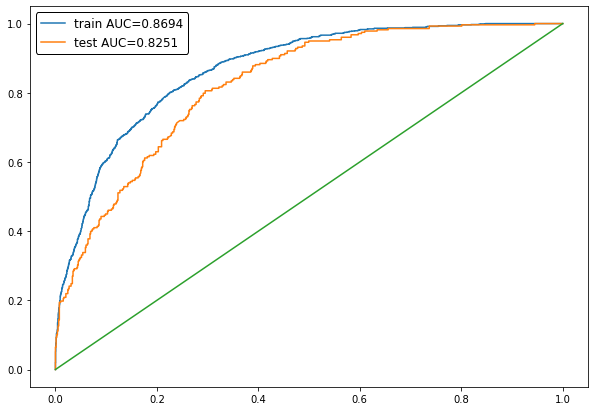

In [75]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [62]:
import xgboost

In [63]:
X_train, X_test, _, _ = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

(5282, 45)

In [64]:
boosting_model = xgboost.XGBClassifier(n_estimators=200)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

/Applications/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


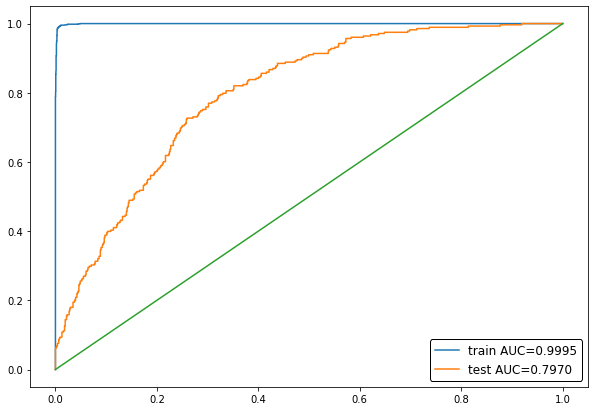

In [65]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [81]:
best_model = boosting_model# какая-то предыдущая модель
best_model.predict_proba(X_test_origin)[:,1].shape

(1057,)

In [93]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.set_index('Id').to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

Скор на кагл 0.85168. Team Name Кирилл_Просвирин